In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time

warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)
sns.set_palette('tab10')

## 1. Load Data

In [170]:
df_train = pd.read_csv(r"E:\DA47\Final Project\adult.csv")

df_train.head()

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [171]:
train_columns = df_train.columns

train_columns

Index(['Age', 'Workclass', 'Final Weight', 'Education', 'EducationNum',
       'Marital Status', 'Occupation', 'Relationship', 'Race', 'Gender',
       'Capital Gain', 'capital loss', 'Hours per Week', 'Native Country',
       'Income'],
      dtype='object')

In [172]:
df_test = pd.read_csv(r"E:\DA47\Final Project\adult.test.csv", header=None)

df_test.columns = train_columns

df_test.head()

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [173]:
df = pd.concat([df_train,df_test])

df

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


Ta sẽ loại bỏ đi các ký tự cách thừa trong các cột dạng object

In [174]:
object_cols = df.select_dtypes(include=['object']).columns.to_list()

object_cols

['Workclass',
 'Education',
 'Marital Status',
 'Occupation',
 'Relationship',
 'Race',
 'Gender',
 'Native Country',
 'Income']

In [175]:
number_cols = df.select_dtypes(exclude=['object']).columns.to_list()

number_cols

['Age',
 'Final Weight',
 'EducationNum',
 'Capital Gain',
 'capital loss',
 'Hours per Week']

In [176]:
# Loại bỏ các dấu cách thưà trong từng cột dạng chữ
for col in object_cols:
    df[col] = df[col].str.strip()

In [177]:
# Thay thế toàn bộ giá trị ? trong bảng thành giá trị trống
df.replace('?', np.nan, inplace=True)

In [178]:
# Kiểm tra xem các cột nào chứa giá trị null
round(df.isnull().sum() / len(df) * 100, 2).sort_values(ascending=False)

Occupation        5.75
Workclass         5.73
Native Country    1.75
Age               0.00
Final Weight      0.00
Education         0.00
EducationNum      0.00
Marital Status    0.00
Relationship      0.00
Race              0.00
Gender            0.00
Capital Gain      0.00
capital loss      0.00
Hours per Week    0.00
Income            0.00
dtype: float64

In [179]:
df.isnull().sum().sort_values(ascending=False)

Occupation        2809
Workclass         2799
Native Country     857
Age                  0
Final Weight         0
Education            0
EducationNum         0
Marital Status       0
Relationship         0
Race                 0
Gender               0
Capital Gain         0
capital loss         0
Hours per Week       0
Income               0
dtype: int64

In [180]:
# Lọc ra các dòng mà không có Occupation nhưng có Workclass => Kết quả trả về ở đây Workclass là Never-worked
df[df['Occupation'].isnull() & ~df['Workclass'].isnull()]

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
5361,18,Never-worked,206359,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,188535,7th-8th,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,237272,10th,6,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,157131,11th,7,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,462294,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,<=50K
32304,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,<=50K
32314,18,Never-worked,153663,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,4,United-States,<=50K
8785,17,Never-worked,131593,11th,7,Never-married,NaN,Own-child,Black,Female,0,0,20,United-States,<=50K.
11607,20,Never-worked,273905,HS-grad,9,Married-spouse-absent,NaN,Other-relative,White,Male,0,0,35,United-States,<=50K.
13898,18,Never-worked,162908,11th,7,Never-married,NaN,Own-child,White,Male,0,0,35,United-States,<=50K.


In [181]:
df[df['Workclass'] == 'Never-worked'] = df[df['Workclass'] == 'Never-worked'].fillna('No-occupation')

In [182]:
# Số lượng dữ liệu null không đáng kể => ta sẽ dropna
round(df.isnull().sum() / len(df) * 100, 2).sort_values(ascending=False)

Workclass         5.73
Occupation        5.73
Native Country    1.75
Age               0.00
Final Weight      0.00
Education         0.00
EducationNum      0.00
Marital Status    0.00
Relationship      0.00
Race              0.00
Gender            0.00
Capital Gain      0.00
capital loss      0.00
Hours per Week    0.00
Income            0.00
dtype: float64

In [183]:
df.dropna(inplace=True)

In [184]:
# Không còn null nữa
round(df.isnull().sum() / len(df) * 100, 2).sort_values(ascending=False)

Age               0.0
Workclass         0.0
Final Weight      0.0
Education         0.0
EducationNum      0.0
Marital Status    0.0
Occupation        0.0
Relationship      0.0
Race              0.0
Gender            0.0
Capital Gain      0.0
capital loss      0.0
Hours per Week    0.0
Native Country    0.0
Income            0.0
dtype: float64

In [185]:
# Đã xử lý hết dữ liệu null
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45232 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             45232 non-null  int64 
 1   Workclass       45232 non-null  object
 2   Final Weight    45232 non-null  int64 
 3   Education       45232 non-null  object
 4   EducationNum    45232 non-null  int64 
 5   Marital Status  45232 non-null  object
 6   Occupation      45232 non-null  object
 7   Relationship    45232 non-null  object
 8   Race            45232 non-null  object
 9   Gender          45232 non-null  object
 10  Capital Gain    45232 non-null  int64 
 11  capital loss    45232 non-null  int64 
 12  Hours per Week  45232 non-null  int64 
 13  Native Country  45232 non-null  object
 14  Income          45232 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [186]:
df.head()

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 2. Các UDF Function sử dụng trong bài

In [187]:
# Hàm đọc dữ liệu từ Google Sheet vào Data Frame (Cần import pandas) + File Google Sheet cần phải share publish
def df_from_GoogleDrive(link):
    import pandas as pd
    
    path = 'https://drive.google.com/uc?export=download&id=' + link.split('/')[-2]
    df = pd.read_csv(path)

    return df

In [188]:
# Dùng để in danh sách các giá trị trong các cột để kiểm tra
def print_info_all_columns(df, lst):
    i = 1

    for obj in lst:
        print(f'{i}/{obj}\t{len(df[obj].unique())}: {df[obj].unique()}')

        i +=1

In [189]:
def print_info_all_columns_numbers(df, lst):
    i = 1

    for obj in lst:
        print(f'{i}/{obj}\t{len(df[obj].unique())}: {df[obj].unique() if len(df[obj].unique()) < 150 else ""}')

        i +=1

In [190]:
def check_dependent_categorical_variable(df, col1, col2, prob = 0.95):
    from scipy.stats import chi2_contingency, chi2
    import numpy as np
    import pandas as pd

    cross_table = pd.crosstab(df[col1], df[col2])

    stat, p, dof, expected = chi2_contingency(cross_table)

    critical = chi2.ppf(prob, dof)

    if abs(stat) >= critical:
        print('Dependent')
    else:
        print('Independent')

In [191]:
def all_infomation_categorical_vs_categorical_variable(df, col1, col2, prob = 0.95):
    from scipy.stats import chi2_contingency, chi2
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    cross_table = pd.crosstab(df[col1], df[col2])

    print(cross_table.to_string())

    print('------------------------------------')
    print('Vẽ biểu đồ Column Chart')
    cross_table.plot.bar(figsize=(16,8))
    
    plt.xticks(rotation=45)
    
    plt.show()

    stat, p, dof, expected = chi2_contingency(cross_table)

    critical = chi2.ppf(prob, dof)
    print('------------------------------------')
    print(f'Kiểm tra mối quan hệ giữa 2 cột {col1} và {col2}')
    if abs(stat) >= critical:
        print(f'Mối quan hệ giữa 2 cột {col1} và {col2} là Dependent')
    else:
        print(f'Mối quan hệ giữa 2 cột {col1} và {col2} là Independent')

In [192]:
def Dependent_Continuous_Categorical(df, model_pattern, prob=0.95):
    import statsmodels.api as sm
    from statsmodels.formula.api import ols

    model = ols(model_pattern, data=df).fit()

    anova_table = sm.stats.anova_lm(model, typ=2)

    alpha = 1 - prob

    if anova_table['PR(>F)'][0] <= alpha:
        print('Dependent')
    else:
        print('Independent')


# model_pattern = 'LotArea ~ C(FullBath)'

# check_dependent_continuous_categorical(df_sub, model_pattern)

In [193]:
def all_infomation_categorical_vs_continuous(df, col_continuous, col_categorical, model_pattern, prob=0.95):
    import statsmodels.api as sm
    from statsmodels.formula.api import ols
    import matplotlib.pyplot as plt
    import warnings
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    import seaborn as sns

    warnings.filterwarnings("ignore", category=FutureWarning)

    df_sub = df[[col_categorical, col_continuous]]

    plt.figure(figsize=(12, 10))

    sns.boxplot(x=col_categorical, y=col_continuous, data=df_sub, palette='Set3')

    plt.show()

    # đổi tên cột (đổi dấu . thành dấu _)
    df_sub = df_sub.rename(columns=lambda x: x.replace('.', '_'))

    col_continuous = col_continuous.replace('.', '_')
    col_categorical = col_categorical.replace('.', '_')
    
    df_sub = df_sub.rename(columns=lambda x: x.replace(' ', '_'))

    col_continuous = col_continuous.replace(' ', '_')
    col_categorical = col_categorical.replace(' ', '_')
    
    print('----------------------------------------')
    print(f'Kiểm tra 2 biến {col_continuous} và {col_categorical} có phụ thuộc không?')

    model = ols(model_pattern, data=df_sub).fit()

    anova_table = sm.stats.anova_lm(model, typ=2)

    alpha = 1 - prob

    if anova_table['PR(>F)'][0] <= alpha:
        print(f'2 cột {col_continuous} và {col_categorical} có phụ thuộc')
    else:
        print(f'2 cột {col_continuous} và {col_categorical} không phụ thuộc')

    print('----------------------------------------')
    print('Sử dụng tukeyhsd')

    m_comp = pairwise_tukeyhsd(endog=df_sub[col_continuous], groups=df_sub[col_categorical], alpha=1-prob)

    print(m_comp)


In [194]:
def Decision_Tree_Max_Depth(X_train, y_train, param_grid = {'max_depth': range(1, 22, 2)}, cv = 5):
    # import thư viện
    from sklearn.model_selection import GridSearchCV
    from sklearn.tree import DecisionTreeClassifier

    # Tạo 1 DecisionTreeClassifier
    tree = DecisionTreeClassifier(random_state=0)

    # Tạo 1 GridSearchCV Object
    grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=cv)

    # Fit dữ liệu vào object GridSearchCV
    grid_search.fit(X_train, y_train)

    # Lấy ra số max_depth tối ưu
    max_depth = grid_search.best_params_['max_depth']

    # In ra các thông số
    return max_depth

In [195]:
# Function để vẽ Decision Tree
def Decision_Tree_Graph(X_train, y_train, class_names):
    from sklearn.tree import DecisionTreeClassifier
    from sklearn import tree
    import graphviz

    # tìm max_depth trước
    max_depth = Decision_Tree_Max_Depth(X_train, y_train)

    # Tạo Model DecisionTreeClassifier và fit bằng dữ liệu train
    model_tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    model_tree.fit(X_train, y_train)

    # Với code trên thì ta sẽ thay đổi class_names thôi còn lại giữ nguyên
    # class name là tên các cột trên label theo thứ tự 0 và 1
    dot_data = tree.export_graphviz(
        model_tree,
        out_file=None,
        feature_names=X_train.columns,
        class_names=class_names,
        filled=True,
        rounded=True,
        special_characters=True
    )

    graph = graphviz.Source(dot_data)

    return graph

In [196]:
# Phần này là của Classifier
# Viết Function để tạo ra model_grid có max_depth và n_estimators tốt nhất
import numpy as np

def Model_Grid_RandomForest(X_train, y_train, 
                            param_grid = {'max_depth': np.arange(3, 22, 2),'n_estimators': range(1, 22, 2),'criterion': ['gini', 'entropy']},
                            scoring='accuracy'):
    # Với scoring thì ta sẽ có nhiều loại
    scoring_lst = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'neg_log_loss', 'neg_mean_squared_error']

    # Import các thư viện
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import RandomForestClassifier
    import numpy as np

    # tạo mô hình ban đầu chưa update tham số
    rf = RandomForestClassifier(random_state=0)

    # Tạo ra đối tượng GridSearchCV object => Sử dụng f1 sẽ có chỉ số recall của 0 là tốt nhất
    rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=scoring)

    # Traing mô hình
    model_grid = rf_grid.fit(X_train, y_train)

    return model_grid

In [197]:
# Vẽ biểu đồ ROC (số này về 1 là tốt nhất)
def ROC_Curve_Graph(model_grid, X_test, y_test):
    from sklearn.metrics import roc_auc_score,roc_curve
    import matplotlib.pyplot as plt

    # Dùng ,1 để lấy ra giá trị thực tế mà ta dự đoán được ở cột số 2
    # predict_proba trả về xác suất dự đoán cho mỗi lớp cho mỗi mẫu
    # còn predict là trả thẳng về kết quả luôn rồi.
    y_probabilities = model_grid.predict_proba(X_test)[:,1]

    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)

    plt.figure(figsize=(6,6))

    plt.title('ROC for GRID RF')

    plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='red')

    # plt.plot([0,1],ls='--',linewidth=5)

    plt.plot([0,0],[1,0],c='0')
    plt.plot([1,1],c='0')
    plt.plot([0,0],c='b')
    plt.plot([1,1],[1,0],c='b')

    plt.text(0.4,0.2,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

In [198]:
def Confusion_Matrix_Graph(y_test, y_pred, labels, figsize = (6, 6)):
    # Tiến hành vẽ ConfusionMatrix
    from sklearn.metrics import ConfusionMatrixDisplay
    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots(figsize = figsize)

    labels = labels

    # Vẽ Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(
        y_true=y_test,
        y_pred=y_pred,
        display_labels=labels,
        xticks_rotation=45,
        ax=ax,
        colorbar=False,
        cmap='Blues_r'
    )

    plt.show()

## 3. EDA dữ liệu

### 3.1. Các cột dữ liệu dạng chữ

In [199]:
print_info_all_columns(df, object_cols)

1/Workclass	8: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
2/Education	16: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 '7th-8th' 'Doctorate' 'Assoc-voc' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th']
3/Marital Status	7: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
4/Occupation	15: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv' 'No-occupation']
5/Relationship	6: ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
6/Race	5: ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
7/Gender	2: ['Male' 'Female']
8/Native Country	41: ['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'Pu

Các cột dạng chữ đều là các cột phân loại. Tuy nhiên giá trị cột Income cần phải sửa lại

In [200]:
df['Income'] = df['Income'].apply(lambda x: x.replace(".", ""))

In [201]:
# Đổi tên cột
df.rename(
    columns={
        'Final Weight': 'Final_Weight',
        'Capital Gain': 'Capital_Gain',
        'capital loss': 'Capital_Loss',
        'Hours per Week': 'Hours_Per_Week'
    },
    inplace=True
)

#### 3.1.1 Phân tích dữ liệu theo cột Workclass (Tình trạng việc làm và loại hình công việc)

In [202]:
Workclass_Count = df.groupby('Workclass').agg(
    total_count = ('Occupation', 'count')
).sort_values(by='total_count', ascending=False).reset_index()

Workclass_Count

,Workclass,total_count
0,Private,33307
1,Self-emp-not-inc,3796
2,Local-gov,3100
3,State-gov,1946
4,Self-emp-inc,1646
5,Federal-gov,1406
6,Without-pay,21
7,Never-worked,10


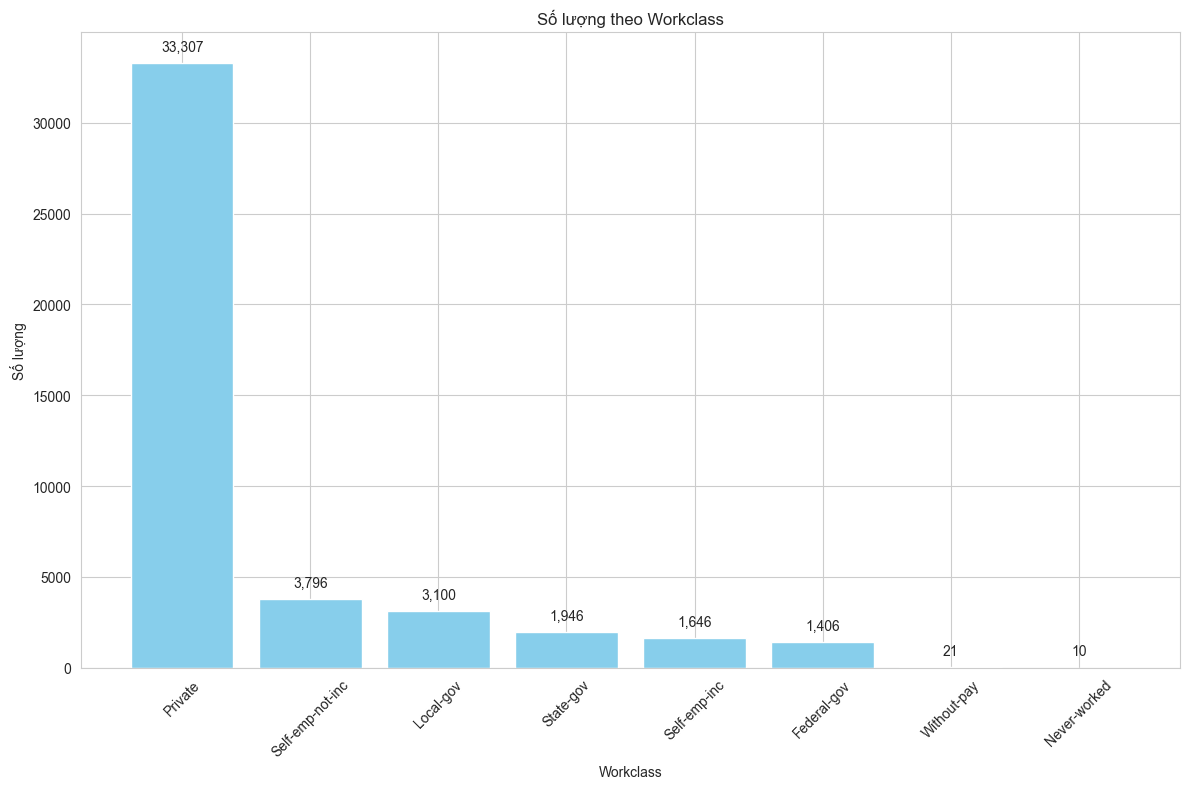

In [203]:
plt.figure(figsize=(12, 8))
plt.bar(Workclass_Count['Workclass'], Workclass_Count['total_count'], color='skyblue')

# Thêm nhãn dữ liệu vào từng cột
for i, value in enumerate(Workclass_Count['total_count']):
    plt.text(i, value + 500, f'{value:,.0f}', ha='center', va='bottom')

# Đặt tiêu đề và nhãn trục
plt.title('Số lượng theo Workclass')
plt.xlabel('Workclass')
plt.ylabel('Số lượng')

# Hiển thị biểu đồ
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc hơn
plt.tight_layout()  # Đảm bảo không bị cắt nhãn
plt.show()

- State-gov: Loại hình này cho biết cá nhân được tuyển dụng bởi cơ quan hoặc tổ chức chính phủ cấp bang.
Ví dụ bao gồm các sở ban ngành cấp bang, trường đại học, trường công lập và các tổ chức do bang tài trợ khác.
- Self-emp-not-inc: Loại hình này đề cập đến những cá nhân tự làm chủ nhưng không có doanh nghiệp đã đăng ký.
Họ thường là nhà thầu độc lập, người làm việc tự do hoặc chủ sở hữu duy nhất làm việc cho chính mình.
- Private: Loại hình này cho biết cá nhân được tuyển dụng bởi một công ty hoặc tổ chức tư nhân.
Nó bao gồm nhiều loại hình doanh nghiệp, từ các công ty khởi nghiệp nhỏ đến các tập đoàn đa quốc gia lớn.
- Federal-gov: Loại hình này đề cập đến những cá nhân làm việc cho chính phủ liên bang Hoa Kỳ.
Ví dụ bao gồm nhân viên của các cơ quan, bộ và lực lượng vũ trang liên bang.
- Local-gov: Loại hình này cho biết cá nhân được tuyển dụng bởi một thực thể chính quyền địa phương, chẳng hạn như thành phố, quận hoặc đô thị.
Các công việc của chính quyền địa phương bao gồm giáo viên, cảnh sát, lính cứu hỏa và nhân viên thị chính.
- Self-emp-inc: Loại hình này đề cập đến những cá nhân tự làm chủ và có doanh nghiệp đã đăng ký.
Họ về cơ bản là chủ doanh nghiệp điều hành công ty riêng của mình và nhận thu nhập từ những doanh nghiệp đó.
- Without-pay: Loại hình này cho biết cá nhân hiện đang thất nghiệp nhưng không nhận bất kỳ khoản trợ cấp thất nghiệp nào.
Họ có thể đang tích cực tìm kiếm việc làm hoặc nghỉ ngơi sau thời gian làm việc.
- Never-worked: Loại hình này đề cập đến những cá nhân chưa bao giờ có công việc được trả lương hoặc chưa làm việc trong nền kinh tế chính thức.
Nó có thể bao gồm những người trẻ tuổi vẫn đang đi học, cha mẹ ở nhà hoặc những người khuyết tật.

In [204]:
Workclass_Count['% Count'] = round(Workclass_Count['total_count'] / len(df) * 100, 2)

Workclass_Count

,Workclass,total_count,% Count
0,Private,33307,73.64
1,Self-emp-not-inc,3796,8.39
2,Local-gov,3100,6.85
3,State-gov,1946,4.30
4,Self-emp-inc,1646,3.64
5,Federal-gov,1406,3.11
6,Without-pay,21,0.05
7,Never-worked,10,0.02


Nhìn vào biểu đồ trên ta thấy đa phần các lao động làm việc trong các công ty tư nhân (Chiếm 73.64% tổng số lượng lao động)

Các nhóm lao động khác như chủ doanh nghiệp (self-emp-inc), những cá nhân làm việc cho bang (state-gov), người làm việc tự do (Self-emp-not-inc), người làm việc cho liên bang (Federal-gov), người làm việc cho chính quyền địa phương (Local-gov) và cuối cùng là nhóm đang thất nghiệp (Without-pay) và chưa từng làm việc (Never-worked).

2 nhóm thất nghiệp và chưa từng làm việc chiếm số lượng không nhiều (0.07%)

In [205]:
workclass_pivot = pd.pivot_table(df, index='Workclass', columns='Income', values='Occupation', aggfunc='count')

workclass_pivot = workclass_pivot.sort_values(by='>50K', ascending=False)

workclass_pivot

Income,<=50K,>50K
Workclass,,
Private,26056.0,7251.0
Self-emp-not-inc,2737.0,1059.0
Local-gov,2185.0,915.0
Self-emp-inc,734.0,912.0
Federal-gov,857.0,549.0
State-gov,1426.0,520.0
Without-pay,19.0,2.0
Never-worked,10.0,NaN


In [206]:
workclass_pivot['% >50K'] = round(workclass_pivot['>50K'] / (workclass_pivot['>50K'] + workclass_pivot['<=50K']) * 100, 2)

workclass_pivot = workclass_pivot.sort_values(by='% >50K', ascending=False)

workclass_pivot

Income,<=50K,>50K,% >50K
Workclass,,,
Self-emp-inc,734.0,912.0,55.41
Federal-gov,857.0,549.0,39.05
Local-gov,2185.0,915.0,29.52
Self-emp-not-inc,2737.0,1059.0,27.90
State-gov,1426.0,520.0,26.72
Private,26056.0,7251.0,21.77
Without-pay,19.0,2.0,9.52
Never-worked,10.0,NaN,NaN


Nhìn vào bảng trên ta có thể thấy được nhóm các cá nhân đang bắt đầu công việc kinh doanh của bản thân mình sẽ có nhiều người có thu nhập đạt trên 50K

Ngoài ra nhóm Private tuy số lượng đông đảo nhưng lượng người có mức lương trên 50K là không quá nhiều.

In [207]:
check_dependent_categorical_variable(df, 'Workclass', 'Income')

Dependent


Income            <=50K  >50K
Workclass                    
Federal-gov         857   549
Local-gov          2185   915
Never-worked         10     0
Private           26056  7251
Self-emp-inc        734   912
Self-emp-not-inc   2737  1059
State-gov          1426   520
Without-pay          19     2
------------------------------------
Vẽ biểu đồ Column Chart


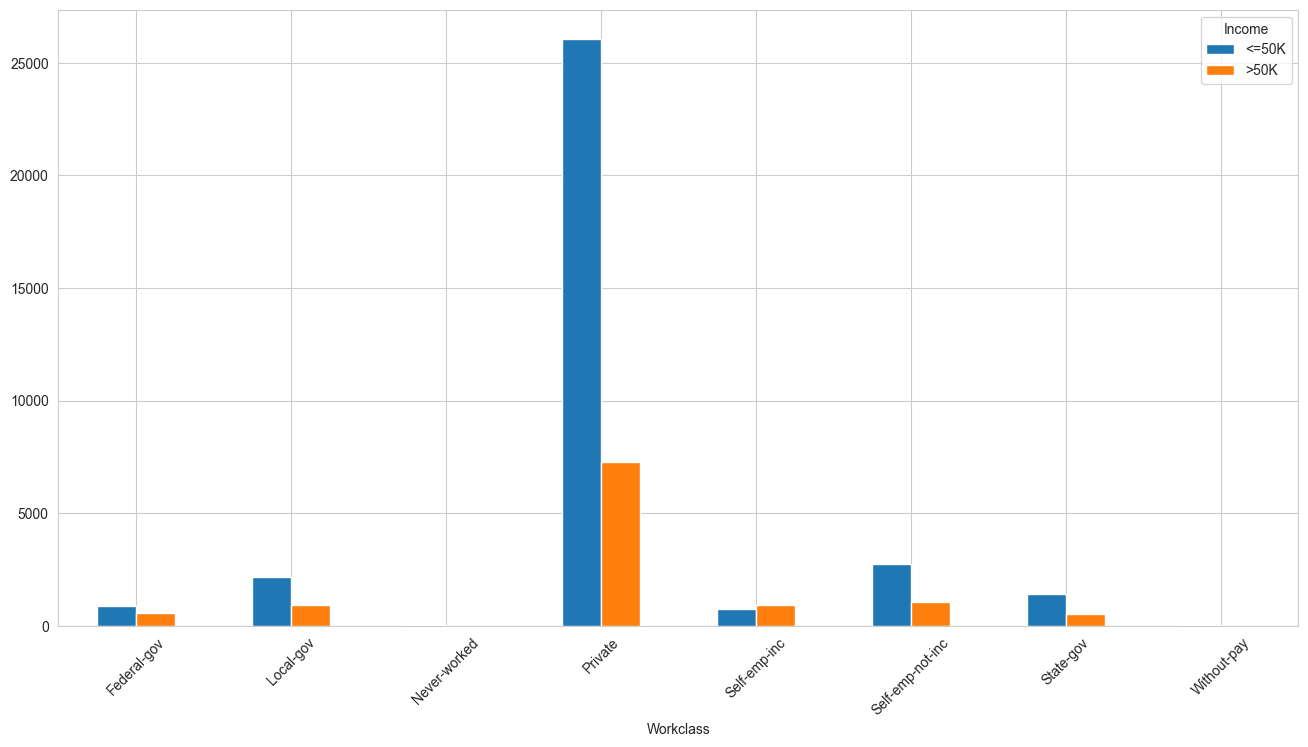

------------------------------------
Kiểm tra mối quan hệ giữa 2 cột Workclass và Income
Mối quan hệ giữa 2 cột Workclass và Income là Dependent


In [208]:
all_infomation_categorical_vs_categorical_variable(df, 'Workclass', 'Income')

In [209]:
Workclass_GroupBy = df.groupby('Workclass').agg(
    total_count = ('Occupation', 'count')
).sort_values(by='total_count', ascending=False)

Workclass_GroupBy['% Count'] = round(Workclass_GroupBy['total_count'] / sum(Workclass_GroupBy['total_count']) * 100, 2)

Workclass_GroupBy

,total_count,% Count
Workclass,,
Private,33307,73.64
Self-emp-not-inc,3796,8.39
Local-gov,3100,6.85
State-gov,1946,4.30
Self-emp-inc,1646,3.64
Federal-gov,1406,3.11
Without-pay,21,0.05
Never-worked,10,0.02


2 cột Workclass và Income có mối quan hệ phụ thuộc

In [210]:
Workclass_Pivot = pd.pivot_table(df, index='Workclass', columns='Income', values='Occupation', aggfunc='count')

Workclass_Pivot['% > 50K'] = round(Workclass_Pivot['>50K'] / (Workclass_Pivot['>50K'] + Workclass_Pivot['<=50K']) * 100, 2)

Workclass_Pivot = Workclass_Pivot.sort_values(by='% > 50K', ascending=False)

Workclass_Pivot = Workclass_Pivot.reset_index()

Workclass_Pivot

Income,Workclass,<=50K,>50K,% > 50K
0,Self-emp-inc,734.0,912.0,55.41
1,Federal-gov,857.0,549.0,39.05
2,Local-gov,2185.0,915.0,29.52
3,Self-emp-not-inc,2737.0,1059.0,27.90
4,State-gov,1426.0,520.0,26.72
5,Private,26056.0,7251.0,21.77
6,Without-pay,19.0,2.0,9.52
7,Never-worked,10.0,NaN,NaN


<Figure size 1800x1200 with 0 Axes>

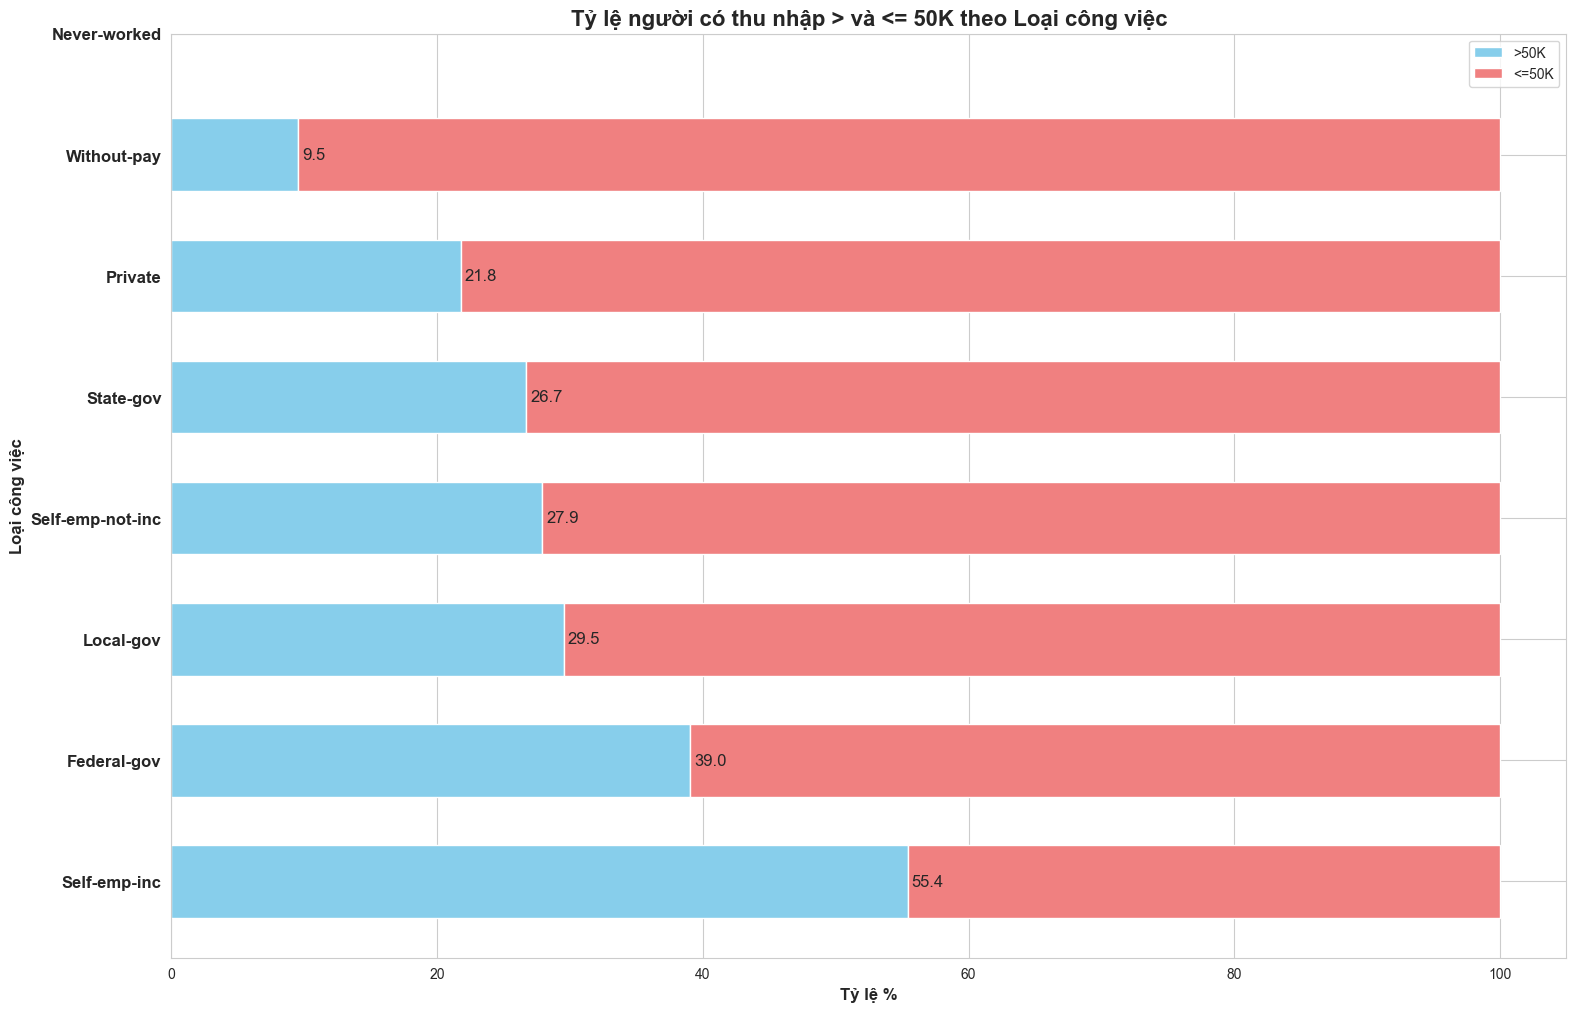

In [211]:
plt.figure(figsize=(18, 12))  # Thay đổi kích thước của biểu đồ

# Dữ liệu đã được sắp xếp
labels = Workclass_Pivot['Workclass']
percentages_over_50k = Workclass_Pivot['% > 50K']
percentages_under_50k = 100 - Workclass_Pivot['% > 50K']  # Tính tỷ lệ phần trăm dưới 50K
total_counts_over_50k = Workclass_Pivot['>50K']
total_counts_under_50k = Workclass_Pivot['<=50K']

# Định cấu hình vị trí cột
y = np.arange(len(labels))
height = 0.6  # Tăng khoảng cách giữa các cột

# Tạo figure và axis objects với kích thước tăng lên
fig, ax = plt.subplots(figsize=(18, 12))  # Thay đổi kích thước của biểu đồ

# Vẽ các cột cho thu nhập trên 50K
rects1 = ax.barh(y, percentages_over_50k, height, label='>50K', color='skyblue')

# Thêm nhãn cho các cột có giá trị > 0
for rect in rects1:
    width = rect.get_width()
    if width > 0:
        ax.annotate('{:.1f}'.format(width),  # Chỉ hiển thị một số thập phân sau dấu phẩy
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(3, 0),  # 3 points horizontal offset
                    textcoords="offset points",
                    ha='left', va='center',
                    fontsize=12)  # Tùy chỉnh font size và font weight

# Vẽ các cột cho thu nhập dưới hoặc bằng 50K, bắt đầu từ tỷ lệ trên 50K
rects2 = ax.barh(y, percentages_under_50k, height, left=percentages_over_50k, label='<=50K', color='lightcoral')

# Thêm tiêu đề và chú thích
ax.set_ylabel('Loại công việc', fontsize=12, fontweight='bold')
ax.set_xlabel('Tỷ lệ %', fontsize=12, fontweight='bold')
ax.set_title('Tỷ lệ người có thu nhập > và <= 50K theo Loại công việc', fontsize=16, fontweight='bold')
ax.set_yticks(y)
ax.set_yticklabels(labels, fontsize=12, fontweight='bold')
ax.legend()

plt.show()

#### 3.1.2. Phân tích dữ liệu theo cột Education và EducationNum (Tình trạng học vấn)

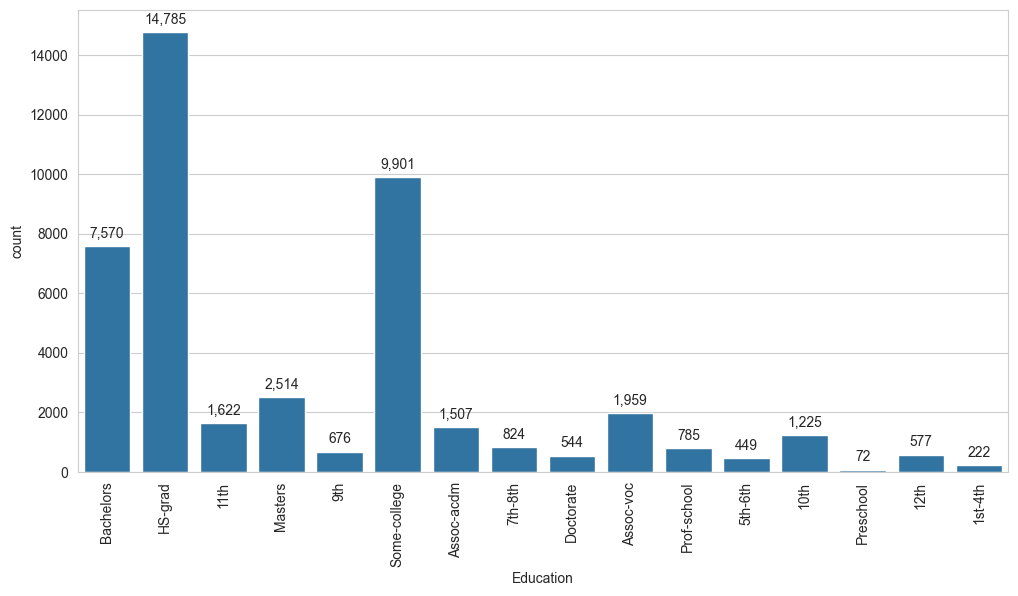

In [212]:
plt.figure(figsize=(12, 6))

ax = sns.countplot(x='Education', data=df)

# Thêm nhãn dữ liệu vào từng cột
for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.xticks(rotation=90)

plt.show()

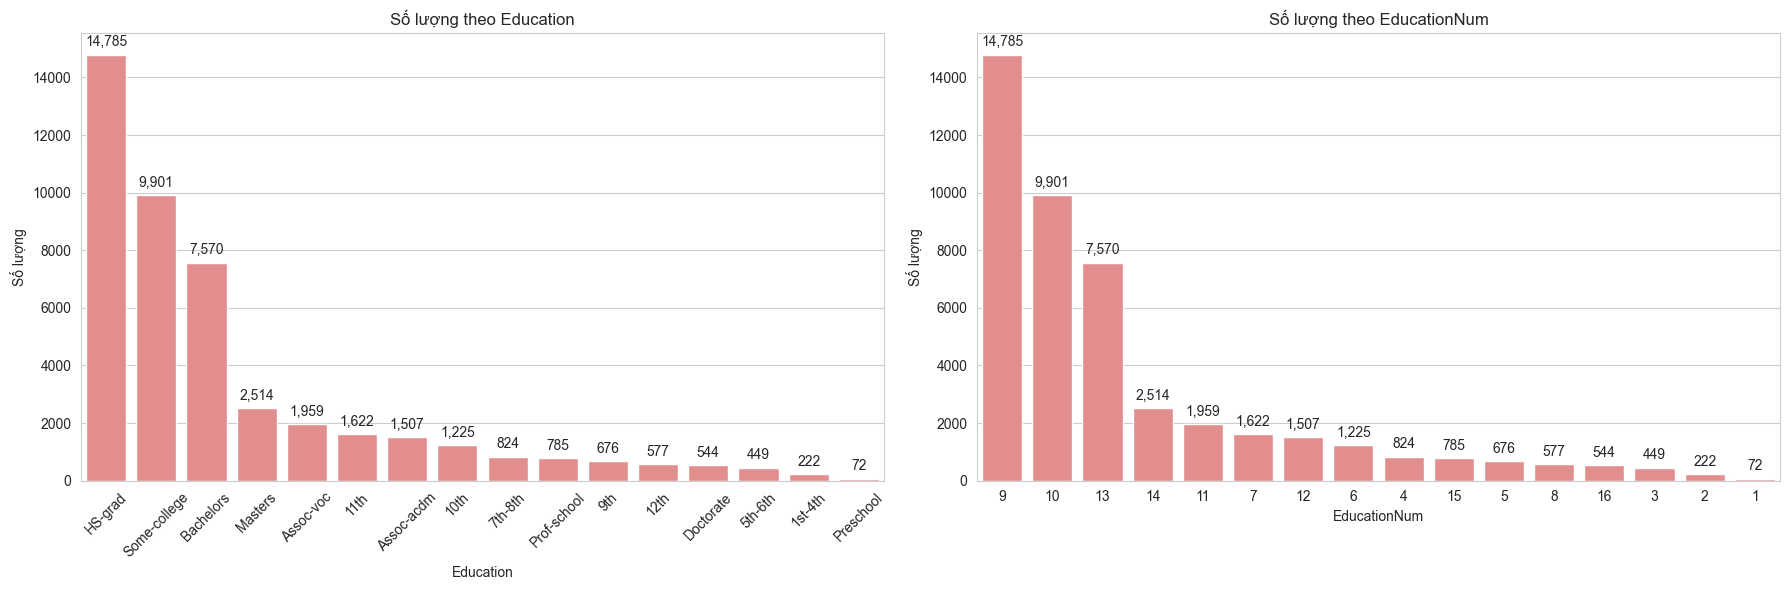

In [213]:
# Tạo figure và axes cho 2 biểu đồ
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

Education_Counts = df.groupby('Education').agg(total_counts = ('Occupation', 'count')).sort_values(by='total_counts', ascending=False).reset_index()
Education_Num_Counts = df.groupby('EducationNum').agg(total_counts = ('Occupation', 'count')).sort_values(by='total_counts', ascending=False).reset_index()

Education_Num_Counts['EducationNum'] = Education_Num_Counts['EducationNum'].astype('str')

# Biểu đồ cho cột "Education"
sns.barplot(x='Education', data=Education_Counts, y='total_counts', ax=axes[0], color='lightcoral')

# Thêm nhãn dữ liệu vào từng cột
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), ',.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points')

# Xoay nhãn trục x để dễ đọc hơn
axes[0].tick_params(axis='x', rotation=90)

# Đặt tiêu đề và nhãn trục cho biểu đồ "Education"
axes[0].set_title('Số lượng theo Education')
axes[0].set_xlabel('Education')
axes[0].set_ylabel('Số lượng')
axes[0].tick_params(axis='x', rotation=45)

# Biểu đồ cho cột "EducationNum"
sns.barplot(x='EducationNum', data=Education_Num_Counts, y='total_counts', ax=axes[1], color='lightcoral')

# Thêm nhãn dữ liệu vào từng cột
for p in axes[1].patches:
    axes[1].annotate(format(p.get_height(), ',.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points')

# Đặt tiêu đề và nhãn trục cho biểu đồ "EducationNum"
axes[1].set_title('Số lượng theo EducationNum')
axes[1].set_xlabel('EducationNum')
axes[1].set_ylabel('Số lượng')
axes[1].tick_params(axis='x')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

Nhìn vào đây bạn có thể thấy cột EducationNum đã sắp xếp luôn giá trị cho ct Education rồi => Nên khi xây dựng model ta sẽ chỉ cần drop đi cột Education mà không phải tiến hành Encode nữa

In [214]:
df['Education'].unique().tolist()

['Bachelors',
 'HS-grad',
 '11th',
 'Masters',
 '9th',
 'Some-college',
 'Assoc-acdm',
 '7th-8th',
 'Doctorate',
 'Assoc-voc',
 'Prof-school',
 '5th-6th',
 '10th',
 'Preschool',
 '12th',
 '1st-4th']

In [215]:
df[['Education', 'EducationNum']].drop_duplicates().sort_values(by='EducationNum')['Education'].tolist()

['Preschool',
 '1st-4th',
 '5th-6th',
 '7th-8th',
 '9th',
 '10th',
 '11th',
 '12th',
 'HS-grad',
 'Some-college',
 'Assoc-voc',
 'Assoc-acdm',
 'Bachelors',
 'Masters',
 'Prof-school',
 'Doctorate']

In [216]:
df[['Education', 'EducationNum']].drop_duplicates().sort_values(by='EducationNum')

,Education,EducationNum
224,Preschool,1
416,1st-4th,2
56,5th-6th,3
15,7th-8th,4
6,9th,5
219,10th,6
3,11th,7
415,12th,8
2,HS-grad,9
10,Some-college,10


- Preschool: Học mầm non
- 1st-4th đến 12th: Đang học từ lớp 1 đến lớp 12
- HS-grad: (High school Graduate) => đã tốt nghiệp trung học phổ thông
- Some-college: Đã học đại học nhưng chưa tốt nghiệp
- Assoc-voc: (Associate's Degree Vocational) => trường cao đẳng nghề
- Assoc-acdm: (Associate's degree Academic) => Đây là một bằng cấp đại học hai năm được trao cho sinh viên hoàn thành chương trình học tập trung vào các môn học học thuật và nghiên cứu. Bằng cấp này thường được coi là bước đệm cho việc học lên cao hơn, chẳng hạn như bằng Cử nhân hoặc Thạc sĩ.
- Bachelors: Đã có bằng cử nhân trình độ đại học
- Masters: Đã có bằng thạc sĩ
- Prof-school: Đề cập đến các bằng cấp chuyên môn như Luật (JD), Y khoa (MD) hoặc Kinh doanh (MBA). Những bằng cấp này thường đòi hỏi đào tạo và cấp phép bổ sung sau khi lấy bằng Cử nhân.
- Doctorate': Đại diện cho bằng Tiến sĩ, trình độ học vấn cao nhất, thường liên quan đến nghiên cứu sâu rộng và công việc luận án.

Ta có tể thấy thứ tự sắp xếp của EducationNum đã phù hợp với các bằng hay trình độ học thuật trong thực tế => giữ nguyên và không cần encode lại

Income        <=50K  >50K
Education                
10th           1143    82
11th           1533    89
12th            534    43
1st-4th         214     8
5th-6th         427    22
7th-8th         769    55
9th             638    38
Assoc-acdm     1109   398
Assoc-voc      1455   504
Bachelors      4392  3178
Doctorate       145   399
HS-grad       12369  2416
Masters        1121  1393
Preschool        71     1
Prof-school     193   592
Some-college   7911  1990
------------------------------------
Vẽ biểu đồ Column Chart


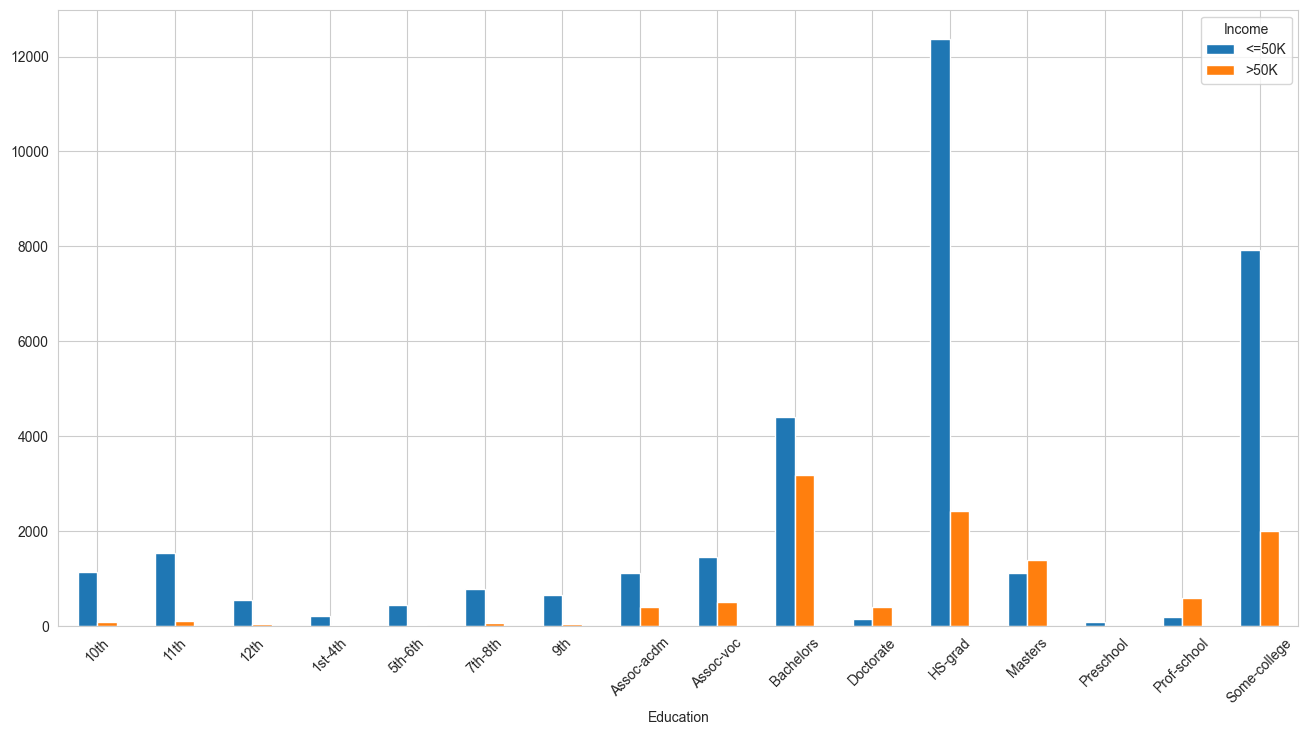

------------------------------------
Kiểm tra mối quan hệ giữa 2 cột Education và Income
Mối quan hệ giữa 2 cột Education và Income là Dependent


In [217]:
all_infomation_categorical_vs_categorical_variable(df, 'Education', 'Income')

Ta có thể dễ dang thầy là 2 cột Education và Income là phụ thuộc vào nhau (Bạn học càng cao thì cơ hội có được thu nhập lớn càng cao)

Income        <=50K  >50K
EducationNum             
1                71     1
2               214     8
3               427    22
4               769    55
5               638    38
6              1143    82
7              1533    89
8               534    43
9             12369  2416
10             7911  1990
11             1455   504
12             1109   398
13             4392  3178
14             1121  1393
15              193   592
16              145   399
------------------------------------
Vẽ biểu đồ Column Chart


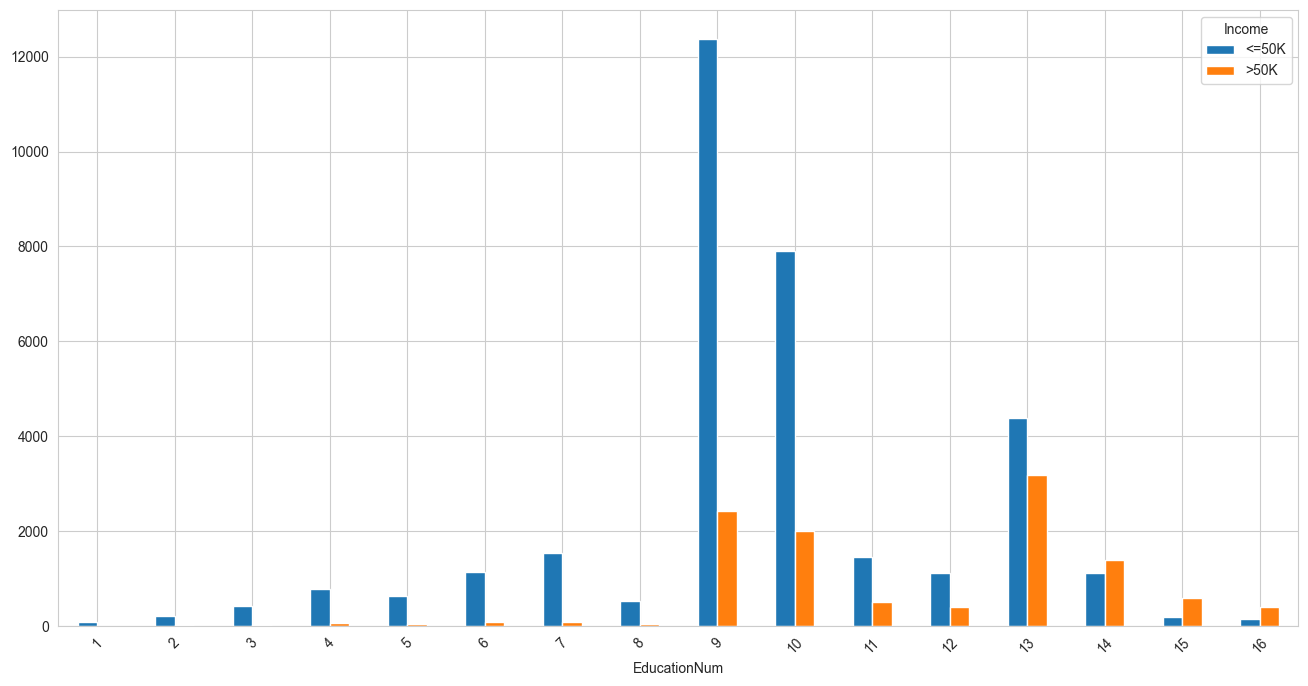

------------------------------------
Kiểm tra mối quan hệ giữa 2 cột EducationNum và Income
Mối quan hệ giữa 2 cột EducationNum và Income là Dependent


In [218]:
all_infomation_categorical_vs_categorical_variable(df, 'EducationNum', 'Income')

Bạn có thể thấy là đa phần các bạn có thu nhập > 50k thì thường ít nhất phải là đã tốt nghiệp trung học phổ thông. Các bạn chưa tốt nghiệp trung học phổ thông tuy cũng có các bạn có mức lương > 50K. Tuy nhiên số lượng này không nhiều

In [219]:
Education_GroupBy = df.groupby('Education').agg(
    total_count = ('Occupation', 'count')
).sort_values(by='total_count', ascending=False)

Education_GroupBy['% Count'] = round(Education_GroupBy['total_count'] / sum(Education_GroupBy['total_count']) * 100, 2)

Education_GroupBy

,total_count,% Count
Education,,
HS-grad,14785,32.69
Some-college,9901,21.89
Bachelors,7570,16.74
Masters,2514,5.56
Assoc-voc,1959,4.33
11th,1622,3.59
Assoc-acdm,1507,3.33
10th,1225,2.71
7th-8th,824,1.82


In [220]:
Education_Pivot = pd.pivot_table(df, index='Education', columns='Income', values='Occupation', aggfunc='count')

Education_Pivot['% > 50K'] = round(Education_Pivot['>50K'] / (Education_Pivot['>50K'] + Education_Pivot['<=50K']) * 100, 2)

Education_Pivot = Education_Pivot.sort_values(by='% > 50K', ascending=False)

Education_Pivot = Education_Pivot.reset_index()

Education_Pivot

Income,Education,<=50K,>50K,% > 50K
0,Prof-school,193,592,75.41
1,Doctorate,145,399,73.35
2,Masters,1121,1393,55.41
3,Bachelors,4392,3178,41.98
4,Assoc-acdm,1109,398,26.41
5,Assoc-voc,1455,504,25.73
6,Some-college,7911,1990,20.10
7,HS-grad,12369,2416,16.34
8,12th,534,43,7.45
9,10th,1143,82,6.69


<Figure size 1800x1200 with 0 Axes>

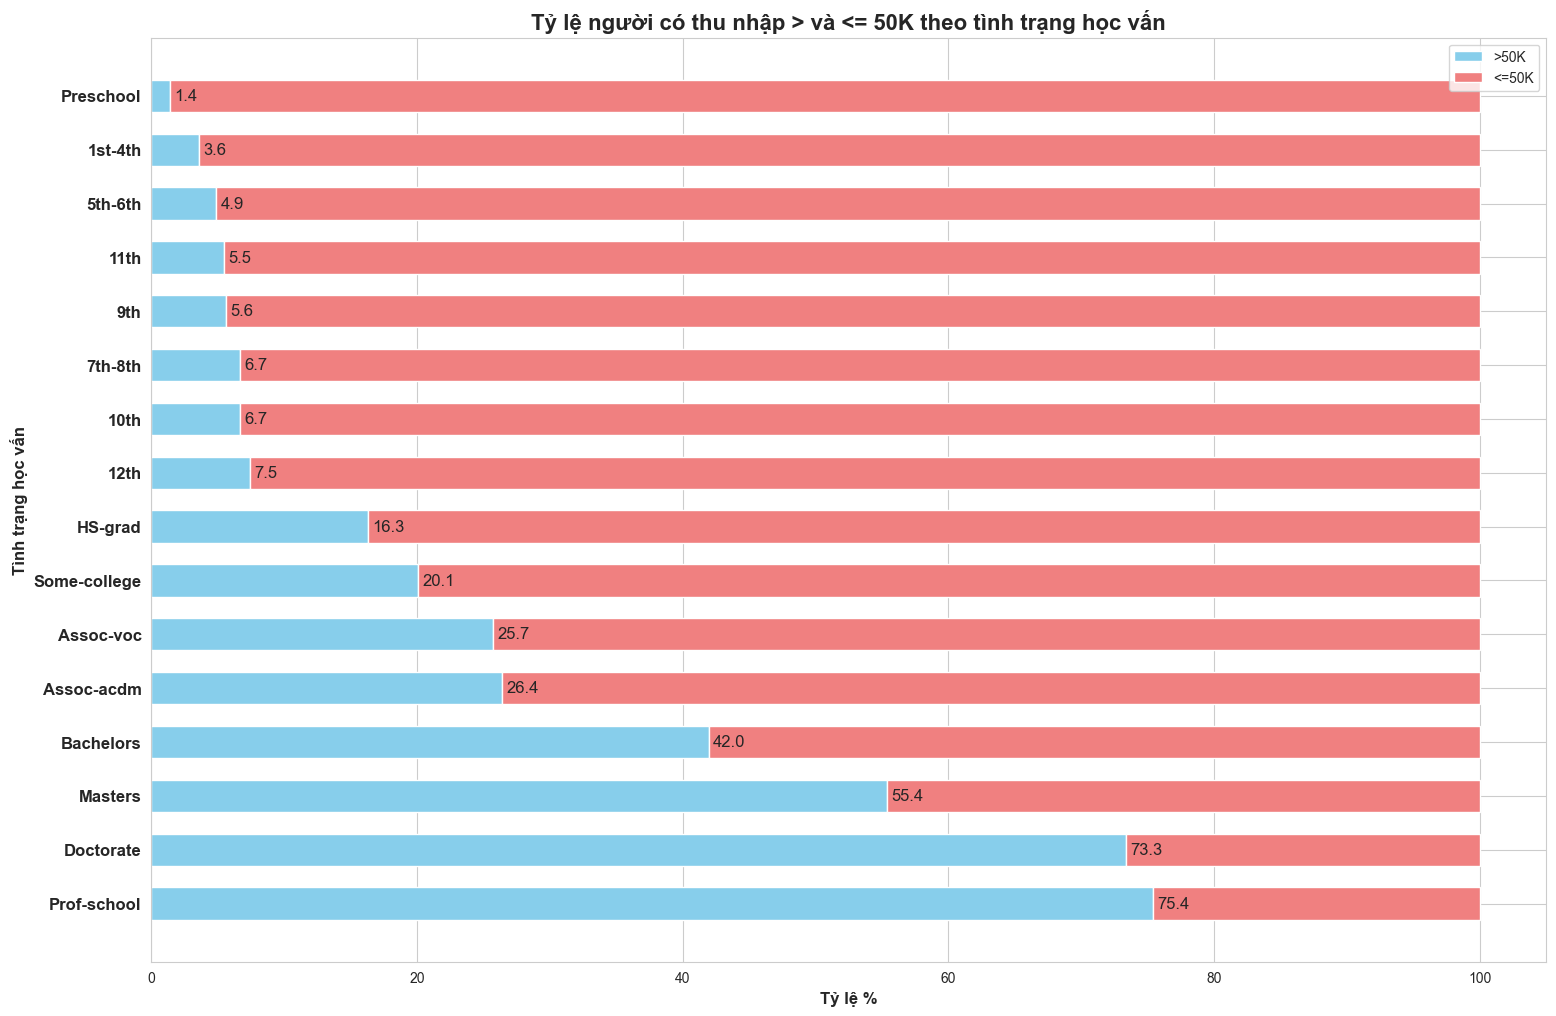

In [221]:
plt.figure(figsize=(18, 12))  # Thay đổi kích thước của biểu đồ

# Dữ liệu đã được sắp xếp
labels = Education_Pivot['Education']
percentages_over_50k = Education_Pivot['% > 50K']
percentages_under_50k = 100 - Education_Pivot['% > 50K']  # Tính tỷ lệ phần trăm dưới 50K
total_counts_over_50k = Education_Pivot['>50K']
total_counts_under_50k = Education_Pivot['<=50K']

# Định cấu hình vị trí cột
y = np.arange(len(labels))
height = 0.6  # Tăng khoảng cách giữa các cột

# Tạo figure và axis objects với kích thước tăng lên
fig, ax = plt.subplots(figsize=(18, 12))  # Thay đổi kích thước của biểu đồ

# Vẽ các cột cho thu nhập trên 50K
rects1 = ax.barh(y, percentages_over_50k, height, label='>50K', color='skyblue')

# Thêm nhãn cho các cột có giá trị > 0
for rect in rects1:
    width = rect.get_width()
    if width > 0:
        ax.annotate('{:.1f}'.format(width),  # Chỉ hiển thị một số thập phân sau dấu phẩy
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(3, 0),  # 3 points horizontal offset
                    textcoords="offset points",
                    ha='left', va='center',
                    fontsize=12)  # Tùy chỉnh font size và font weight

# Vẽ các cột cho thu nhập dưới hoặc bằng 50K, bắt đầu từ tỷ lệ trên 50K
rects2 = ax.barh(y, percentages_under_50k, height, left=percentages_over_50k, label='<=50K', color='lightcoral')

# Thêm tiêu đề và chú thích
ax.set_ylabel('Tình trạng học vấn', fontsize=12, fontweight='bold')
ax.set_xlabel('Tỷ lệ %', fontsize=12, fontweight='bold')
ax.set_title('Tỷ lệ người có thu nhập > và <= 50K theo tình trạng học vấn', fontsize=16, fontweight='bold')
ax.set_yticks(y)
ax.set_yticklabels(labels, fontsize=12, fontweight='bold')
ax.legend()

plt.show()

#### 3.1.3. Phân tích dữ liệu Marital Status (Tình trạng hôn nhân)

Income                 <=50K  >50K
Marital Status                    
Divorced                5643   655
Married-AF-spouse         18    14
Married-civ-spouse     11492  9564
Married-spouse-absent    499    54
Never-married          13904   701
Separated               1312    99
Widowed                 1156   121
------------------------------------
Vẽ biểu đồ Column Chart


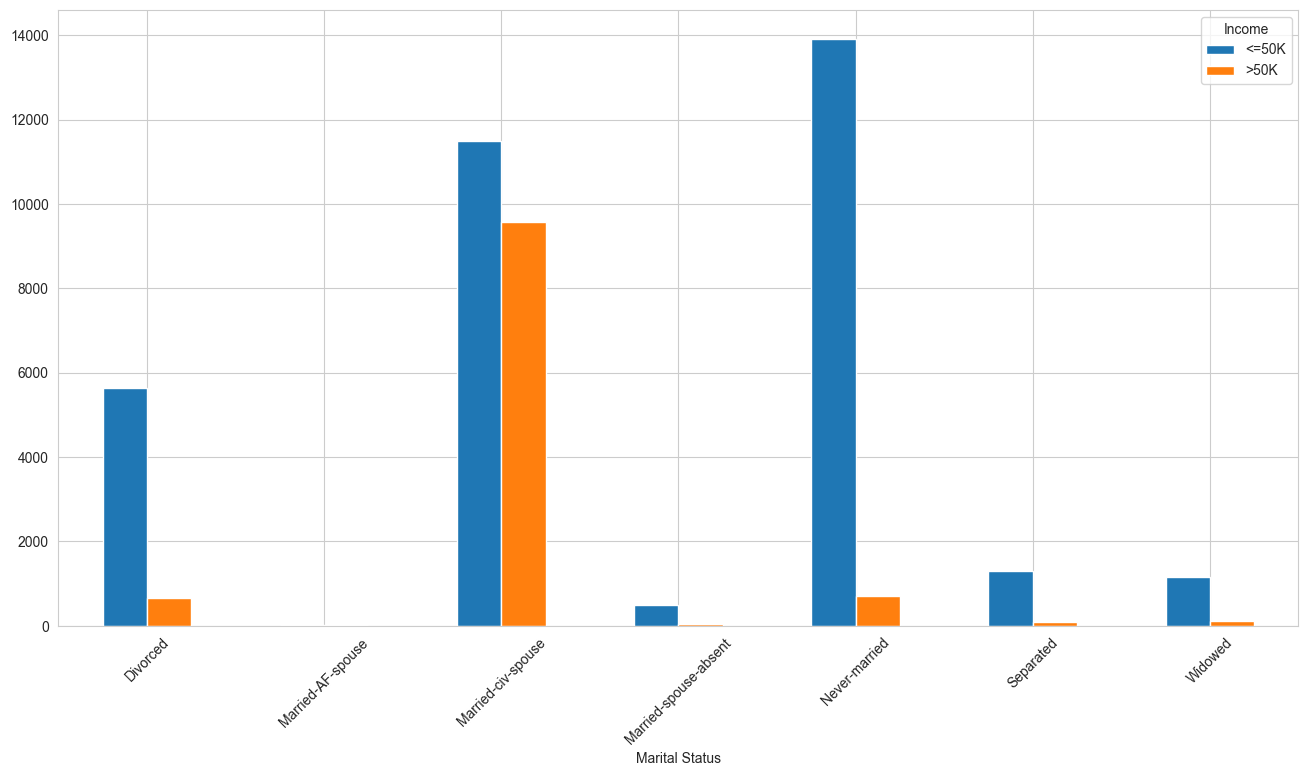

------------------------------------
Kiểm tra mối quan hệ giữa 2 cột Marital Status và Income
Mối quan hệ giữa 2 cột Marital Status và Income là Dependent


In [222]:
all_infomation_categorical_vs_categorical_variable(df, 'Marital Status', 'Income')

In [223]:
df['Marital Status'].unique().tolist()

['Never-married',
 'Married-civ-spouse',
 'Divorced',
 'Married-spouse-absent',
 'Separated',
 'Married-AF-spouse',
 'Widowed']

- Never-married (Chưa từng kết hôn): Cá nhân chưa từng kết hôn hợp pháp.
- Married-civ-spouse (Kết hôn với vợ/chồng dân sự): Cá nhân đã kết hôn hợp pháp với vợ/chồng không phải quân nhân.
- Divorced (Ly hôn): Cá nhân đã kết hôn hợp pháp nhưng cuộc hôn nhân đã được tòa án giải quyết.
- Married-spouse-absent (Kết hôn nhưng vợ/chồng vắng mặt): Cá nhân đã kết hôn hợp pháp nhưng hiện tại vợ/chồng đang vắng mặt (có thể do công việc, học tập ở xa,...).
- Separated (Ly thân): Cá nhân đã kết hôn hợp pháp nhưng đang sống ly thân với vợ/chồng (vẫn là vợ chồng hợp pháp nhưng không chung sống).
- Married-AF-spouse (Kết hôn với vợ/chồng quân nhân): Cá nhân đã kết hôn hợp pháp với vợ/chồng là quân nhân.
- Widowed (Góa vợ/chồng): Cá nhân đã từng kết hôn hợp pháp nhưng vợ/chồng đã qua đời và chưa tái hôn.

Trong 7 nhóm trên thì nhóm đã kết hôn hợp pháp sẽ có thu nhập tốt hơn (Số lượng người có thu nhập trên 50K chiếm tỷ trọng lớn nhất trong 7 nhóm) đạt tỷ lệ tới 45.28%.

Ngoài ra có thể thấy đa phần các nhóm đã kết hơn sẽ thường có thu nhập >50K. Còn các nhóm khác thì tỷ lệ này có xu hướng thấp hơn nhiều

In [224]:
Marial_Status_Pivot = pd.pivot_table(df, index='Marital Status', columns='Income', values='Occupation', aggfunc='count')

Marial_Status_Pivot['% > 50K'] = round(Marial_Status_Pivot['>50K'] / (Marial_Status_Pivot['>50K'] + Marial_Status_Pivot['<=50K']) * 100, 2)

Marial_Status_Pivot = Marial_Status_Pivot.sort_values(by='% > 50K', ascending=False)

Marial_Status_Pivot = Marial_Status_Pivot.reset_index()

Marial_Status_Pivot

Income,Marital Status,<=50K,>50K,% > 50K
0,Married-civ-spouse,11492,9564,45.42
1,Married-AF-spouse,18,14,43.75
2,Divorced,5643,655,10.40
3,Married-spouse-absent,499,54,9.76
4,Widowed,1156,121,9.48
5,Separated,1312,99,7.02
6,Never-married,13904,701,4.80


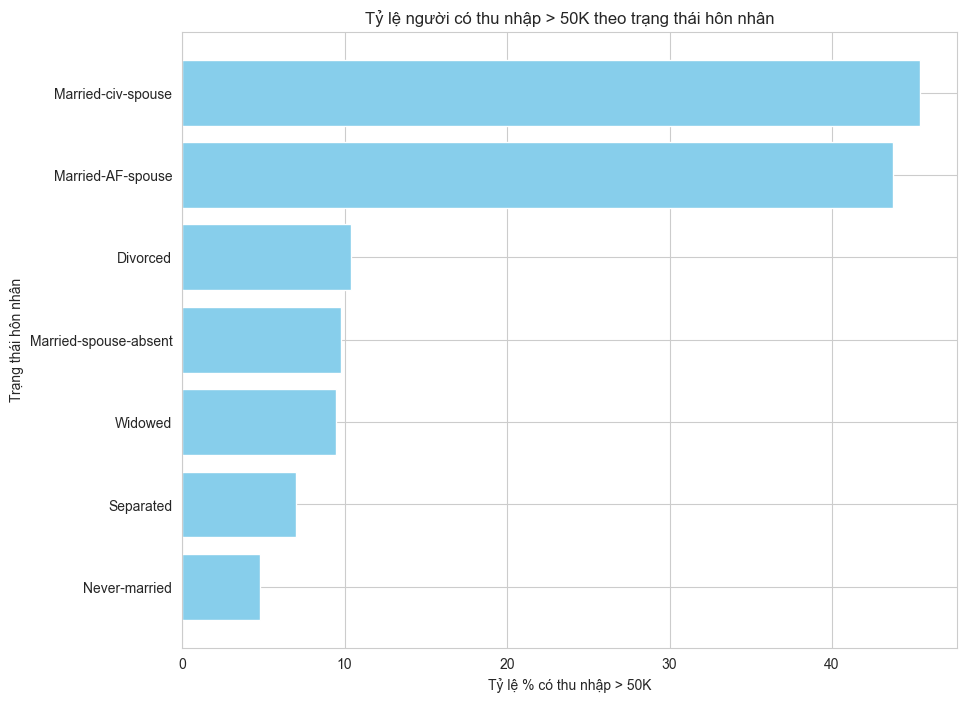

In [225]:
# Dữ liệu đã được sắp xếp
labels = Marial_Status_Pivot['Marital Status']
percentages = Marial_Status_Pivot['% > 50K']

# Tạo biểu đồ cột ngang
plt.figure(figsize=(10, 8))
plt.barh(labels, percentages, color='skyblue')
plt.xlabel('Tỷ lệ % có thu nhập > 50K')
plt.ylabel('Trạng thái hôn nhân')
plt.title('Tỷ lệ người có thu nhập > 50K theo trạng thái hôn nhân')
plt.gca().invert_yaxis()  # Đảo ngược trục y để trạng thái hôn nhân cao nhất ở trên cùng
plt.show()

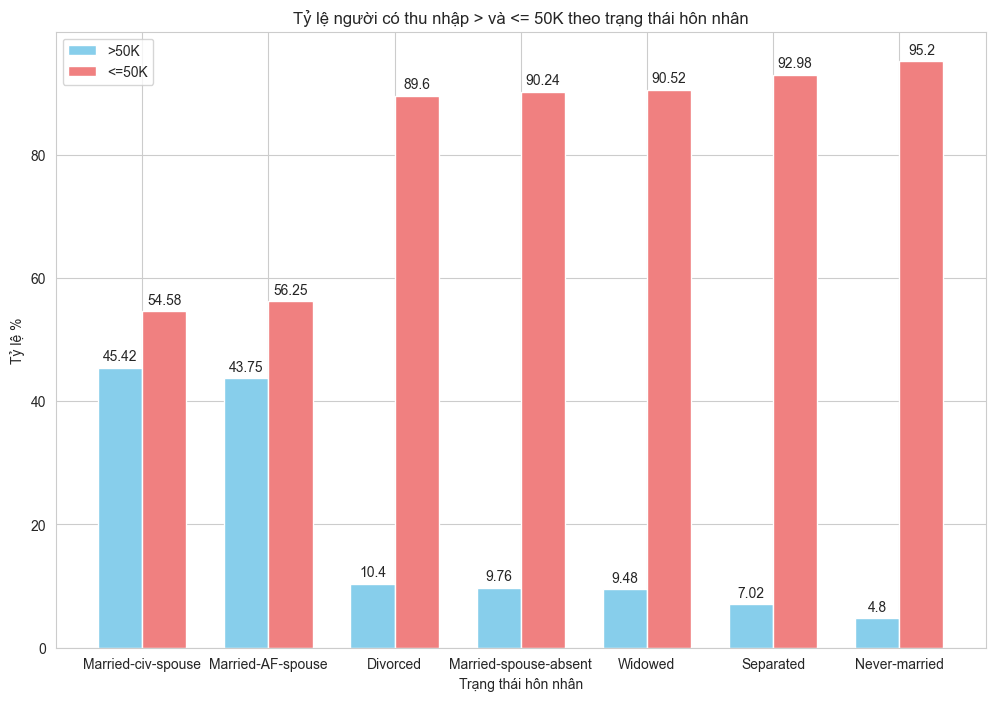

In [226]:
# Dữ liệu đã được sắp xếp
labels = Marial_Status_Pivot['Marital Status']
percentages_over_50k = Marial_Status_Pivot['% > 50K']
total_counts_over_50k = Marial_Status_Pivot['>50K']
total_counts_under_50k = Marial_Status_Pivot['<=50K']

# Định cấu hình vị trí cột
x = np.arange(len(labels))
width = 0.35

# Tạo figure và axis objects
fig, ax = plt.subplots(figsize=(12, 8))

# Vẽ các cột cho thu nhập trên 50K
rects1 = ax.bar(x - width/2, percentages_over_50k, width, label='>50K', color='skyblue')
# Vẽ các cột cho thu nhập dưới hoặc bằng 50K
rects2 = ax.bar(x + width/2, 100 - percentages_over_50k, width, label='<=50K', color='lightcoral')

# Thêm tiêu đề và chú thích
ax.set_xlabel('Trạng thái hôn nhân')
ax.set_ylabel('Tỷ lệ %')
ax.set_title('Tỷ lệ người có thu nhập > và <= 50K theo trạng thái hôn nhân')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Đặt nhãn trên từng cột
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

<Figure size 1800x1200 with 0 Axes>

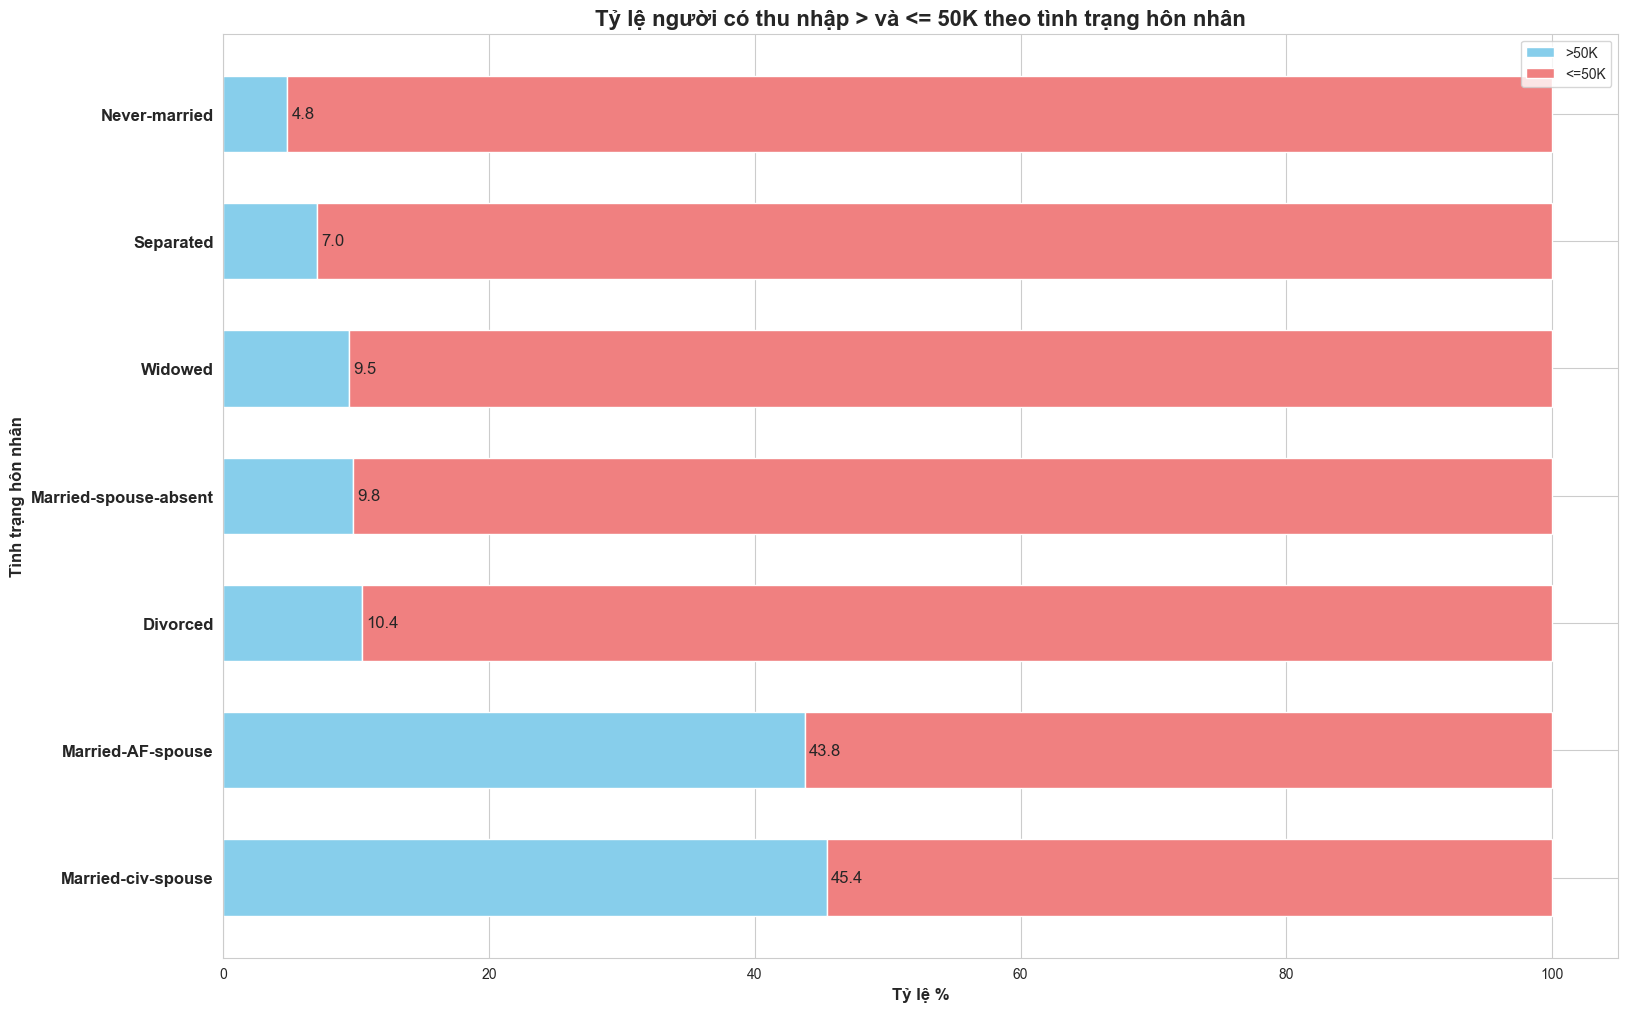

In [227]:
plt.figure(figsize=(18, 12))  # Thay đổi kích thước của biểu đồ

# Dữ liệu đã được sắp xếp
labels = Marial_Status_Pivot['Marital Status']
percentages_over_50k = Marial_Status_Pivot['% > 50K']
percentages_under_50k = 100 - Marial_Status_Pivot['% > 50K']  # Tính tỷ lệ phần trăm dưới 50K
total_counts_over_50k = Marial_Status_Pivot['>50K']
total_counts_under_50k = Marial_Status_Pivot['<=50K']

# Định cấu hình vị trí cột
y = np.arange(len(labels))
height = 0.6  # Tăng khoảng cách giữa các cột

# Tạo figure và axis objects với kích thước tăng lên
fig, ax = plt.subplots(figsize=(18, 12))  # Thay đổi kích thước của biểu đồ

# Vẽ các cột cho thu nhập trên 50K
rects1 = ax.barh(y, percentages_over_50k, height, label='>50K', color='skyblue')

# Thêm nhãn cho các cột có giá trị > 0
for rect in rects1:
    width = rect.get_width()
    if width > 0:
        ax.annotate('{:.1f}'.format(width),  # Chỉ hiển thị một số thập phân sau dấu phẩy
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(3, 0),  # 3 points horizontal offset
                    textcoords="offset points",
                    ha='left', va='center',
                    fontsize=12)  # Tùy chỉnh font size và font weight

# Vẽ các cột cho thu nhập dưới hoặc bằng 50K, bắt đầu từ tỷ lệ trên 50K
rects2 = ax.barh(y, percentages_under_50k, height, left=percentages_over_50k, label='<=50K', color='lightcoral')

# Thêm tiêu đề và chú thích
ax.set_ylabel('Tình trạng hôn nhân', fontsize=12, fontweight='bold')
ax.set_xlabel('Tỷ lệ %', fontsize=12, fontweight='bold')
ax.set_title('Tỷ lệ người có thu nhập > và <= 50K theo tình trạng hôn nhân', fontsize=16, fontweight='bold')
ax.set_yticks(y)
ax.set_yticklabels(labels, fontsize=12, fontweight='bold')
ax.legend()

plt.show()

#### 3.1.4. Phân tích dữ liệu Occupation (Nghề nghiệp)

Income             <=50K  >50K
Occupation                    
Adm-clerical        4784   756
Armed-Forces          10     4
Craft-repair        4665  1355
Exec-managerial     3117  2867
Farming-fishing     1308   172
Handlers-cleaners   1911   135
Machine-op-inspct   2605   365
No-occupation         10     0
Other-service       4612   196
Priv-house-serv      229     3
Prof-specialty      3304  2704
Protective-serv      669   307
Sales               3953  1455
Tech-support        1009   411
Transport-moving    1838   478
------------------------------------
Vẽ biểu đồ Column Chart


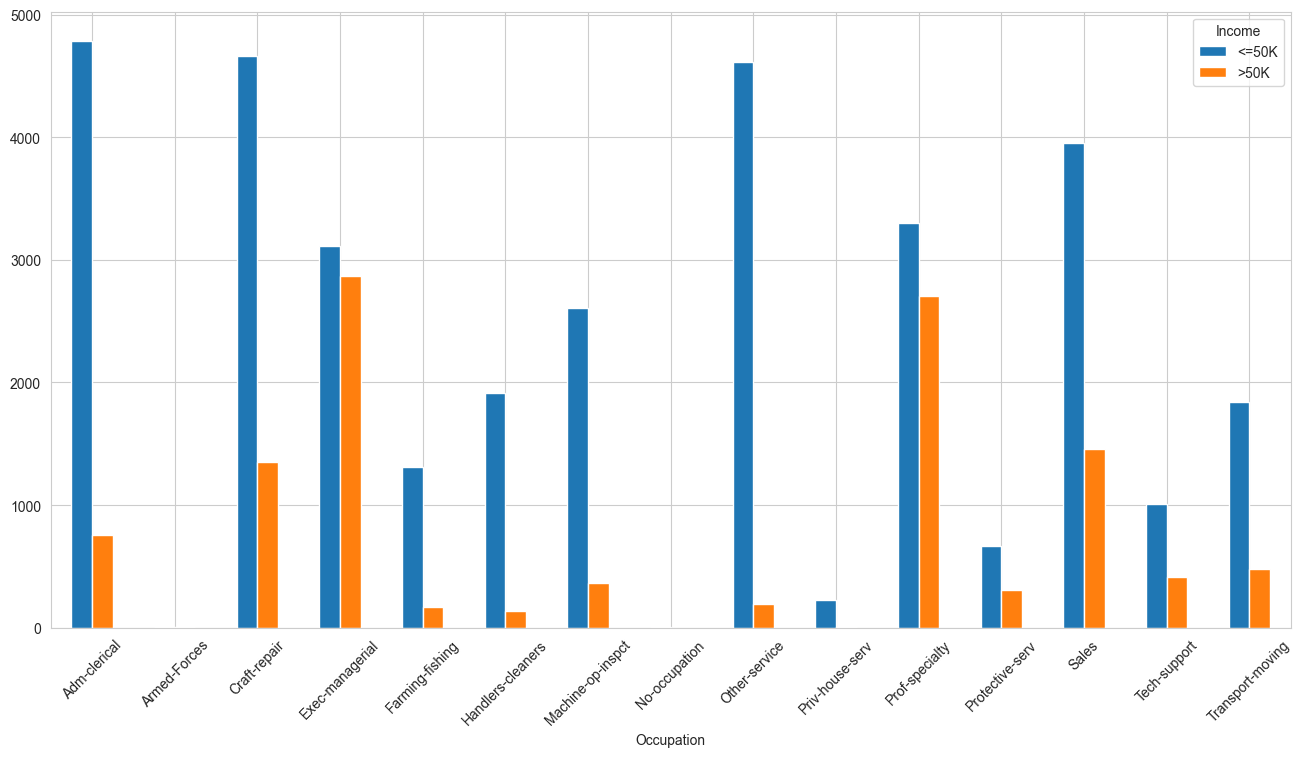

------------------------------------
Kiểm tra mối quan hệ giữa 2 cột Occupation và Income
Mối quan hệ giữa 2 cột Occupation và Income là Dependent


In [228]:
all_infomation_categorical_vs_categorical_variable(df, 'Occupation', 'Income')

- Adm-clerical (Nhân viên hành chính - văn phòng): Bao gồm các công việc liên quan đến nhiệm vụ hành chính và văn phòng, chẳng hạn như thư ký, lễ tân, nhân viên nhập dữ liệu và kế toán.
- Exec-managerial (Cán bộ quản lý): Bao gồm các vị trí quản lý và điều hành, chẳng hạn như CEO, COO, trưởng bộ phận và giám sát viên.
- Handlers-cleaners (Công nhân vận hành máy móc - Nhân viên vệ sinh): Bao gồm những người vận hành máy móc cơ bản hoặc thực hiện các nhiệm vụ dọn dẹp và bảo trì, chẳng hạn như người vận hành máy, thợ lắp ráp, nhân viên gác cửa và quản gia.
- Prof-specialty (Chuyên gia): Bao gồm các chuyên gia có kiến thức và kỹ năng chuyên môn hóa, chẳng hạn như kỹ sư, nhà khoa học, bác sĩ, luật sư, giáo viên và kế toán.
- Other-service (Dịch vụ khác): Đây là một nhóm rộng cho các nghề dịch vụ không phù hợp với các phân loại khác, chẳng hạn như người phục vụ, pha chế, thợ làm tóc, nhân viên bảo vệ và trợ lý chăm sóc cá nhân.
- Sales (Bán hàng): Bao gồm những người bán sản phẩm hoặc dịch vụ, bao gồm đại diện bán hàng, thu ngân và đại lý bất động sản.
- Transport-moving (Vận tải - di chuyển): Bao gồm các nghề liên quan đến vận chuyển hàng hóa hoặc con người, chẳng hạn như tài xế xe tải, tài xế xe buýt, tài xế taxi và nhân viên hậu cần.
- Farming-fishing (Nông nghiệp - thủy sản): Bao gồm những người tham gia vào nông nghiệp, lâm nghiệp và đánh bắt cá, chẳng hạn như nông dân, chủ trang trại, ngư dân và người nuôi trồng thủy sản.
- Machine-op-inspct (Thợ máy vận hành - Kiểm tra viên): Bao gồm các công việc liên quan đến vận hành máy móc hoặc kiểm tra sản phẩm và quy trình, chẳng hạn như người vận hành máy, công nhân dây chuyền sản xuất và thanh tra kiểm soát chất lượng.
- Tech-support (Hỗ trợ kỹ thuật): Bao gồm những người cung cấp hỗ trợ kỹ thuật cho khách hàng hoặc người dùng, chẳng hạn như kỹ thuật viên máy tính, quản trị viên mạng và chuyên gia hỗ trợ kỹ thuật.
- Craft-repair (Thợ thủ công - Sửa chữa): Bao gồm những người lao động lành nghề xây dựng, sửa chữa hoặc bảo trì các vật thể vật lý, chẳng hạn như thợ mộc, thợ điện, thợ sửa ống nước, thợ cơ khí và thợ máy.
- Protective-serv (Bảo vệ an ninh): Bao gồm các nghề liên quan đến an ninh và an toàn công cộng, chẳng hạn như cảnh sát, lính cứu hỏa, nhân viên bảo vệ và nhân viên quản giáo.
- Armed-Forces (Lực lượng vũ trang): Bao gồm nhân viên quân sự đang hoạt động trong quân đội, hải quân, không quân hoặc thủy quân lục chiến.
- Priv-house-serv (Giúp việc nhà): Bao gồm những người được tuyển dụng trong các hộ gia đình tư nhân để làm việc nhà, chẳng hạn như người giúp việc, quản gia và bảo mẫu.
- No-occupation (Không có việc làm): Cho biết những người hiện không được tuyển dụng hoặc đang tích cực tìm kiếm việc làm.

Nhìn vào biểu đồ trên ta có thể thấy có 1 nhóm nghề nghiệp đa phần có thu nhập cao hơn nhóm còn lại. Đó là Exec-managerial (Nhân viên quản lý), Prof-Specialty (Chuyên gia), Sales (Nhân viên bán hàng) và Craft-repair (Thợ thủ công, sửa chữa). Đây là nhóm các ngành nghề trong thực tế cũng có thu nhập cao. Đặc biệt là nhóm các nhân viên quản lý hoặc chuyên gia.

In [229]:
Occupation_Pivot = pd.pivot_table(df, index='Occupation', columns='Income', values='Marital Status', aggfunc='count')

Occupation_Pivot['% > 50K'] = round(Occupation_Pivot['>50K'] / (Occupation_Pivot['>50K'] + Occupation_Pivot['<=50K']) * 100, 2)

Occupation_Pivot = Occupation_Pivot.sort_values(by='% > 50K', ascending=False)

Occupation_Pivot = Occupation_Pivot.reset_index()

Occupation_Pivot

Income,Occupation,<=50K,>50K,% > 50K
0,Exec-managerial,3117.0,2867.0,47.91
1,Prof-specialty,3304.0,2704.0,45.01
2,Protective-serv,669.0,307.0,31.45
3,Tech-support,1009.0,411.0,28.94
4,Armed-Forces,10.0,4.0,28.57
5,Sales,3953.0,1455.0,26.90
6,Craft-repair,4665.0,1355.0,22.51
7,Transport-moving,1838.0,478.0,20.64
8,Adm-clerical,4784.0,756.0,13.65
9,Machine-op-inspct,2605.0,365.0,12.29


In [230]:
Occupation_GroupBy = df.groupby('Occupation').agg(
    total_count = ('Race', 'count')
).sort_values(by='total_count', ascending=False)

Occupation_GroupBy['% Count'] = round(Occupation_GroupBy['total_count'] / sum(Occupation_GroupBy['total_count']) * 100, 2)

Occupation_GroupBy

,total_count,% Count
Occupation,,
Craft-repair,6020,13.31
Prof-specialty,6008,13.28
Exec-managerial,5984,13.23
Adm-clerical,5540,12.25
Sales,5408,11.96
Other-service,4808,10.63
Machine-op-inspct,2970,6.57
Transport-moving,2316,5.12
Handlers-cleaners,2046,4.52


<Figure size 1800x1200 with 0 Axes>

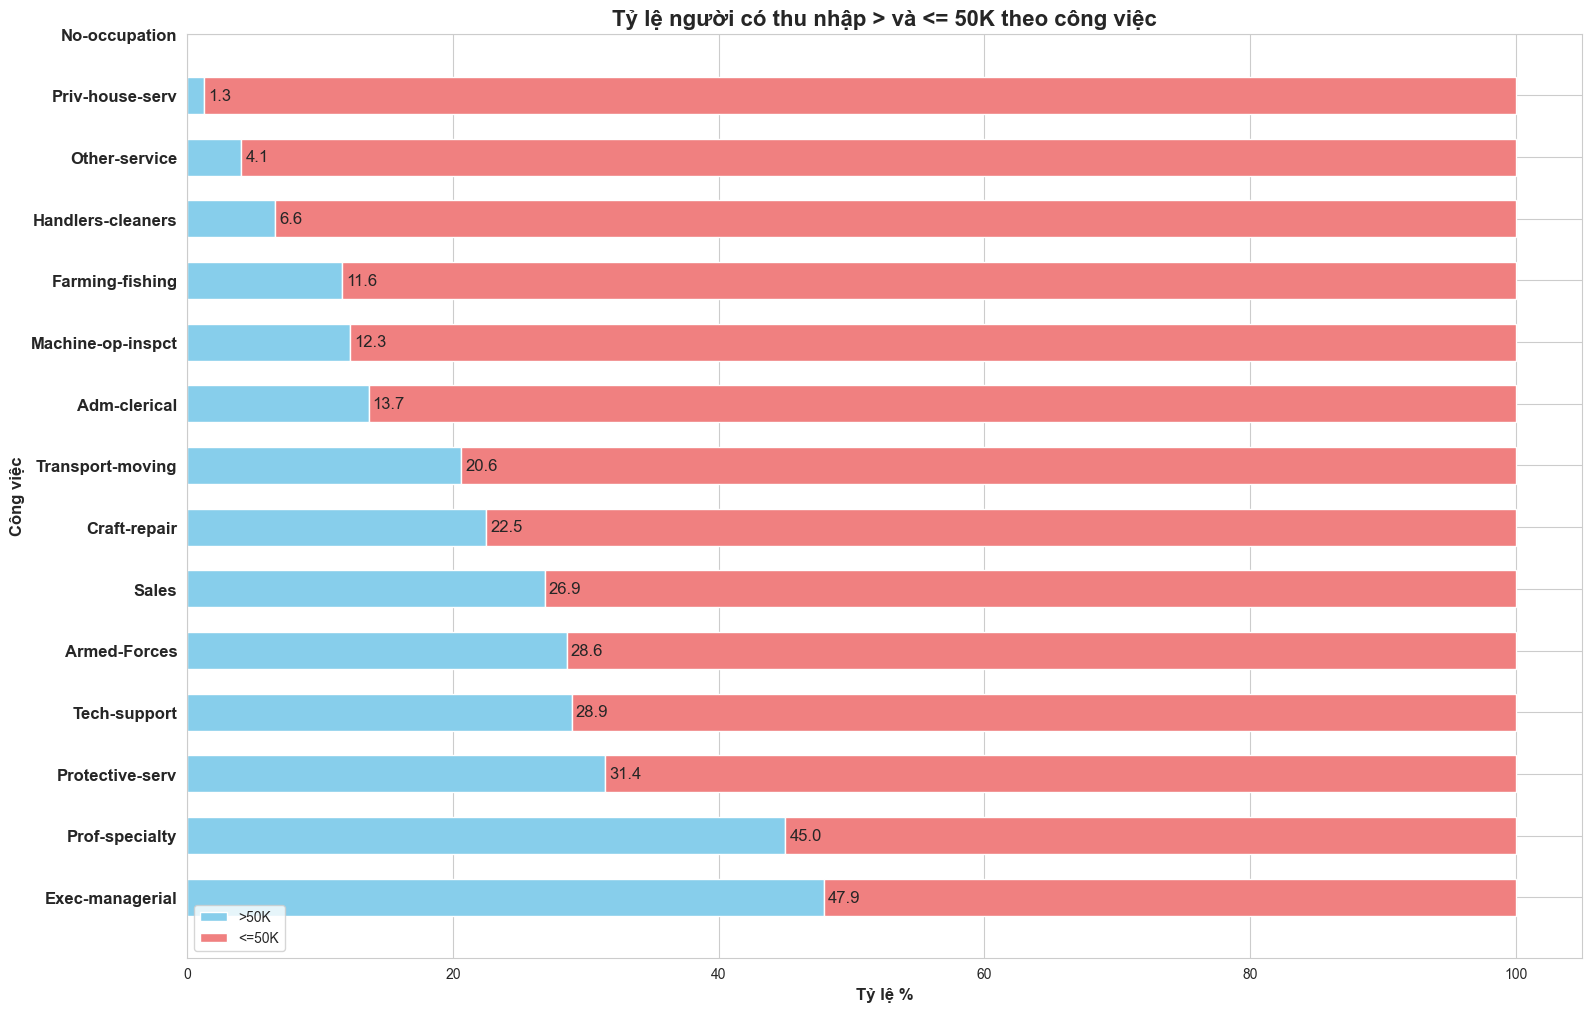

In [231]:
plt.figure(figsize=(18, 12))  # Thay đổi kích thước của biểu đồ

# Dữ liệu đã được sắp xếp
labels = Occupation_Pivot['Occupation']
percentages_over_50k = Occupation_Pivot['% > 50K']
percentages_under_50k = 100 - Occupation_Pivot['% > 50K']  # Tính tỷ lệ phần trăm dưới 50K
total_counts_over_50k = Occupation_Pivot['>50K']
total_counts_under_50k = Occupation_Pivot['<=50K']

# Định cấu hình vị trí cột
y = np.arange(len(labels))
height = 0.6  # Tăng khoảng cách giữa các cột

# Tạo figure và axis objects với kích thước tăng lên
fig, ax = plt.subplots(figsize=(18, 12))  # Thay đổi kích thước của biểu đồ

# Vẽ các cột cho thu nhập trên 50K
rects1 = ax.barh(y, percentages_over_50k, height, label='>50K', color='skyblue')

# Thêm nhãn cho các cột có giá trị > 0
for rect in rects1:
    width = rect.get_width()
    if width > 0:
        ax.annotate('{:.1f}'.format(width),  # Chỉ hiển thị một số thập phân sau dấu phẩy
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(3, 0),  # 3 points horizontal offset
                    textcoords="offset points",
                    ha='left', va='center',
                    fontsize=12)  # Tùy chỉnh font size và font weight

# Vẽ các cột cho thu nhập dưới hoặc bằng 50K, bắt đầu từ tỷ lệ trên 50K
rects2 = ax.barh(y, percentages_under_50k, height, left=percentages_over_50k, label='<=50K', color='lightcoral')

# Thêm tiêu đề và chú thích
ax.set_ylabel('Công việc', fontsize=12, fontweight='bold')
ax.set_xlabel('Tỷ lệ %', fontsize=12, fontweight='bold')
ax.set_title('Tỷ lệ người có thu nhập > và <= 50K theo công việc', fontsize=16, fontweight='bold')
ax.set_yticks(y)
ax.set_yticklabels(labels, fontsize=12, fontweight='bold')
ax.legend()

plt.show()

#### 3.1.5. Phân tích dữ liệu Relationship

Income          <=50K  >50K
Relationship               
Husband         10159  8507
Not-in-family   10475  1228
Other-relative   1300    50
Own-child        6528   105
Unmarried        4486   302
Wife             1076  1016
------------------------------------
Vẽ biểu đồ Column Chart


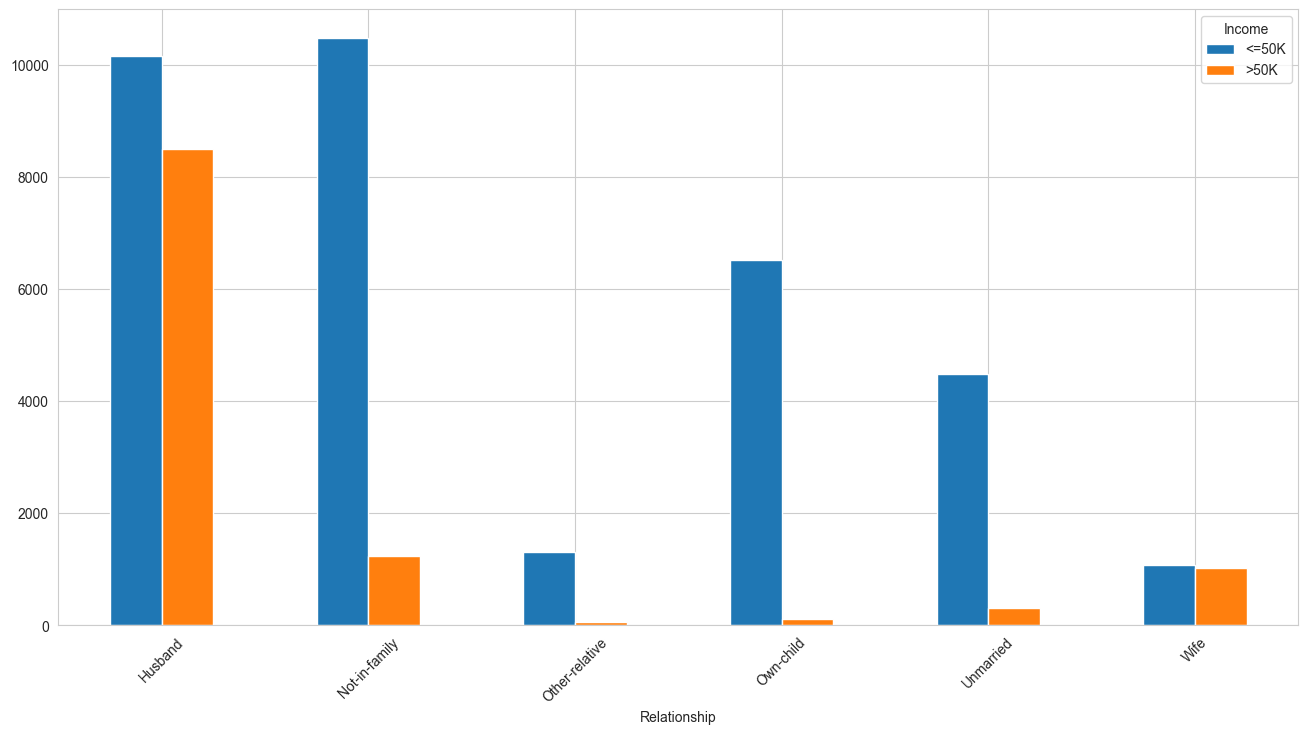

------------------------------------
Kiểm tra mối quan hệ giữa 2 cột Relationship và Income
Mối quan hệ giữa 2 cột Relationship và Income là Dependent


In [232]:
all_infomation_categorical_vs_categorical_variable(df, 'Relationship', 'Income')

Đa phần là những bạn là chồng (Husband) sẽ có thu nhập > 50K

In [233]:
df['Relationship'].unique().tolist()

['Not-in-family',
 'Husband',
 'Wife',
 'Own-child',
 'Unmarried',
 'Other-relative']

- Nhóm 1: Mối quan hệ không thuộc gia đình
Not-in-family (Không thuộc gia đình): Cho biết cá nhân không có quan hệ huyết thống hoặc hôn nhân với người đứng đầu hộ gia đình. Họ có thể là bạn cùng phòng, người ở trọ hoặc người không liên quan khác sống trong hộ gia đình.

- Nhóm 2: Vợ chồng
Husband (Chồng): Đây là vợ/chồng (chồng) của người đứng đầu hộ gia đình, giả sử người đứng đầu hộ gia đình xác định là nữ.
Wife (Vợ): Đây là vợ/chồng (vợ) của người đứng đầu hộ gia đình, giả sử người đứng đầu hộ gia đình xác định là nam.

- Nhóm 3: Con ruột
Own-child (Con ruột): Cho biết con ruột hoặc con nuôi của người đứng đầu hộ gia đình.

- -Nhóm 4: Không kết hôn
Unmarried (Không kết hôn): Không nhất thiết có nghĩa là cá nhân đó độc thân. Nó chỉ đơn giản có nghĩa là họ không kết hôn với người đứng đầu hộ gia đình. Họ có thể là cha mẹ đơn thân, bạn đời (sống chung nhưng không kết hôn) hoặc người thân khác không kết hôn.

- Nhóm 5: Người thân khác
Other-relative (Người thân khác): Đây là một nhóm rộng cho bất kỳ người thân nào khác của người đứng đầu hộ gia đình không thuộc vào các nhóm khác. Điều này có thể bao gồm cha mẹ, anh chị em, ông bà, cháu, cô dì, chú bác, anh chị em họ, cha mẹ vợ/chồng, v.v.

In [234]:
Relationship_Pivot = pd.pivot_table(df, index='Relationship', columns='Income', values='Marital Status', aggfunc='count')

Relationship_Pivot['% > 50K'] = round(Relationship_Pivot['>50K'] / (Relationship_Pivot['>50K'] + Relationship_Pivot['<=50K']) * 100, 2)

Relationship_Pivot = Relationship_Pivot.sort_values(by='% > 50K', ascending=False)

Relationship_Pivot

Income,<=50K,>50K,% > 50K
Relationship,,,
Wife,1076,1016,48.57
Husband,10159,8507,45.57
Not-in-family,10475,1228,10.49
Unmarried,4486,302,6.31
Other-relative,1300,50,3.70
Own-child,6528,105,1.58


Ta có thể thấy nhóm vợ chồng (đã có gia đình) sẽ thường có thu nhập tốt hơn so với các nhóm khác

In [235]:
RelationShip_GroupBy = df.groupby('Relationship').agg(
    total_count = ('Race', 'count')
).sort_values(by='total_count', ascending=False)

RelationShip_GroupBy['% Count'] = round(RelationShip_GroupBy['total_count'] / sum(RelationShip_GroupBy['total_count']) * 100, 2)

RelationShip_GroupBy

,total_count,% Count
Relationship,,
Husband,18666,41.27
Not-in-family,11703,25.87
Own-child,6633,14.66
Unmarried,4788,10.59
Wife,2092,4.63
Other-relative,1350,2.98


In [236]:
Relationship_Pivot = pd.pivot_table(df, index='Relationship', columns='Income', values='Occupation', aggfunc='count')

Relationship_Pivot['% > 50K'] = round(Relationship_Pivot['>50K'] / (Relationship_Pivot['>50K'] + Relationship_Pivot['<=50K']) * 100, 2)

Relationship_Pivot = Relationship_Pivot.sort_values(by='% > 50K', ascending=False)

Relationship_Pivot = Relationship_Pivot.reset_index()

Relationship_Pivot

Income,Relationship,<=50K,>50K,% > 50K
0,Wife,1076,1016,48.57
1,Husband,10159,8507,45.57
2,Not-in-family,10475,1228,10.49
3,Unmarried,4486,302,6.31
4,Other-relative,1300,50,3.70
5,Own-child,6528,105,1.58


<Figure size 1800x1200 with 0 Axes>

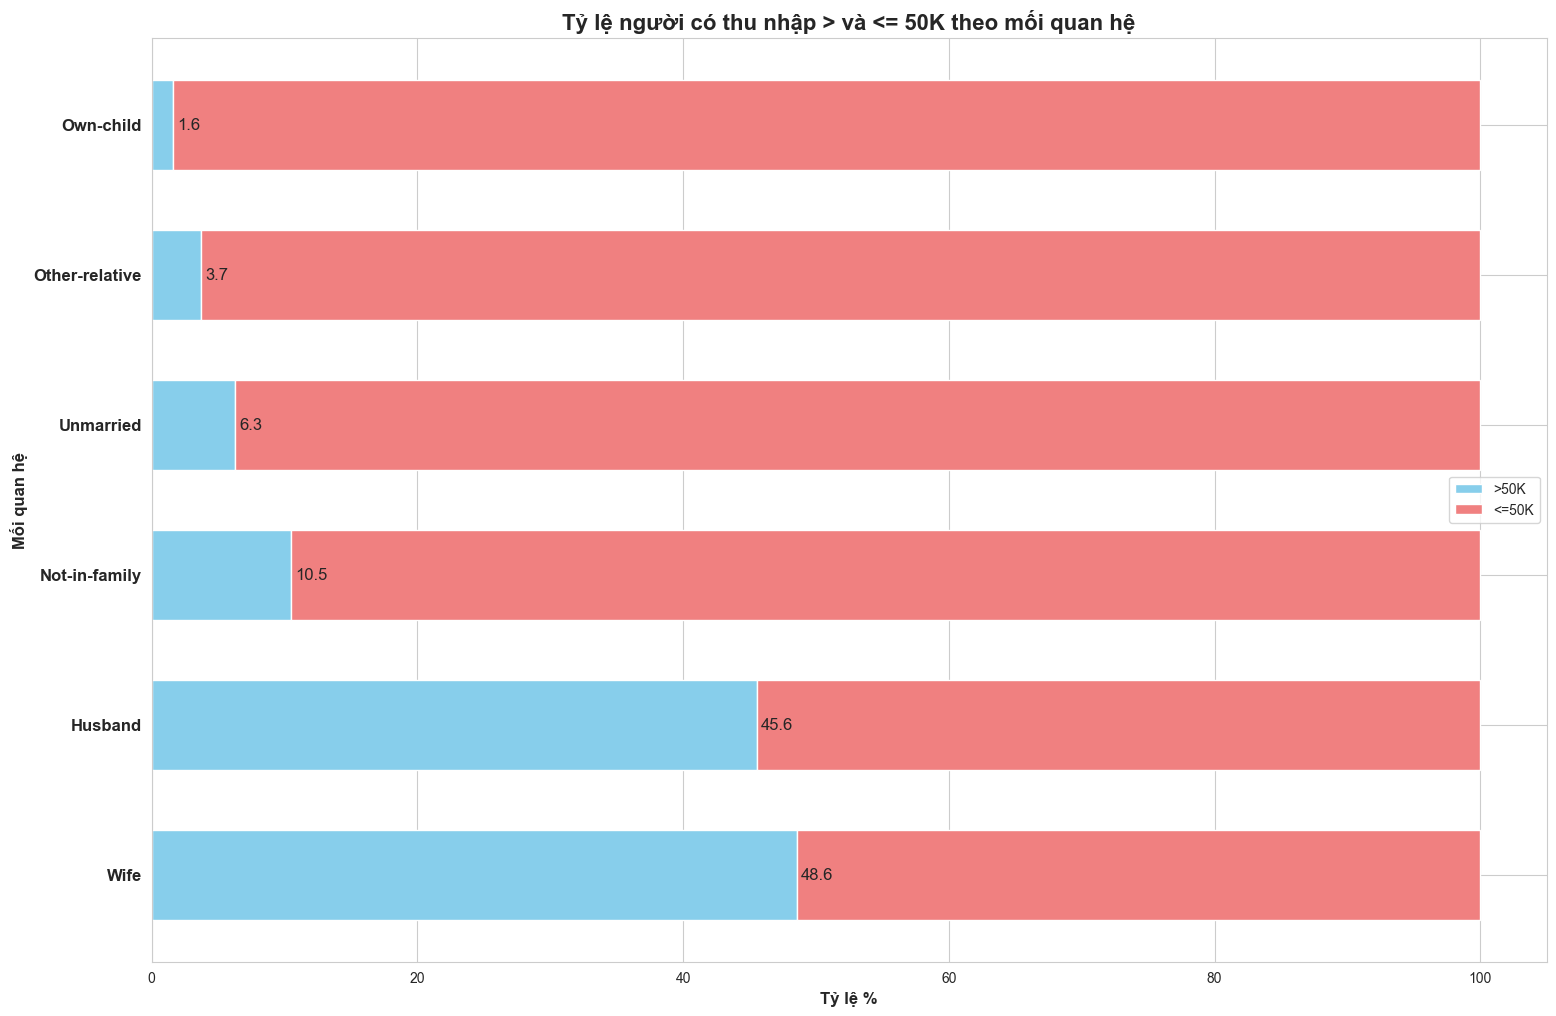

In [237]:
plt.figure(figsize=(18, 12))  # Thay đổi kích thước của biểu đồ

# Dữ liệu đã được sắp xếp
labels = Relationship_Pivot['Relationship']
percentages_over_50k = Relationship_Pivot['% > 50K']
percentages_under_50k = 100 - Relationship_Pivot['% > 50K']  # Tính tỷ lệ phần trăm dưới 50K
total_counts_over_50k = Relationship_Pivot['>50K']
total_counts_under_50k = Relationship_Pivot['<=50K']

# Định cấu hình vị trí cột
y = np.arange(len(labels))
height = 0.6  # Tăng khoảng cách giữa các cột

# Tạo figure và axis objects với kích thước tăng lên
fig, ax = plt.subplots(figsize=(18, 12))  # Thay đổi kích thước của biểu đồ

# Vẽ các cột cho thu nhập trên 50K
rects1 = ax.barh(y, percentages_over_50k, height, label='>50K', color='skyblue')

# Thêm nhãn cho các cột có giá trị > 0
for rect in rects1:
    width = rect.get_width()
    if width > 0:
        ax.annotate('{:.1f}'.format(width),  # Chỉ hiển thị một số thập phân sau dấu phẩy
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(3, 0),  # 3 points horizontal offset
                    textcoords="offset points",
                    ha='left', va='center',
                    fontsize=12)  # Tùy chỉnh font size và font weight

# Vẽ các cột cho thu nhập dưới hoặc bằng 50K, bắt đầu từ tỷ lệ trên 50K
rects2 = ax.barh(y, percentages_under_50k, height, left=percentages_over_50k, label='<=50K', color='lightcoral')

# Thêm tiêu đề và chú thích
ax.set_ylabel('Mối quan hệ', fontsize=12, fontweight='bold')
ax.set_xlabel('Tỷ lệ %', fontsize=12, fontweight='bold')
ax.set_title('Tỷ lệ người có thu nhập > và <= 50K theo mối quan hệ', fontsize=16, fontweight='bold')
ax.set_yticks(y)
ax.set_yticklabels(labels, fontsize=12, fontweight='bold')
ax.legend()

plt.show()

#### 3.1.6. Phân tích dữ liệu theo Race (dân tộc)

Income              <=50K   >50K
Race                            
Amer-Indian-Eskimo    382     53
Asian-Pac-Islander    934    369
Black                3697    534
Other                 308     45
White               28703  10207
------------------------------------
Vẽ biểu đồ Column Chart


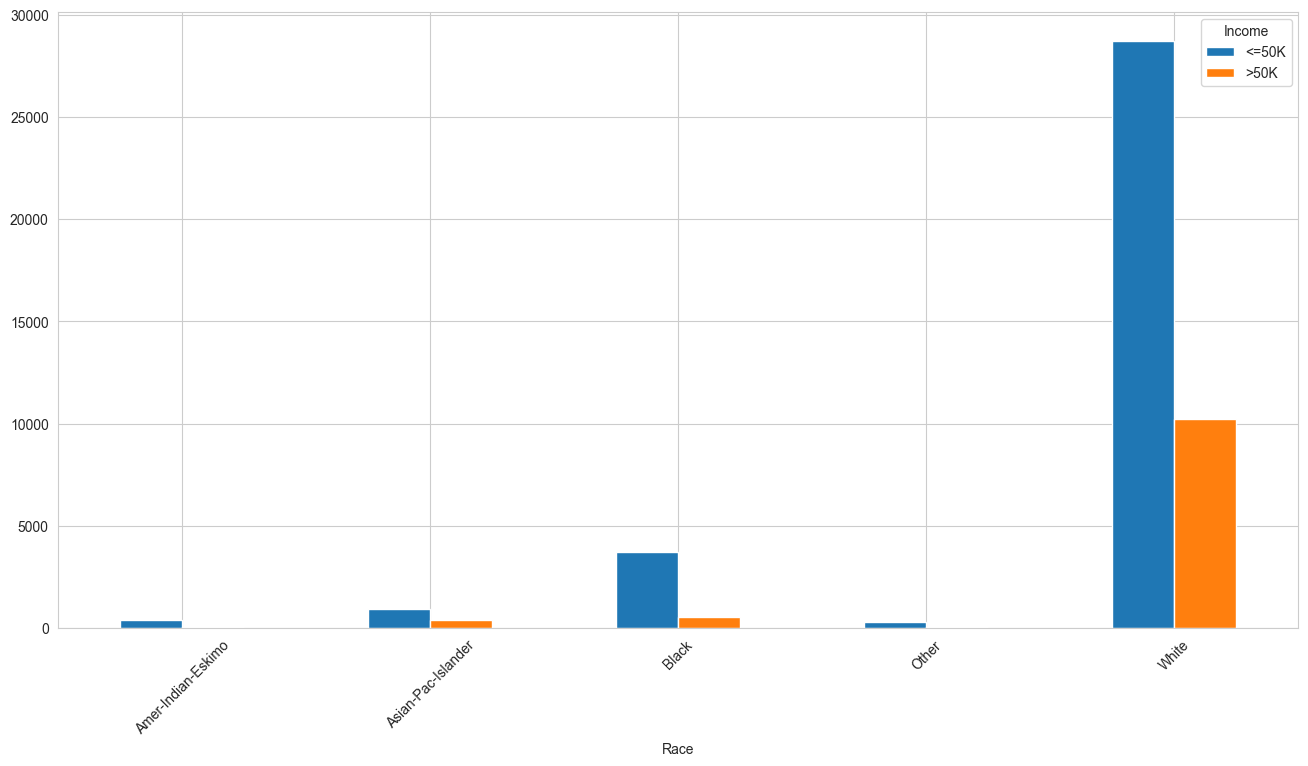

------------------------------------
Kiểm tra mối quan hệ giữa 2 cột Race và Income
Mối quan hệ giữa 2 cột Race và Income là Dependent


In [238]:
all_infomation_categorical_vs_categorical_variable(df,'Race', 'Income')

In [239]:
df['Race'].unique().tolist()

['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']

- White: Người da trắng
- Black: Người da đen
- Asian-Pac-Islander: Người châu Á, thổ dân Thái Bình Dương
- Amer-Indian-Eskimo: Thổ dân Mỹ, Eskimo
- Other: Khác

Nhìn vào biểu đồ trên các bạn có thể thấy những người da trắng thường có mức thu nhập > 50K. Còn các nhóm còn lại thì có lượng người có thu nhập > 50K là rất ít.

Tuy nhiên nhóm người châu á tuy ít người hơn nhóm người da trắng nhưng tỷ lệ có mức thu nhập > 50K là lớn nhất.

In [240]:
Race_Pivot = pd.pivot_table(df, index='Race', columns='Income', values='Marital Status', aggfunc='count')

Race_Pivot['% > 50K'] = round(Race_Pivot['>50K'] / (Race_Pivot['>50K'] + Race_Pivot['<=50K']) * 100, 2)

Race_Pivot = Race_Pivot.sort_values(by='% > 50K', ascending=False)

Race_Pivot

Income,<=50K,>50K,% > 50K
Race,,,
Asian-Pac-Islander,934,369,28.32
White,28703,10207,26.23
Other,308,45,12.75
Black,3697,534,12.62
Amer-Indian-Eskimo,382,53,12.18


In [241]:
Race_GroupBy = df.groupby('Race').agg(
    total_count = ('Occupation', 'count')
).sort_values(by='total_count', ascending=False)

Race_GroupBy['% Count'] = round(Race_GroupBy['total_count'] / sum(Race_GroupBy['total_count']) * 100, 2)

Race_GroupBy

,total_count,% Count
Race,,
White,38910,86.02
Black,4231,9.35
Asian-Pac-Islander,1303,2.88
Amer-Indian-Eskimo,435,0.96
Other,353,0.78


In [242]:
Race_Pivot = pd.pivot_table(df, index='Race', columns='Income', values='Occupation', aggfunc='count')

Race_Pivot['% > 50K'] = round(Race_Pivot['>50K'] / (Race_Pivot['>50K'] + Race_Pivot['<=50K']) * 100, 2)

Race_Pivot = Race_Pivot.sort_values(by='% > 50K', ascending=False)

Race_Pivot = Race_Pivot.reset_index()

Race_Pivot

Income,Race,<=50K,>50K,% > 50K
0,Asian-Pac-Islander,934,369,28.32
1,White,28703,10207,26.23
2,Other,308,45,12.75
3,Black,3697,534,12.62
4,Amer-Indian-Eskimo,382,53,12.18


<Figure size 1800x1200 with 0 Axes>

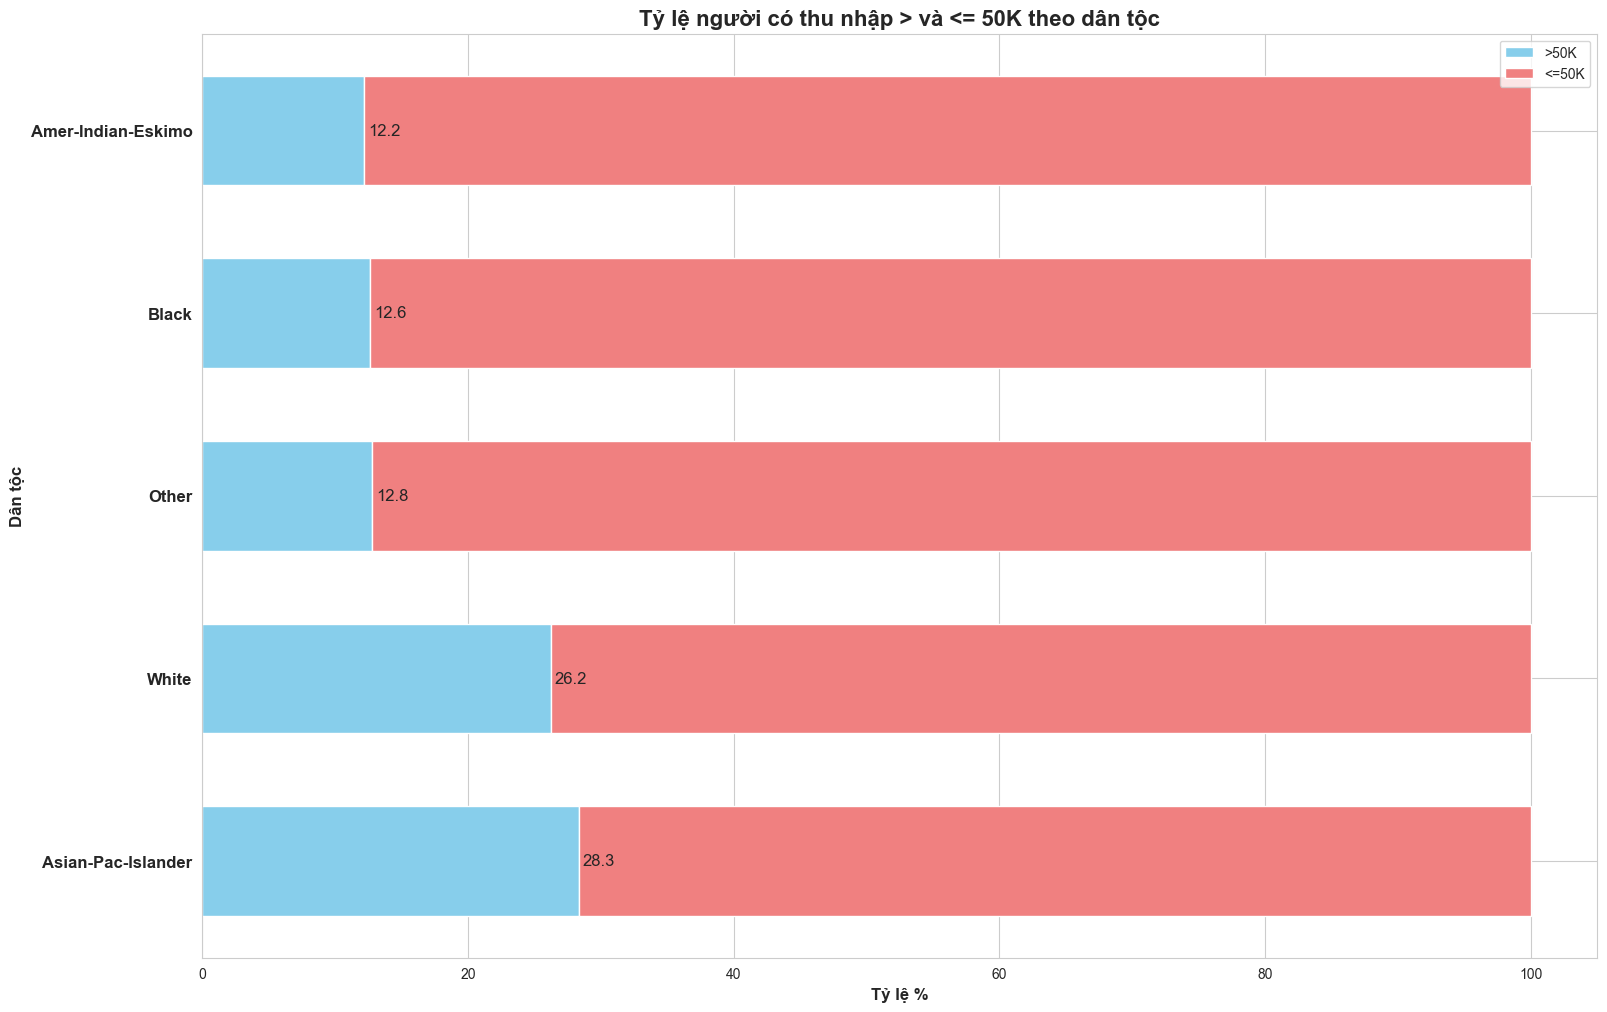

In [243]:
plt.figure(figsize=(18, 12))  # Thay đổi kích thước của biểu đồ

# Dữ liệu đã được sắp xếp
labels = Race_Pivot['Race']
percentages_over_50k = Race_Pivot['% > 50K']
percentages_under_50k = 100 - Race_Pivot['% > 50K']  # Tính tỷ lệ phần trăm dưới 50K
total_counts_over_50k = Race_Pivot['>50K']
total_counts_under_50k = Race_Pivot['<=50K']

# Định cấu hình vị trí cột
y = np.arange(len(labels))
height = 0.6  # Tăng khoảng cách giữa các cột

# Tạo figure và axis objects với kích thước tăng lên
fig, ax = plt.subplots(figsize=(18, 12))  # Thay đổi kích thước của biểu đồ

# Vẽ các cột cho thu nhập trên 50K
rects1 = ax.barh(y, percentages_over_50k, height, label='>50K', color='skyblue')

# Thêm nhãn cho các cột có giá trị > 0
for rect in rects1:
    width = rect.get_width()
    if width > 0:
        ax.annotate('{:.1f}'.format(width),  # Chỉ hiển thị một số thập phân sau dấu phẩy
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(3, 0),  # 3 points horizontal offset
                    textcoords="offset points",
                    ha='left', va='center',
                    fontsize=12)  # Tùy chỉnh font size và font weight

# Vẽ các cột cho thu nhập dưới hoặc bằng 50K, bắt đầu từ tỷ lệ trên 50K
rects2 = ax.barh(y, percentages_under_50k, height, left=percentages_over_50k, label='<=50K', color='lightcoral')

# Thêm tiêu đề và chú thích
ax.set_ylabel('Dân tộc', fontsize=12, fontweight='bold')
ax.set_xlabel('Tỷ lệ %', fontsize=12, fontweight='bold')
ax.set_title('Tỷ lệ người có thu nhập > và <= 50K theo dân tộc', fontsize=16, fontweight='bold')
ax.set_yticks(y)
ax.set_yticklabels(labels, fontsize=12, fontweight='bold')
ax.legend()

plt.show()

#### 3.1.7. Phân tích dữ liệu theo Gender

Income  <=50K  >50K
Gender             
Female  13029  1669
Male    20995  9539
------------------------------------
Vẽ biểu đồ Column Chart


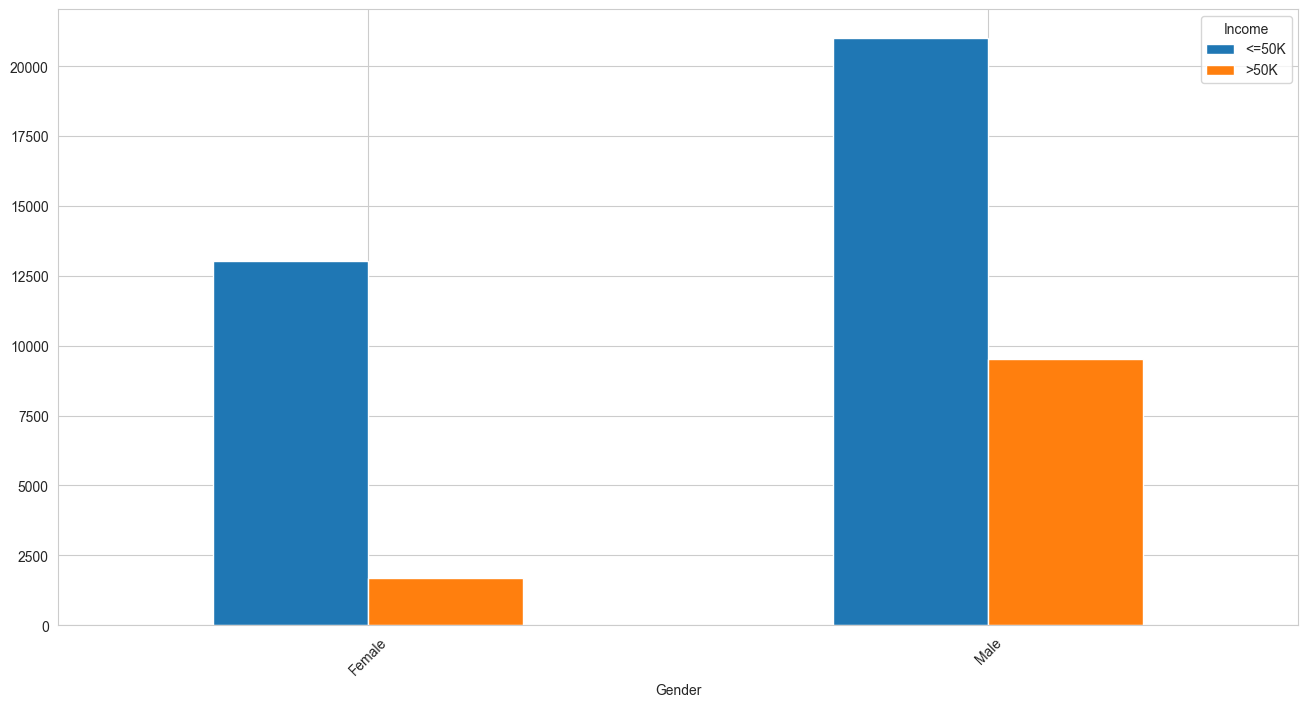

------------------------------------
Kiểm tra mối quan hệ giữa 2 cột Gender và Income
Mối quan hệ giữa 2 cột Gender và Income là Dependent


In [244]:
all_infomation_categorical_vs_categorical_variable(df, 'Gender', 'Income')

In [245]:
Gender_Pivot = pd.pivot_table(df, index='Gender', columns='Income', values='Marital Status', aggfunc='count')

Gender_Pivot = Gender_Pivot.reset_index()

Gender_Pivot

Income,Gender,<=50K,>50K
0,Female,13029,1669
1,Male,20995,9539


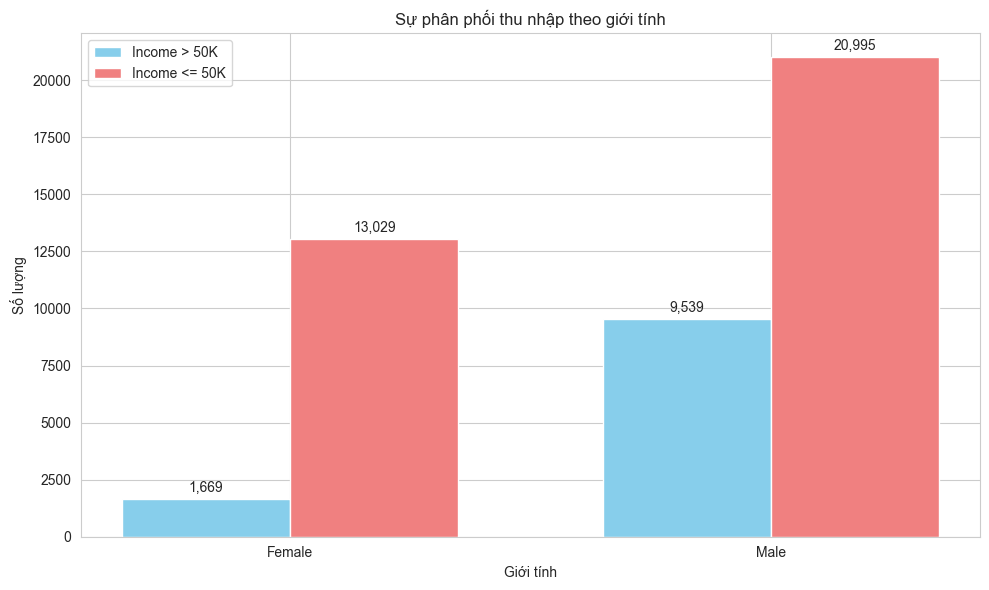

In [246]:
# Dữ liệu đã được sắp xếp
genders = Gender_Pivot['Gender']
income_over_50k = Gender_Pivot['>50K']
income_under_50k = Gender_Pivot['<=50K']

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(genders))

bars1 = plt.bar(index, income_over_50k, bar_width, label='Income > 50K', color='skyblue')
bars2 = plt.bar([i + bar_width for i in index], income_under_50k, bar_width, label='Income <= 50K', color='lightcoral')

plt.xlabel('Giới tính')
plt.ylabel('Số lượng')
plt.title('Sự phân phối thu nhập theo giới tính')
plt.xticks([i + bar_width / 2 for i in index], genders)
plt.legend()

# Thêm nhãn dữ liệu vào từng cột
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{:,.0f}'.format(height),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.tight_layout()
plt.show()

In [247]:
Gender_GroupBy = df.groupby('Gender').agg(
    total_count = ('Occupation', 'count')
).sort_values(by='total_count', ascending=False)

Gender_GroupBy['% Count'] = round(Gender_GroupBy['total_count'] / sum(Gender_GroupBy['total_count']) * 100, 2)

Gender_GroupBy

,total_count,% Count
Gender,,
Male,30534,67.51
Female,14698,32.49


Thường thì các bạn Nam sẽ có mức lương cao hơn các bạn nữ

#### 3.1.8. Phân tích dữ liệu theo Native Country

Income                      <=50K   >50K
Native Country                          
Cambodia                       17      9
Canada                        103     60
China                          77     36
Columbia                       78      4
Cuba                           99     34
Dominican-Republic             92      5
Ecuador                        37      6
El-Salvador                   136     11
England                        72     47
France                         20     16
Germany                       135     58
Greece                         31     18
Guatemala                      83      3
Haiti                          60      9
Holand-Netherlands              1      0
Honduras                       17      2
Hong                           20      8
Hungary                        12      6
India                          85     62
Iran                           34     22
Ireland                        26     10
Italy                          67     33
Jamaica         

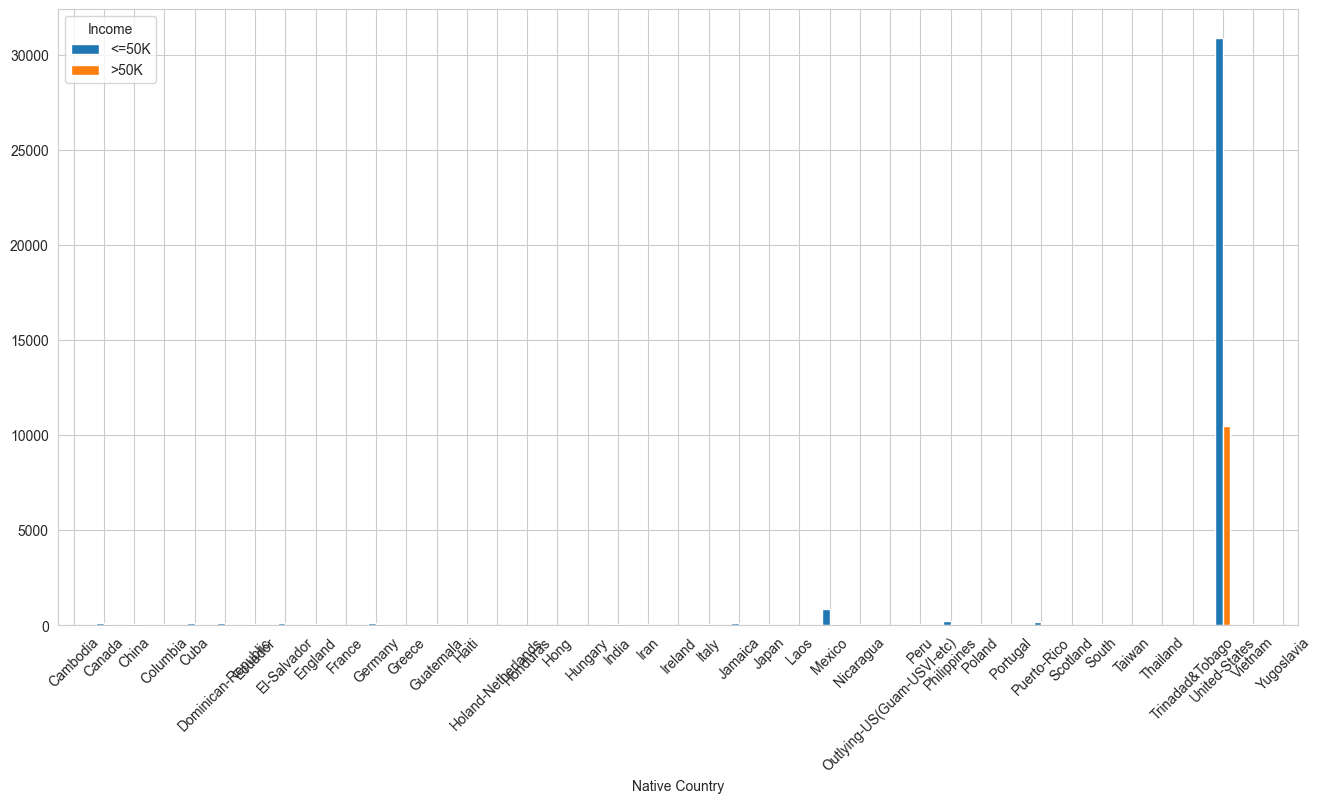

------------------------------------
Kiểm tra mối quan hệ giữa 2 cột Native Country và Income
Mối quan hệ giữa 2 cột Native Country và Income là Dependent


In [248]:
all_infomation_categorical_vs_categorical_variable(df, 'Native Country', 'Income')

In [249]:
Country_GroupBy = df.groupby('Native Country').agg(
    total_count = ('Occupation', 'count')
).sort_values(by='total_count', ascending=False)

Country_GroupBy['% Count'] = round(Country_GroupBy['total_count'] / sum(Country_GroupBy['total_count']) * 100, 2)

Country_GroupBy = Country_GroupBy.reset_index()

Country_GroupBy

,Native Country,total_count,% Count
0,United-States,41302,91.31
1,Mexico,903,2.00
2,Philippines,283,0.63
3,Germany,193,0.43
4,Puerto-Rico,175,0.39
5,Canada,163,0.36
6,El-Salvador,147,0.32
7,India,147,0.32
8,Cuba,133,0.29
9,England,119,0.26


In [250]:
Country_GroupBy['Native Country Final'] = Country_GroupBy['Native Country'].apply(
    lambda x: x if x == 'United-States' else 'Others'
)

Country_GroupBy

,Native Country,total_count,% Count,Native Country Final
0,United-States,41302,91.31,United-States
1,Mexico,903,2.00,Others
2,Philippines,283,0.63,Others
3,Germany,193,0.43,Others
4,Puerto-Rico,175,0.39,Others
5,Canada,163,0.36,Others
6,El-Salvador,147,0.32,Others
7,India,147,0.32,Others
8,Cuba,133,0.29,Others
9,England,119,0.26,Others


In [251]:
Country_GroupBy = Country_GroupBy.groupby('Native Country Final').agg(
    total_count = ('total_count', 'sum')
).sort_values(by='total_count', ascending=False).reset_index()

Country_GroupBy

,Native Country Final,total_count
0,United-States,41302
1,Others,3930


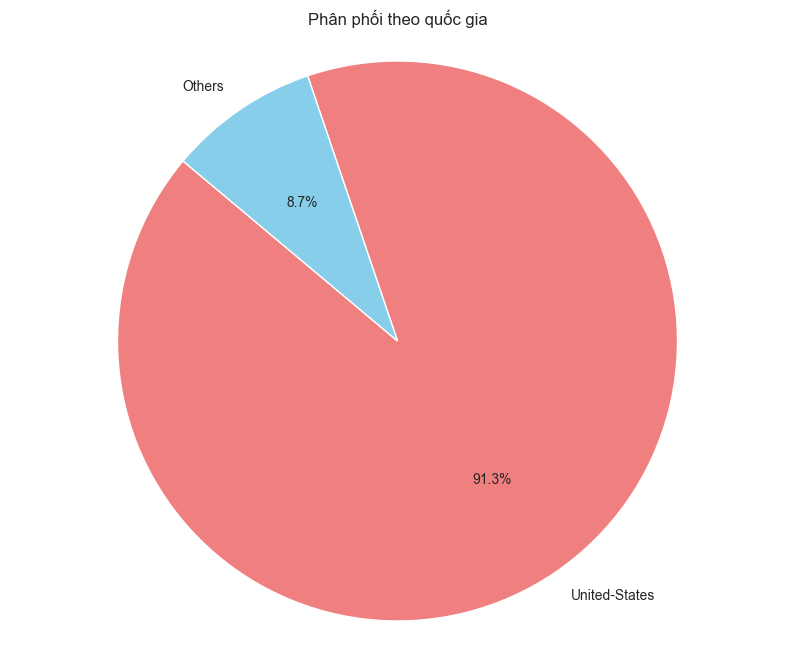

In [252]:
# Dữ liệu đã được điều chỉnh
labels = Country_GroupBy['Native Country Final']
sizes = Country_GroupBy['total_count']

# Tạo biểu đồ Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'skyblue'])
plt.axis('equal')
plt.title('Phân phối theo quốc gia')
plt.show()

### 3.2. Phân tích các trường dạng số

#### 3.2.1. Phân tích dữ liệu cột Age (Tuổi)

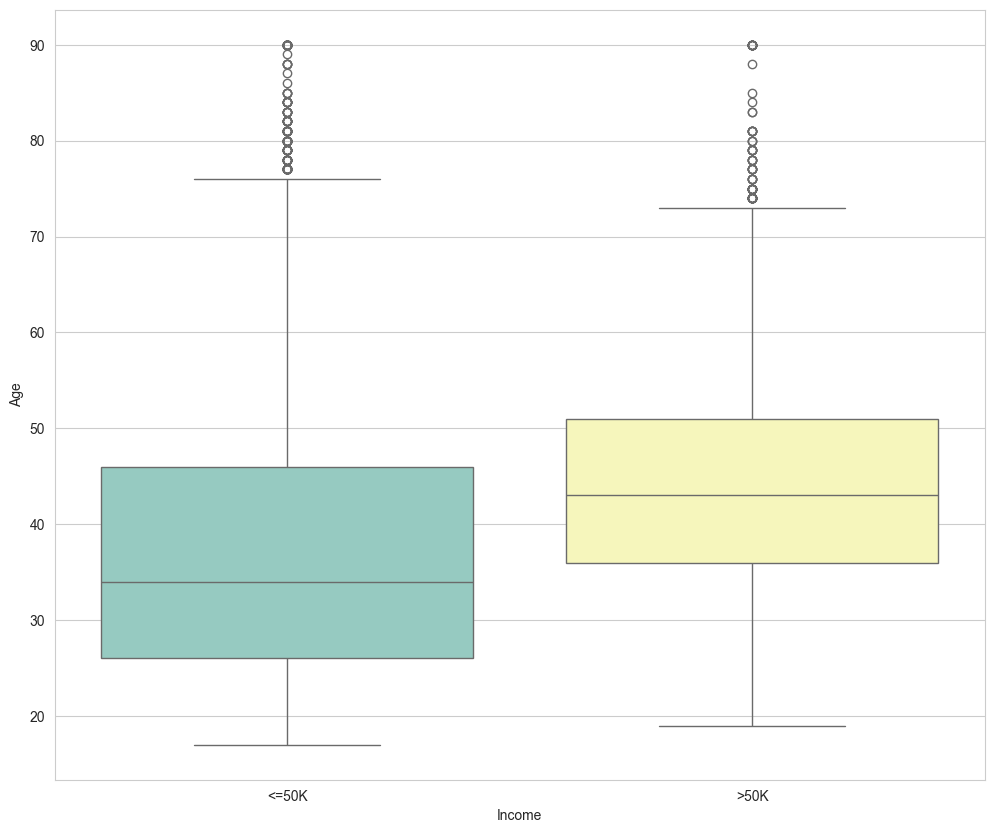

----------------------------------------
Kiểm tra 2 biến Age và Income có phụ thuộc không?
2 cột Age và Income có phụ thuộc
----------------------------------------
Sử dụng tukeyhsd
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
 <=50K   >50K   7.2616   0.0 6.9875 7.5357   True
-------------------------------------------------


In [253]:
all_infomation_categorical_vs_continuous(df, 'Age', 'Income', 'Age ~ C(Income)')

Nhìn vào biểu đồ ta có thể thấy nhóm có thu nhập <= 50K rơi vào nhóm từ 27 đến 45 tuổi.

Còn nhóm có thu nhập > 50K rơi vào nhóm từ 35 đến 51 tuổi

Ta có thể hiểu đơn giản đó là đa phần các lao động có độ tuổi lớn (thâm niên lao động nhiều năm) thì thường sẽ có mức lương cao hơn

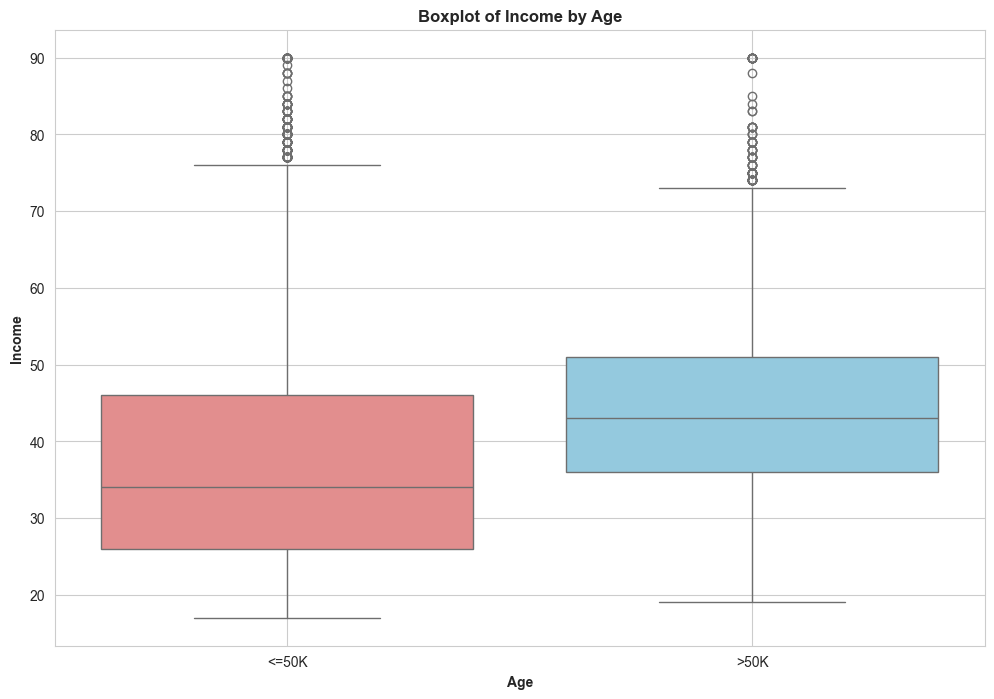

In [254]:
plt.figure(figsize=(12, 8))

sns.boxplot(df, y='Age', x='Income', palette=["lightcoral", "skyblue"], orient='v')

plt.xlabel('Age', fontweight='bold')
plt.ylabel('Income', fontweight='bold')
plt.title('Boxplot of Income by Age', fontweight='bold')
plt.grid(True)
plt.show()

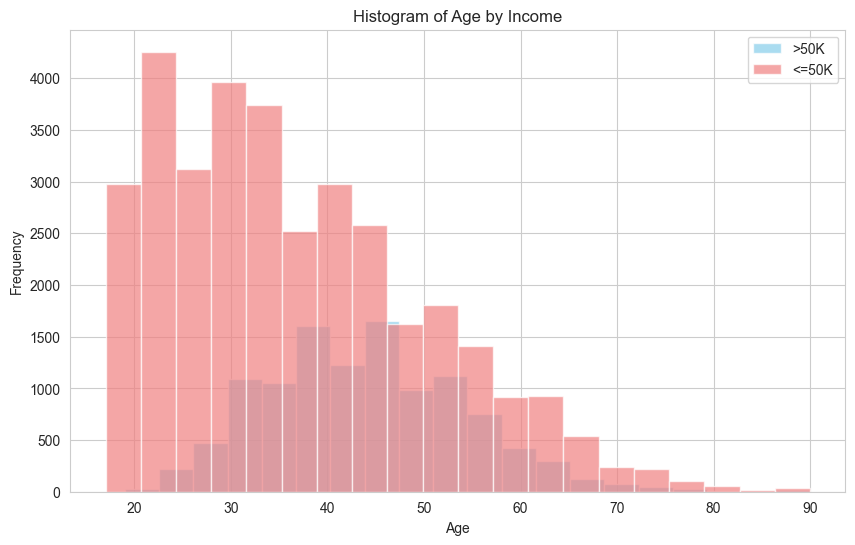

In [255]:
# Tách dữ liệu thành hai nhóm dựa trên 'Income'
income_over_50k = df[df['Income'] == '>50K']['Age']
income_under_50k = df[df['Income'] == '<=50K']['Age']

# Vẽ biểu đồ histogram
plt.figure(figsize=(10, 6))
plt.hist(income_over_50k, bins=20, alpha=0.7, color='skyblue', label='>50K')
plt.hist(income_under_50k, bins=20, alpha=0.7, color='lightcoral', label='<=50K')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age by Income')
plt.legend()
plt.grid(True)
plt.show()

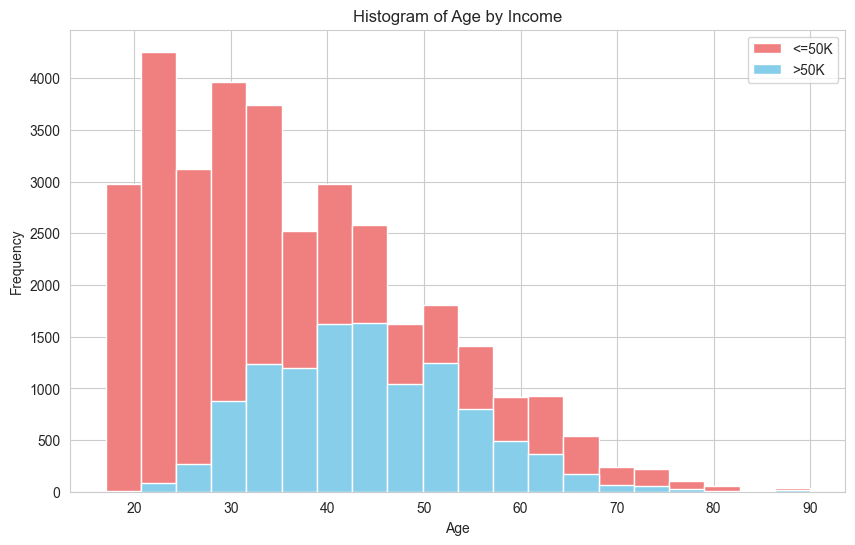

In [256]:
# Tìm giá trị lớn nhất và nhỏ nhất của cột 'Age'
age_min = df['Age'].min()
age_max = df['Age'].max()

# Tách dữ liệu thành hai nhóm dựa trên 'Income'
income_over_50k = df[df['Income'] == '>50K']['Age']
income_under_50k = df[df['Income'] == '<=50K']['Age']

# Xác định số lượng bins
num_bins = 20

# Tính khoảng giá trị của mỗi bins
bin_width = (age_max - age_min) / num_bins

# Tính toán edges của bins
bins_edges = [age_min + i * bin_width for i in range(num_bins+1)]

# Vẽ biểu đồ histogram
plt.figure(figsize=(10, 6))

plt.hist(income_under_50k, bins=bins_edges, alpha=1, color='lightcoral', label='<=50K')
plt.hist(income_over_50k, bins=bins_edges, alpha=1, color='skyblue', label='>50K')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age by Income')
plt.legend()
plt.grid(True)
plt.show()

#### 3.2.2. Phân tích dữ liệu theo Final Weight

In [257]:
df[['Final_Weight', 'Income']].sort_values(by='Final_Weight', ascending=False)

,Final_Weight,Income
7974,1490400,<=50K
14449,1484705,<=50K
18138,1455435,<=50K
16739,1366120,<=50K
15569,1268339,<=50K
...,...,...
25743,14878,>50K
7668,13769,>50K
1060,13769,<=50K
27207,13769,<=50K


Final Weight in CPS: Giải thích trọng số cuối cùng trong Khảo sát dân số hiện hành (CPS)

**Trọng số cuối cùng** là một yếu tố quan trọng trong các tệp dữ liệu Khảo sát dân số hiện hành (CPS) của Cục điều tra dân số Hoa Kỳ. Nó được sử dụng để điều chỉnh dữ liệu thô nhằm phản ánh chính xác hơn dân số dân sự phi thể chế của Hoa Kỳ.

**Tại sao cần trọng số?**

Mẫu khảo sát CPS không phải là một đại diện hoàn hảo của toàn bộ dân số. Mọi người có một số xác suất nhất định được chọn tham gia khảo sát. Trọng số cuối cùng giúp khắc phục điều này bằng cách điều chỉnh dữ liệu của những người được chọn sao cho phản ánh chính xác tỷ lệ của họ trong dân số nói chung.

**Ba nhóm kiểm soát được sử dụng:**

1. **Ước tính dân số 16+ theo từng tiểu bang:** Nhóm này đảm bảo rằng dữ liệu khảo sát phản ánh chính xác quy mô dân số ở độ tuổi trưởng thành của từng tiểu bang.
2. **Kiểm soát theo nguồn gốc Tây Ban Nha theo độ tuổi và giới tính:** Nhóm này đảm bảo đại diện chính xác cho người gốc Tây Ban Nha trong các nhóm tuổi và giới tính khác nhau.
3. **Kiểm soát theo chủng tộc, độ tuổi và giới tính:** Nhóm này đảm bảo rằng dữ liệu phản ánh chính xác sự phân bố theo chủng tộc trong dân số, đồng thời tính đến độ tuổi và giới tính.

**Quy trình "Rake" lặp lại 6 lần:**

Quá trình "rake" là một kỹ thuật toán học được sử dụng để đảm bảo trọng số cuối cùng tuân theo tất cả ba nhóm kiểm soát. Nó được lặp lại sáu lần để đảm bảo tính chính xác cao nhất.

**Một lưu ý quan trọng:**

Mặc dù trọng số cuối cùng giúp điều chỉnh dữ liệu theo các đặc điểm dân số chính, cần lưu ý rằng mẫu CPS được thu thập từ 51 tiểu bang riêng lẻ, mỗi tiểu bang có xác suất chọn mẫu riêng. Do đó, việc có trọng số tương tự chỉ áp dụng **trong** từng tiểu bang, có thể khác nhau giữa các tiểu bang.

**Tóm lại:**

Trọng số cuối cùng là một yếu tố cần thiết để đảm bảo dữ liệu CPS phản ánh chính xác dân số Hoa Kỳ. Bằng cách sử dụng ba nhóm kiểm soát và quy trình "rake", Cục điều tra dân số có thể điều chỉnh dữ liệu thô để cung cấp các ước tính đáng tin cậy hơn về lực lượng lao động, các đặc điểm dân số khác và các xu hướng theo thời gian.

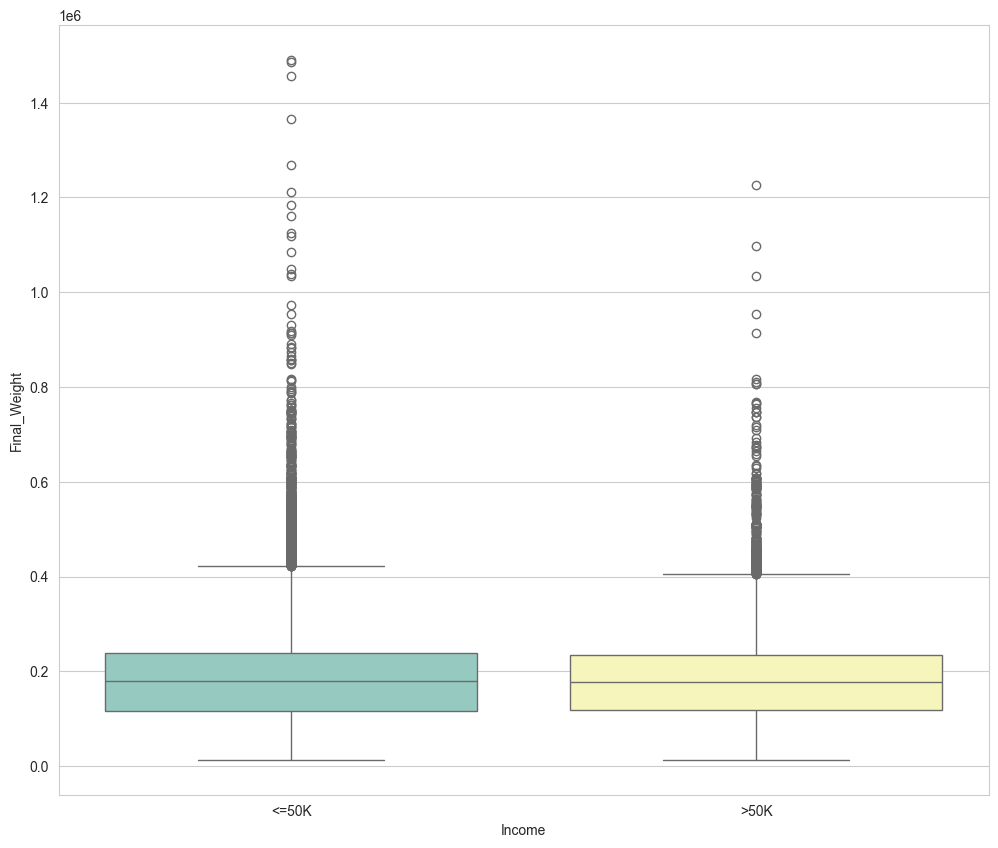

----------------------------------------
Kiểm tra 2 biến Final_Weight và Income có phụ thuộc không?
2 cột Final_Weight và Income không phụ thuộc
----------------------------------------
Sử dụng tukeyhsd
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower     upper   reject
----------------------------------------------------------
 <=50K   >50K -1784.5529 0.1209 -4039.4937 470.3878  False
----------------------------------------------------------


In [258]:
all_infomation_categorical_vs_continuous(df, 'Final_Weight', 'Income', 'Final_Weight ~ C(Income)')

#### 3.2.3. Phân tích dữ liệu theo Capital_Gain

In [259]:
df.sort_values(by='Capital_Gain', ascending=False)

,Age,Workclass,Final_Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native Country,Income
30244,50,Self-emp-inc,190333,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,55,United-States,>50K
19807,48,Private,108557,Bachelors,13,Married-civ-spouse,Tech-support,Wife,White,Female,99999,0,40,United-States,>50K
346,39,Private,198654,HS-grad,9,Divorced,Exec-managerial,Unmarried,Black,Female,99999,0,40,United-States,>50K
19084,52,Self-emp-not-inc,140985,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,White,Female,99999,0,30,United-States,>50K
19080,47,Private,181307,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16976,23,Private,217169,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,United-States,<=50K
16977,46,Private,184883,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States,<=50K
16979,54,Private,57758,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,68,United-States,>50K
16980,54,Self-emp-not-inc,30908,7th-8th,4,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,60,United-States,<=50K


Ta có thể thấy các trường hợp có Capital_Gain lớn thì thường đều có thu nhập cao

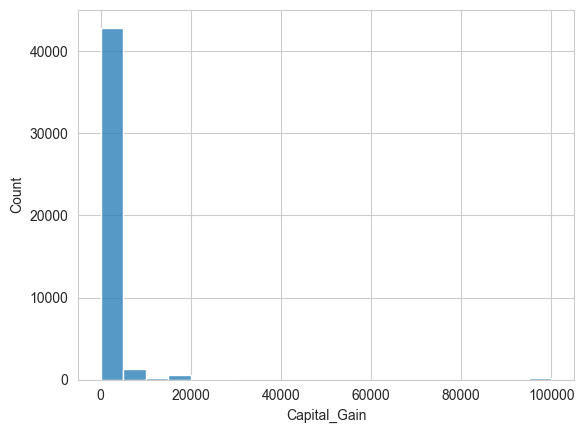

In [260]:
sns.histplot(x='Capital_Gain', data=df, bins=20)

plt.show()

In [261]:
round(len(df[df['Capital_Gain'] == 0]) / len(df) * 100, 2)

91.62

In [262]:
Dependent_Continuous_Categorical(df, 'Capital_Gain ~ C(Income)')

Dependent


#### 3.2.4. Phân tích dữ liệu theo Capital_Loss

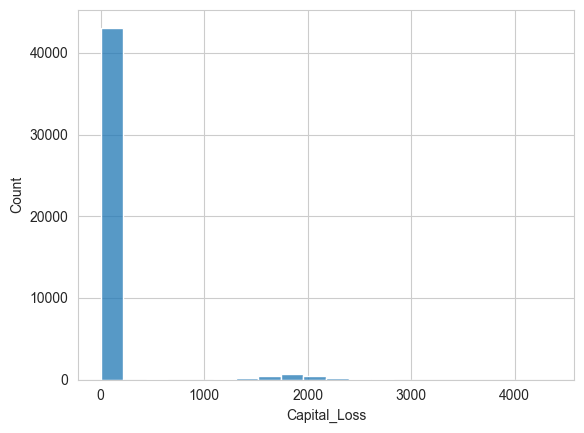

In [263]:
sns.histplot(x='Capital_Loss', data=df, bins=20)

plt.show()

In [264]:
round(len(df[df['Capital_Loss'] == 0]) / len(df) * 100, 2)

95.27

Tỷ lệ Capital_Loss = 0 quá lớn. Điều này có thể làm ảnh hưởng đến kết quả của model khi ta xây dựng. Nên xem xét loại bỏ feature này

In [265]:
Dependent_Continuous_Categorical(df, 'Capital_Loss ~ C(Income)')

Dependent


#### 3.2.5. Phân tích dữ liệu theo Hours_Per_Week

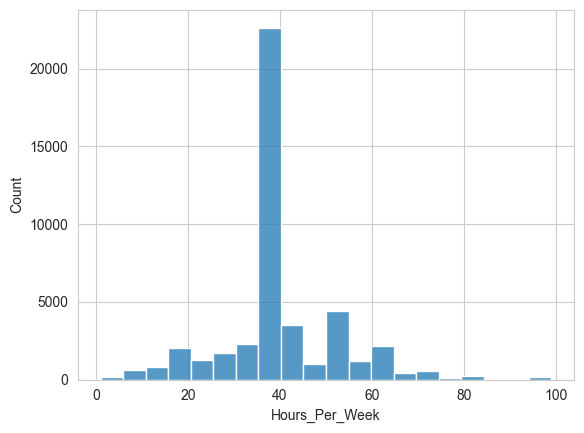

In [266]:
sns.histplot(x='Hours_Per_Week', data=df, bins=20)

plt.show()

Đa phần người lao động sẽ làm việc 40 giờ 1 tuần (5 ngày mỗi ngày 8 tiếng)

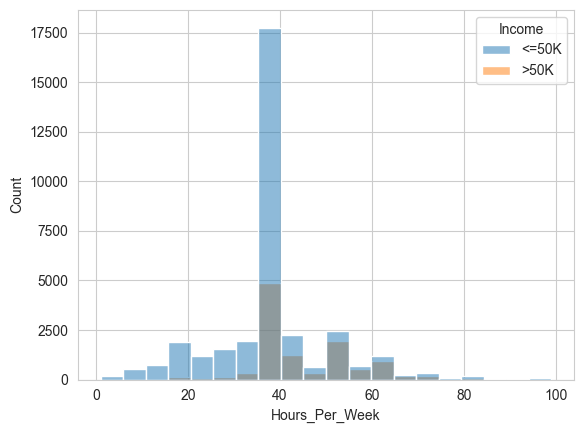

In [267]:
sns.histplot(x='Hours_Per_Week', data=df, bins=20, hue='Income')

plt.show()

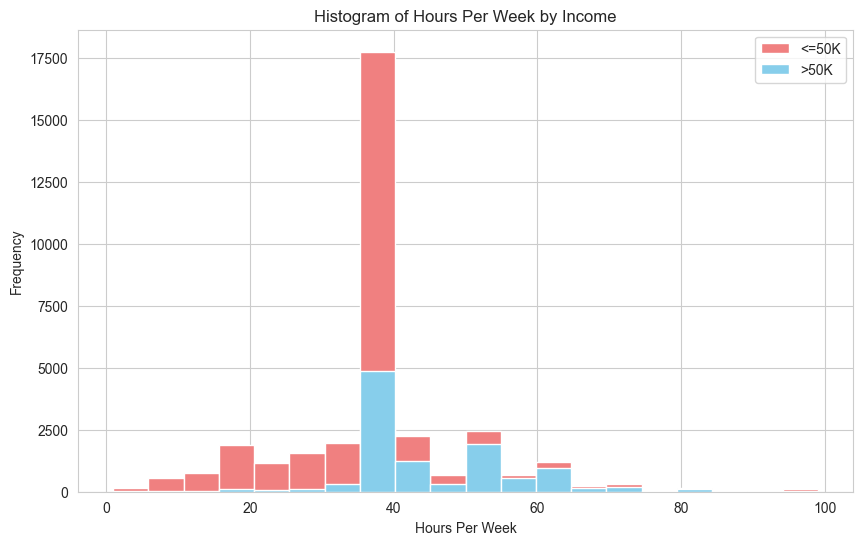

In [268]:
# Tìm giá trị lớn nhất và nhỏ nhất của cột 'Age'
age_min = df['Hours_Per_Week'].min()
age_max = df['Hours_Per_Week'].max()

# Tách dữ liệu thành hai nhóm dựa trên 'Income'
income_over_50k = df[df['Income'] == '>50K']['Hours_Per_Week']
income_under_50k = df[df['Income'] == '<=50K']['Hours_Per_Week']

# Xác định số lượng bins
num_bins = 20

# Tính khoảng giá trị của mỗi bins
bin_width = (age_max - age_min) / num_bins

# Tính toán edges của bins
bins_edges = [age_min + i * bin_width for i in range(num_bins+1)]

# Vẽ biểu đồ histogram
plt.figure(figsize=(10, 6))

plt.hist(income_under_50k, bins=bins_edges, alpha=1, color='lightcoral', label='<=50K')
plt.hist(income_over_50k, bins=bins_edges, alpha=1, color='skyblue', label='>50K')

plt.xlabel('Hours Per Week')
plt.ylabel('Frequency')
plt.title('Histogram of Hours Per Week by Income')
plt.legend()
plt.grid(True)
plt.show()

Những người có thu nhập cao thường rơi vào các lao động làm việc từ 40 tiếng trở lên 1 tuần

In [269]:
Dependent_Continuous_Categorical(df, 'Hours_Per_Week ~ C(Income)')

Dependent


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45232 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             45232 non-null  int64 
 1   Workclass       45232 non-null  object
 2   Final_Weight    45232 non-null  int64 
 3   Education       45232 non-null  object
 4   EducationNum    45232 non-null  int64 
 5   Marital Status  45232 non-null  object
 6   Occupation      45232 non-null  object
 7   Relationship    45232 non-null  object
 8   Race            45232 non-null  object
 9   Gender          45232 non-null  object
 10  Capital_Gain    45232 non-null  int64 
 11  Capital_Loss    45232 non-null  int64 
 12  Hours_Per_Week  45232 non-null  int64 
 13  Native Country  45232 non-null  object
 14  Income          45232 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [271]:
df_final_01 = df.drop(columns=['Education', 'Native Country'])

df_final_01

,Age,Workclass,Final_Weight,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,Private,245211,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
16276,39,Private,215419,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,<=50K
16278,38,Private,374983,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,<=50K
16279,44,Private,83891,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,<=50K


In [272]:
target_variable = 'Income'

## 4. Xây dựng Model

In [273]:
accuracy_test = list()
time_running = list()

### 4.1. Encode dữ liệu

In [274]:
df_final_01.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45232 entries, 0 to 16280
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             45232 non-null  int64 
 1   Workclass       45232 non-null  object
 2   Final_Weight    45232 non-null  int64 
 3   EducationNum    45232 non-null  int64 
 4   Marital Status  45232 non-null  object
 5   Occupation      45232 non-null  object
 6   Relationship    45232 non-null  object
 7   Race            45232 non-null  object
 8   Gender          45232 non-null  object
 9   Capital_Gain    45232 non-null  int64 
 10  Capital_Loss    45232 non-null  int64 
 11  Hours_Per_Week  45232 non-null  int64 
 12  Income          45232 non-null  object
dtypes: int64(6), object(7)
memory usage: 4.8+ MB


In [275]:
df_final_01 = pd.get_dummies(columns=['Workclass', 'Marital Status', 'Occupation', 'Relationship', 'Race'], dtype='int', data=df_final_01)

df_final_01

,Age,Final_Weight,EducationNum,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Income,Workclass_Federal-gov,Workclass_Local-gov,...,Relationship_Not-in-family,Relationship_Other-relative,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White
0,39,77516,13,Male,2174,0,40,<=50K,0,0,...,1,0,0,0,0,0,0,0,0,1
1,50,83311,13,Male,0,0,13,<=50K,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,215646,9,Male,0,0,40,<=50K,0,0,...,1,0,0,0,0,0,0,0,0,1
3,53,234721,7,Male,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,Female,0,0,40,<=50K,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,245211,13,Male,0,0,40,<=50K,0,0,...,0,0,1,0,0,0,0,0,0,1
16276,39,215419,13,Female,0,0,36,<=50K,0,0,...,1,0,0,0,0,0,0,0,0,1
16278,38,374983,13,Male,0,0,50,<=50K,0,0,...,0,0,0,0,0,0,0,0,0,1
16279,44,83891,13,Male,5455,0,40,<=50K,0,0,...,0,0,1,0,0,0,1,0,0,0


In [276]:
df_final_01 = pd.get_dummies(columns=['Gender'], dtype='int', data=df_final_01, drop_first=True)

df_final_01

,Age,Final_Weight,EducationNum,Capital_Gain,Capital_Loss,Hours_Per_Week,Income,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Never-worked,...,Relationship_Other-relative,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,Gender_Male
0,39,77516,13,2174,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,50,83311,13,0,0,13,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,38,215646,9,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,53,234721,7,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,28,338409,13,0,0,40,<=50K,0,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,245211,13,0,0,40,<=50K,0,0,0,...,0,1,0,0,0,0,0,0,1,1
16276,39,215419,13,0,0,36,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,1,0
16278,38,374983,13,0,0,50,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,1,1
16279,44,83891,13,5455,0,40,<=50K,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [277]:
df_final_01['Income'] = df_final_01['Income'].map(
    {
        '<=50K': 0,
        '>50K': 1
    }
)

In [278]:
df_final_01.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45232 entries, 0 to 16280
Data columns (total 49 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Age                                   45232 non-null  int64
 1   Final_Weight                          45232 non-null  int64
 2   EducationNum                          45232 non-null  int64
 3   Capital_Gain                          45232 non-null  int64
 4   Capital_Loss                          45232 non-null  int64
 5   Hours_Per_Week                        45232 non-null  int64
 6   Income                                45232 non-null  int64
 7   Workclass_Federal-gov                 45232 non-null  int32
 8   Workclass_Local-gov                   45232 non-null  int32
 9   Workclass_Never-worked                45232 non-null  int32
 10  Workclass_Private                     45232 non-null  int32
 11  Workclass_Self-emp-inc                45232 no

### 4.2. Chia tập X, y và tập train, test

In [279]:
from sklearn.model_selection import train_test_split

In [280]:
X = df_final_01.drop(columns=[target_variable])

y = df_final_01[target_variable]

In [281]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 4.3. Kiểm tra imbalance

In [282]:
from collections import Counter

In [283]:
counter = Counter(y_train)

# bị lệch hẳn về <=50K
counter

Counter({0: 23815, 1: 7847})

### 4.4. Xử lý imbalance data

In [284]:
from imblearn.over_sampling import SMOTE

In [285]:
model_smote = SMOTE(random_state=42, sampling_strategy='minority')

X_train, y_train = model_smote.fit_resample(X_train, y_train)

In [286]:
Counter(y_train)

Counter({0: 23815, 1: 23815})

### 4.5. Xây dựng model bằng mô hình LogisticRegression

In [287]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [288]:
start_time = time.time()

model_logistic = LogisticRegression(random_state=42)

model_logistic.fit(X_train, y_train)

y_pred = model_logistic.predict(X_test)

In [289]:
# Accuracy = 0.67
end_time = time.time()

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76     10209
           1       0.38      0.56      0.45      3361

    accuracy                           0.67     13570
   macro avg       0.60      0.63      0.61     13570
weighted avg       0.72      0.67      0.68     13570


In [290]:
accuracy_test.append(accuracy_score(y_test, y_pred))
time_running.append(round(end_time - start_time, 2))

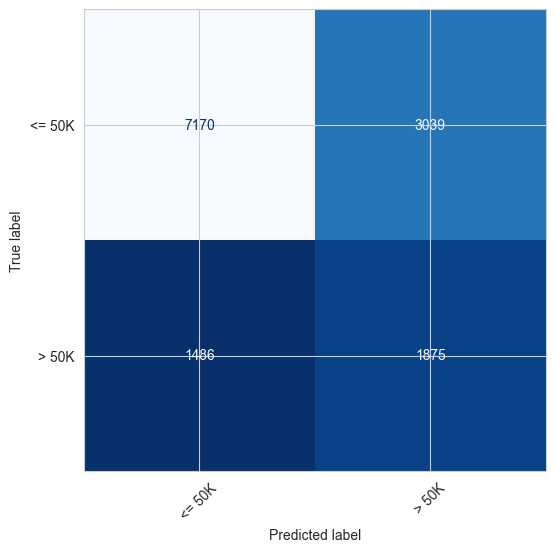

In [291]:
Confusion_Matrix_Graph(y_test, y_pred, ["<= 50K", "> 50K"])

In [292]:
start_time = time.time()

param_grid = {
    'C': [78.47599703514607], #78.47599703514607
    'max_iter': [5000],
    'penalty' : ['l2'],
    'solver' : ['newton-cg'],
    'multi_class': ['multinomial']
}

# Create a Decision Tree classifier
dt_logistic = LogisticRegression(random_state=42)

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=dt_logistic, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)

end_time = time.time()

# 0.854753131908622
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     10209
           1       0.74      0.63      0.68      3361

    accuracy                           0.85     13570
   macro avg       0.81      0.78      0.79     13570
weighted avg       0.85      0.85      0.85     13570

0.854753131908622


In [293]:
accuracy_test.append(accuracy_score(y_test, y_pred))
time_running.append(round(end_time - start_time, 2))

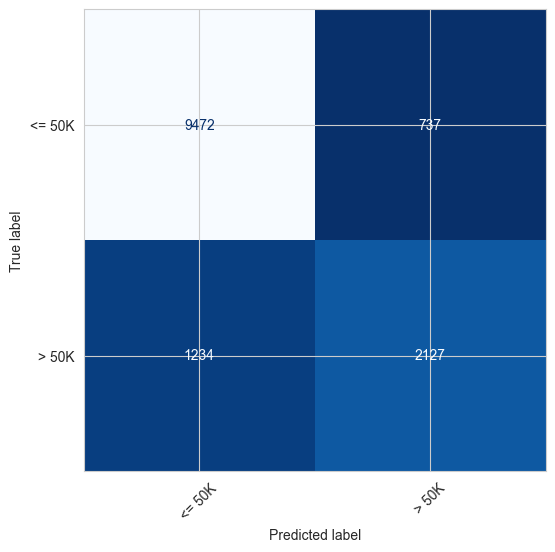

In [294]:
Confusion_Matrix_Graph(y_test, y_pred, ["<= 50K", "> 50K"])

### 4.6. Xây dựng model bằng mô hình Decision Tree

In [295]:
from sklearn.tree import DecisionTreeClassifier

In [296]:
start_time = time.time()

model_decision_tree = DecisionTreeClassifier(random_state=42)

model_decision_tree.fit(X_train, y_train)

y_pred = model_decision_tree.predict(X_test)

In [297]:
# Accuracy = 0.81
end_time = time.time()

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87     10209
           1       0.60      0.64      0.62      3361

    accuracy                           0.81     13570
   macro avg       0.74      0.75      0.74     13570
weighted avg       0.81      0.81      0.81     13570


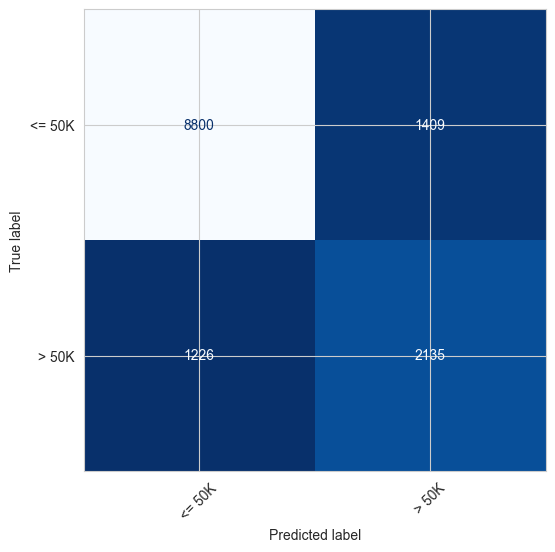

In [298]:
Confusion_Matrix_Graph(y_test, y_pred, ["<= 50K", "> 50K"])

In [299]:
accuracy_test.append(accuracy_score(y_test, y_pred))
time_running.append(round(end_time - start_time, 2))

Ta sẽ thử Tuning cho mô hình

In [300]:
# mặc định đang để depth là 51
model_decision_tree.get_depth()

51

In [301]:
start_time = time.time()

In [302]:
max_depth_decision_tree = Decision_Tree_Max_Depth(X_train, y_train, {'max_depth': range(1, 100, 2)})

# 15
max_depth_decision_tree

15

In [303]:
model_decision_tree = DecisionTreeClassifier(random_state=42, max_depth=max_depth_decision_tree)

model_decision_tree.fit(X_train, y_train)

y_pred = model_decision_tree.predict(X_test)

In [304]:
# Accuracy = 0.83
end_time = time.time()

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88     10209
           1       0.63      0.72      0.67      3361

    accuracy                           0.83     13570
   macro avg       0.77      0.79      0.78     13570
weighted avg       0.84      0.83      0.83     13570

0.8257184966838614


In [305]:
# accuracy_test.append(accuracy_score(y_test, y_pred))
# time_running.append(round(end_time - start_time, 2))

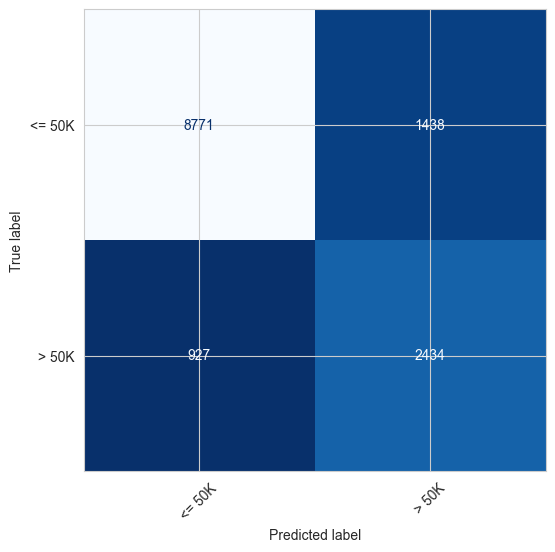

In [306]:
Confusion_Matrix_Graph(y_test, y_pred, ["<= 50K", "> 50K"])

Tiếp tục tuning Decision Tree

In [307]:
from sklearn.model_selection import GridSearchCV

start_time = time.time()

# max_depth_decision_tree = Decision_Tree_Max_Depth(X_train, y_train, {'max_depth': range(1, 30, 2)})

param_grid = {
    'criterion': ['gini'],
    'max_depth': range(1, 30, 2),
    'min_samples_split': [20]
}

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)

end_time = time.time()

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89     10209
           1       0.65      0.68      0.67      3361

    accuracy                           0.83     13570
   macro avg       0.77      0.78      0.78     13570
weighted avg       0.83      0.83      0.83     13570

0.8309506263817243


In [308]:
accuracy_test.append(accuracy_score(y_test, y_pred))
time_running.append(round(end_time - start_time, 2))

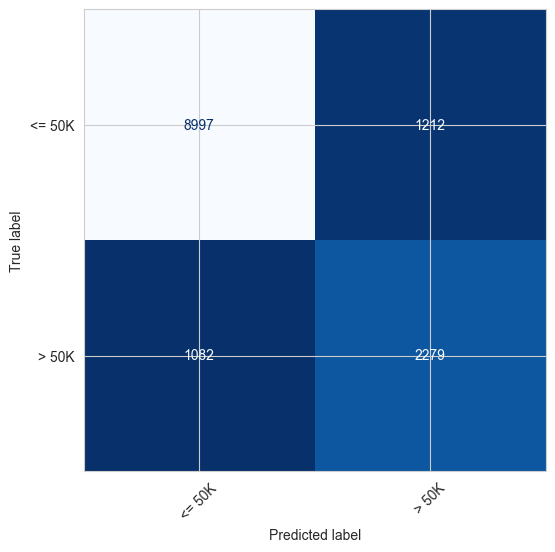

In [309]:
Confusion_Matrix_Graph(y_test, y_pred, ["<= 50K", "> 50K"])

### 4.7. Xây dựng bằng mô hình RandomForestClassifier

In [310]:
from sklearn.ensemble import RandomForestClassifier

In [311]:
start_time = time.time()

model_random_forest = RandomForestClassifier(random_state=42)

model_random_forest.fit(X_train, y_train)

y_pred = model_random_forest.predict(X_test)

In [312]:
# Accuracy = 0.85
end_time = time.time()

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90     10209
           1       0.71      0.66      0.68      3361

    accuracy                           0.85     13570
   macro avg       0.80      0.79      0.79     13570
weighted avg       0.85      0.85      0.85     13570

0.849521002210759


In [313]:
accuracy_test.append(accuracy_score(y_test, y_pred))
time_running.append(round(end_time - start_time, 2))

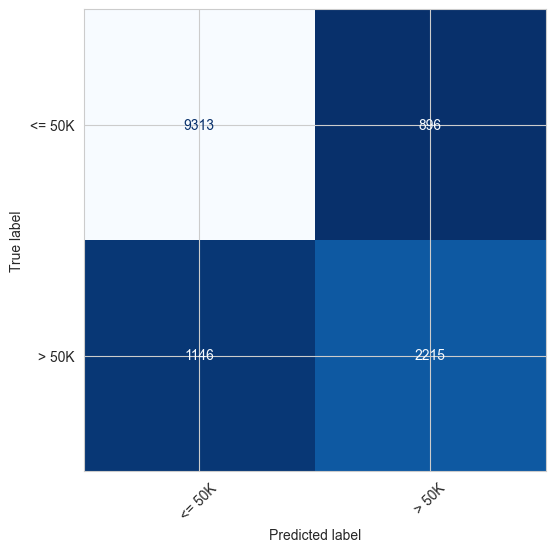

In [314]:
Confusion_Matrix_Graph(y_test, y_pred, ["<= 50K", "> 50K"])

In [315]:
# 1 phút 24 giây (0.8546)
from sklearn.model_selection import RandomizedSearchCV

# khai báo bộ param grid mới
param_grid = { 
    'max_depth': [23],
    'n_estimators': [280],
    'max_features': ["sqrt"],
    'min_samples_split': [6],
    'min_samples_leaf': [1]
} 

start_time = time.time()

model_random_forest = RandomForestClassifier(random_state=42)

model_random_forest_random_search = RandomizedSearchCV(model_random_forest, param_grid)

model_random_forest_random_search.fit(X_train, y_train)

y_pred = model_random_forest_random_search.predict(X_test)

end_time = time.time()

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91     10209
           1       0.72      0.71      0.71      3361

    accuracy                           0.86     13570
   macro avg       0.81      0.81      0.81     13570
weighted avg       0.86      0.86      0.86     13570

0.8591009579955785


In [316]:
accuracy_test.append(accuracy_score(y_test, y_pred))
time_running.append(round(end_time - start_time, 2))

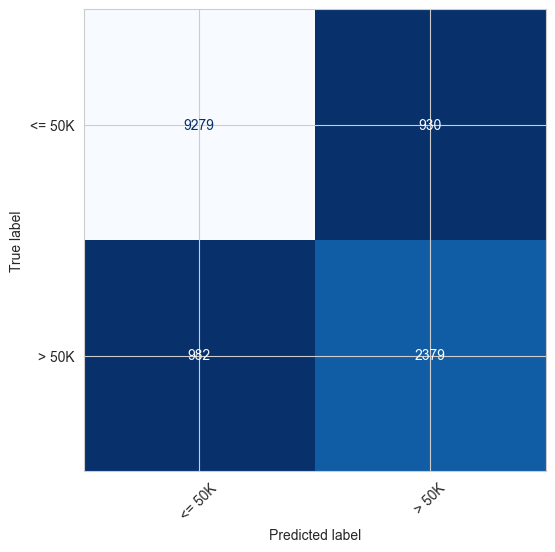

In [317]:
Confusion_Matrix_Graph(y_test, y_pred, ["<= 50K", "> 50K"])

In [318]:
from sklearn.model_selection import GridSearchCV

In [319]:
start_time = time.time()

param_grid = { 
    'max_depth': [23],
    'n_estimators': [280],
    'max_features': ["sqrt"],
    'min_samples_split': [6],
    'min_samples_leaf': [1]
} 

model_random_forest = RandomForestClassifier(random_state=42)

model_random_forest_grid_search = GridSearchCV(model_random_forest, param_grid=param_grid) 

model_random_forest_grid_search.fit(X_train, y_train) 

y_pred = model_random_forest_grid_search.predict(X_test)

end_time = time.time()

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91     10209
           1       0.72      0.71      0.71      3361

    accuracy                           0.86     13570
   macro avg       0.81      0.81      0.81     13570
weighted avg       0.86      0.86      0.86     13570

0.8591009579955785


In [320]:
# 0.8568901989683124
model_random_forest_grid_search.best_params_

{'max_depth': 23,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 280}

In [321]:
accuracy_test.append(accuracy_score(y_test, y_pred))
time_running.append(round(end_time - start_time, 2))

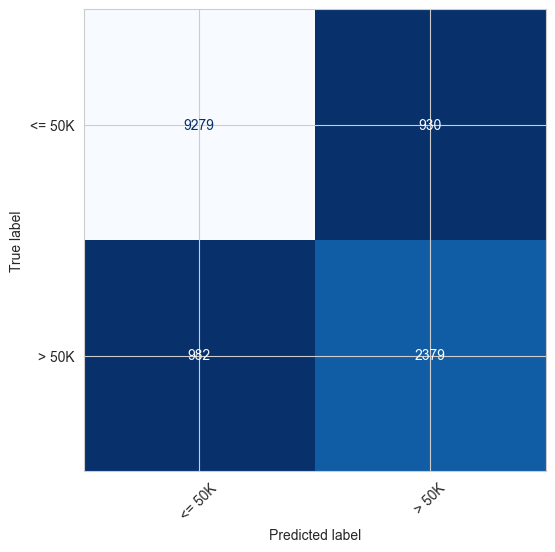

In [322]:
Confusion_Matrix_Graph(y_test, y_pred, ["<= 50K", "> 50K"])

### 4.8. Sử dụng XGBoost

In [323]:
import xgboost as xgb

In [324]:
start_time = time.time()

model_xgb = xgb.XGBClassifier()

model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)

# Accuracy = 0.87 => Good nhất lúc này
end_time = time.time()

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91     10209
           1       0.75      0.69      0.72      3361

    accuracy                           0.87     13570
   macro avg       0.83      0.81      0.82     13570
weighted avg       0.86      0.87      0.86     13570

0.8667649226234341


In [325]:
accuracy_test.append(accuracy_score(y_test, y_pred))
time_running.append(round(end_time - start_time, 2))

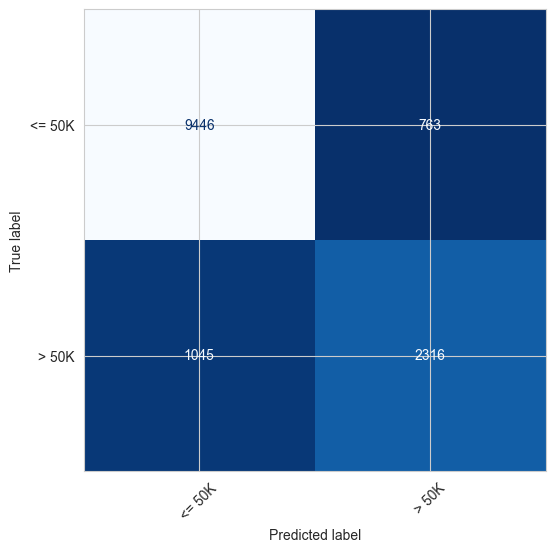

In [326]:
Confusion_Matrix_Graph(y_test, y_pred, ["<= 50K", "> 50K"])

Thử Tuning bằng mô hình XGBoost

In [327]:
start_time = time.time()

model_xgboost_tuning = xgb.XGBClassifier()

# Xây dựng Grid Search với param_grid
param_grid = {
    'learning_rate': [0.2],  
    'max_depth': [7],              
    'n_estimators': [130],
    'booster': ['gbtree'],
    'tree_method': ['approx'],
    'eval_metric': ['auc'],
    'device': ['cuda'],
    'min_child_weight': [1],
    'subsample': [1],
    'colsample_bytree': [0.9],
    'colsample_bylevel': [0.6],
    'colsample_bynode': [1],
    'objective': ['reg:logistic'],
    'normalize_type': ['forest']
}

grid_search = GridSearchCV(estimator=model_xgboost_tuning, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

model_xgboost_tuning = grid_search.best_estimator_

y_pred = model_xgboost_tuning.predict(X_test)

# 0.87
end_time = time.time()

print(classification_report(y_test, y_pred))

print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91     10209
           1       0.75      0.69      0.72      3361

    accuracy                           0.87     13570
   macro avg       0.83      0.81      0.82     13570
weighted avg       0.86      0.87      0.87     13570

0.8673544583640383


In [328]:
accuracy_test.append(accuracy_score(y_test, y_pred))
time_running.append(round(end_time - start_time, 2))

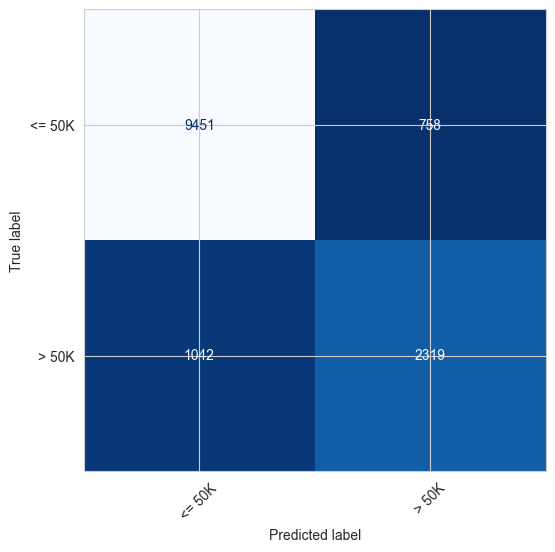

In [329]:
Confusion_Matrix_Graph(y_test, y_pred, ["<= 50K", "> 50K"])

### 4.9. Sử dụng Gradient Boosting Classifier

In [330]:
from sklearn.ensemble import GradientBoostingClassifier

In [331]:
start_time = time.time()

# model_gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_gradient_boosting = GradientBoostingClassifier(random_state=42)

# Train the model
model_gradient_boosting.fit(X_train, y_train)

# Predict on the testing set
y_pred = model_gradient_boosting.predict(X_test)

end_time = time.time()

# 0.8487840825350037
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90     10209
           1       0.68      0.74      0.71      3361

    accuracy                           0.85     13570
   macro avg       0.80      0.81      0.80     13570
weighted avg       0.85      0.85      0.85     13570

0.8487840825350037


In [332]:
accuracy_test.append(accuracy_score(y_test, y_pred))
time_running.append(round(end_time - start_time, 2))

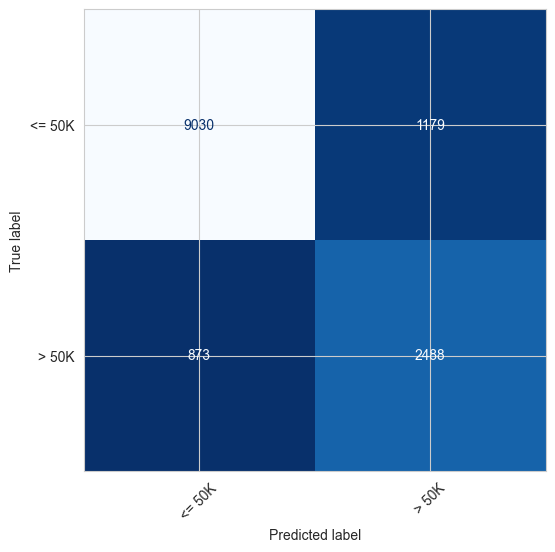

In [333]:
Confusion_Matrix_Graph(y_test, y_pred, ["<= 50K", "> 50K"])

Thử Tuning mô hình Gradient Boosting Classifier này

In [334]:
start_time = time.time()

param_grid = {
    'n_estimators': [200],
    'learning_rate':[0.15],
    'max_depth': [5],
    'min_samples_split':[6],
    'min_samples_leaf':[1]
}

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
 
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
 
# Fit the model to the training data using GridSearchCV
grid_search.fit(X_train, y_train)

model_gradient_tuning = grid_search.best_estimator_

y_pred = model_gradient_tuning.predict(X_test)

# 0.8680913780397936
end_time = time.time()

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91     10209
           1       0.76      0.69      0.72      3361

    accuracy                           0.87     13570
   macro avg       0.83      0.81      0.82     13570
weighted avg       0.87      0.87      0.87     13570

0.8680913780397936


In [335]:
accuracy_test.append(accuracy_score(y_test, y_pred))
time_running.append(round(end_time - start_time, 2))

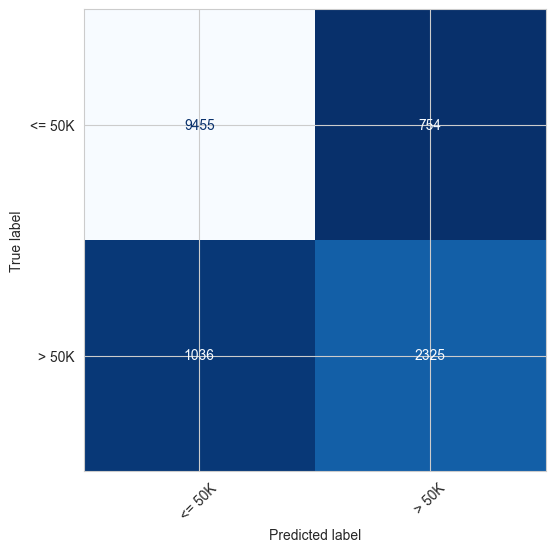

In [336]:
Confusion_Matrix_Graph(y_test, y_pred, ["<= 50K", "> 50K"])

### 4.10. Sử dụng SVC

In [337]:
from sklearn.svm import SVC

In [338]:
start_time = time.time()

model_svc = SVC(random_state=42)

model_svc.fit(X_train, y_train)

y_pred = model_svc.predict(X_test)

# accuracy = 0.79 (Chạy mất tầm 1 phút 40 giây)
end_time = time.time()

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88     10209
           1       0.84      0.20      0.33      3361

    accuracy                           0.79     13570
   macro avg       0.82      0.59      0.60     13570
weighted avg       0.80      0.79      0.74     13570


In [339]:
accuracy_test.append(accuracy_score(y_test, y_pred))
time_running.append(round(end_time - start_time, 2))

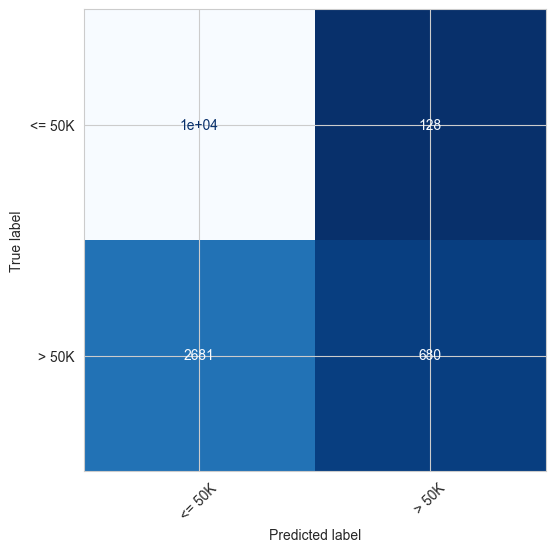

In [340]:
Confusion_Matrix_Graph(y_test, y_pred, ["<= 50K", "> 50K"])

Ta sẽ scale dữ liệu trước rồi sử dụng lại SVC

In [341]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

In [342]:
start_time = time.time()

model_standard_scaler = RobustScaler()

X_train_scale = model_standard_scaler.fit_transform(X_train)
X_test_scale = model_standard_scaler.fit_transform(X_test)

In [343]:
model_svc = SVC(random_state=42)

model_svc.fit(X_train_scale, y_train)

y_pred = model_svc.predict(X_test_scale)

# accuracy = 0.80 (Chạy mất tầm 1 phút 39 giây)
end_time = time.time()

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88     10209
           1       0.71      0.30      0.42      3361

    accuracy                           0.80     13570
   macro avg       0.76      0.63      0.65     13570
weighted avg       0.78      0.80      0.76     13570


In [344]:
# accuracy_test.append(accuracy_score(y_test, y_pred))
# time_running.append(round(end_time - start_time, 2))

In [345]:
# Confusion_Matrix_Graph(y_test, y_pred, ["<= 50K", "> 50K"])

In [346]:
start_time = time.time()

model_standard_scaler = MinMaxScaler()

X_train_scale = model_standard_scaler.fit_transform(X_train)
X_test_scale = model_standard_scaler.fit_transform(X_test)

In [347]:
model_svc = SVC(random_state=42)

model_svc.fit(X_train_scale, y_train)

y_pred = model_svc.predict(X_test_scale)

# accuracy = 0.84 (Chạy mất tầm 38 giây)
end_time = time.time()

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90     10209
           1       0.72      0.58      0.64      3361

    accuracy                           0.84     13570
   macro avg       0.79      0.75      0.77     13570
weighted avg       0.83      0.84      0.83     13570


In [348]:
accuracy_test.append(accuracy_score(y_test, y_pred))
time_running.append(round(end_time - start_time, 2))

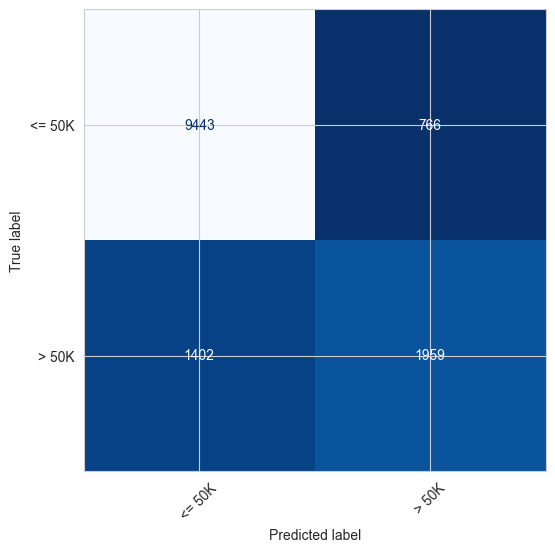

In [349]:
Confusion_Matrix_Graph(y_test, y_pred, ["<= 50K", "> 50K"])

Thử tuning mô hình SVC sử dụng dữ liệu scale bằng MinMaxScaler

### 4.12. Tổng hợp kết quả các mô hình được xây dựng

In [350]:
accuracy_test

[0.6665438467207074,
 0.854753131908622,
 0.8058216654384672,
 0.8309506263817243,
 0.849521002210759,
 0.8591009579955785,
 0.8591009579955785,
 0.8667649226234341,
 0.8673544583640383,
 0.8487840825350037,
 0.8680913780397936,
 0.7929992630803242,
 0.8402358142962417]

In [351]:
time_running

[0.26,
 56.27,
 0.3,
 3.77,
 3.61,
 37.48,
 37.56,
 0.44,
 13.01,
 4.65,
 30.7,
 105.64,
 34.5]

In [352]:
Technique = ["Logistic Regression", "Logistic Regression Tuning", "Decision Tree Classifier", "Decision Tree Classifier Tuning", "Random Forest Classifier","Random Forest Classifier (RandomizedSearchCV)", "Random Forest Classifier (GridSearchCV)", "XGBoost", "XGBoost Tuning", "Gradient Boosting", "Gradient Boosting Tuning", "SVC", "SVC MinMaxScaler"]

results = pd.DataFrame({'Model': Technique,'Accuracy Score': accuracy_test, 'Time Running': time_running})

results = results.sort_values(by='Accuracy Score', ascending=False).reset_index(drop=True)

display(results)

,Model,Accuracy Score,Time Running
0,Gradient Boosting Tuning,0.868091,30.70
1,XGBoost Tuning,0.867354,13.01
2,XGBoost,0.866765,0.44
3,Random Forest Classifier (RandomizedSearchCV),0.859101,37.48
4,Random Forest Classifier (GridSearchCV),0.859101,37.56
5,Logistic Regression Tuning,0.854753,56.27
6,Random Forest Classifier,0.849521,3.61
7,Gradient Boosting,0.848784,4.65
8,SVC MinMaxScaler,0.840236,34.50
9,Decision Tree Classifier Tuning,0.830951,3.77


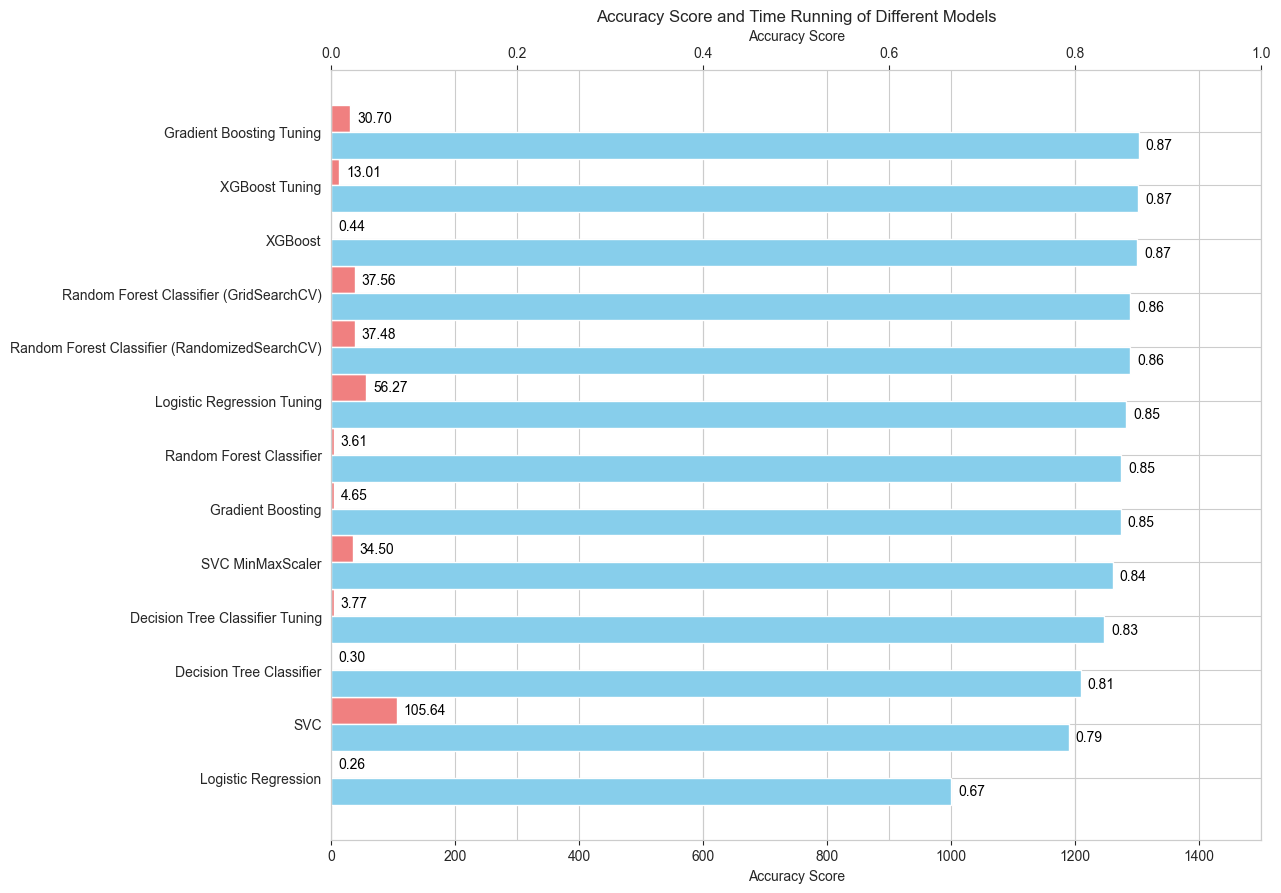

In [388]:
# Sắp xếp kết quả theo 'Accuracy Score' giảm dần
results = results.sort_values(by='Accuracy Score', ascending=True)

# Định cấu hình biểu đồ
fig, ax2 = plt.subplots(figsize=(12, 10))  # Đảo ngược thứ tự của ax1 và ax2

# Tạo trục thứ hai cho 'Accuracy Score'
ax1 = ax2.twiny()  # Đảo ngược thứ tự của ax1 và ax2

# Tạo biểu đồ cho Accuracy Score
bar_height = 0.5  # Tăng kích thước của thanh bar
index = np.arange(len(results))

# Tạo biểu đồ cho Time Running
time_bars = ax2.barh(index + bar_height, results['Time Running'], bar_height, label='Time Running', color='lightcoral')

accuracy_bars = ax1.barh(index, results['Accuracy Score'], bar_height, label='Accuracy Score', color='skyblue', capsize=5)  # Sử dụng capsize để tăng gap width

# Định cấu hình trục cho Accuracy Score
ax1.set_yticks(index + bar_height / 2)
ax1.set_yticklabels(results['Model'])
ax1.set_xlabel('Accuracy Score')

# Điều chỉnh trục thứ hai cho Accuracy Score
ax2.set_xlim(0, 1500)  # Giới hạn trục thứ hai từ 0 đến 1 cho phù hợp với độ chính xác
ax2.set_xlabel('Accuracy Score')

# Đặt giới hạn cho trục x của ax1
ax1.set_xlim(0, 1)

ax1.set_title('Accuracy Score and Time Running of Different Models')

# Thêm nhãn dữ liệu vào từng cột Accuracy Score
def add_labels(bars, ax):
    for bar in bars:
        width = bar.get_width()
        ax.annotate('{:.2f}'.format(width),
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(5, 0),  # Độ lệch của nhãn dữ liệu
                    textcoords='offset points',
                    ha='left', va='center', color='black')

add_labels(accuracy_bars, ax1)

# Thêm nhãn dữ liệu vào từng cột Time Running
add_labels(time_bars, ax2)

plt.show()

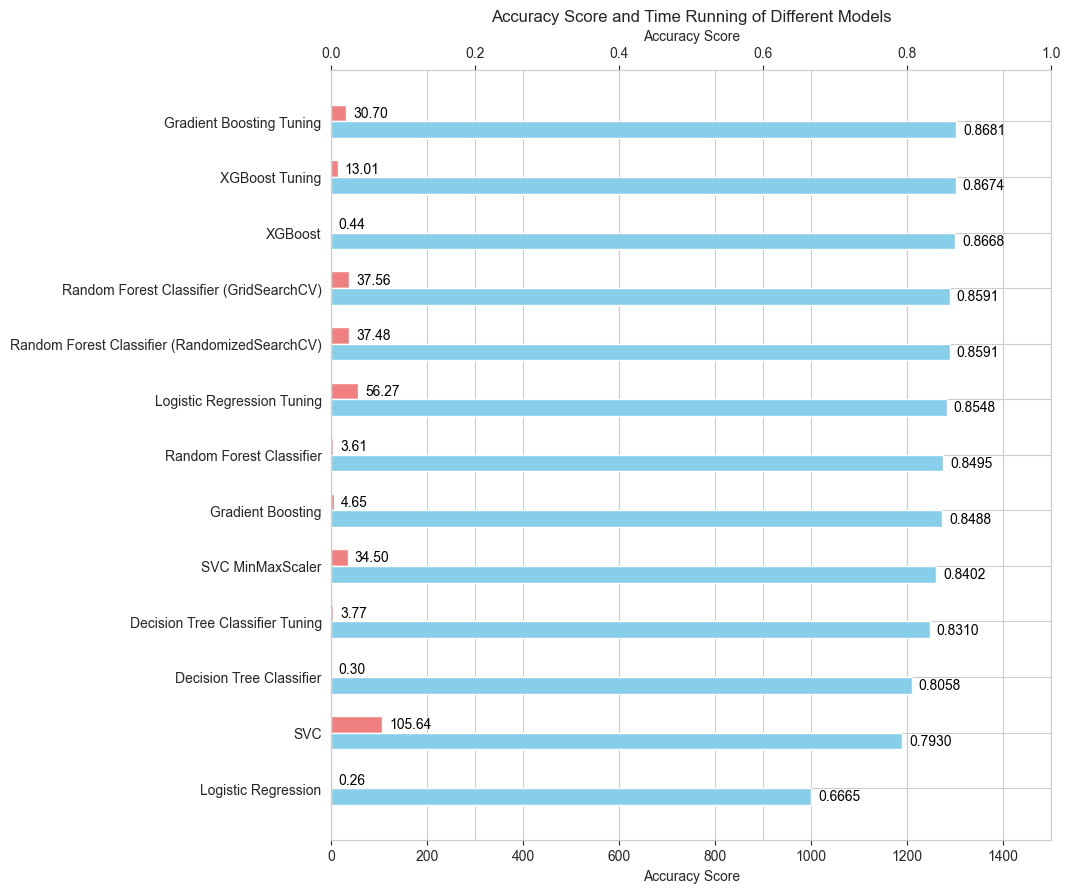

In [395]:
# Sắp xếp kết quả theo 'Accuracy Score' giảm dần
results = results.sort_values(by='Accuracy Score', ascending=True)

# Định cấu hình biểu đồ và tăng kích thước
fig, ax2 = plt.subplots(figsize=(12, 10))  # Đảo ngược thứ tự của ax1 và ax2

# Tạo trục thứ hai cho 'Accuracy Score'
ax1 = ax2.twiny()  # Đảo ngược thứ tự của ax1 và ax2

# Tạo biểu đồ cho Accuracy Score
bar_height = 0.3  # Tăng kích thước của thanh bar
index = np.arange(len(results))

# Tạo biểu đồ cho Time Running
time_bars = ax2.barh(index + bar_height, results['Time Running'], bar_height, label='Time Running', color='lightcoral')

accuracy_bars = ax1.barh(index, results['Accuracy Score'], bar_height, label='Accuracy Score', color='skyblue', capsize=5)  # Sử dụng capsize để tăng gap width

# Định cấu hình trục cho Accuracy Score
ax1.set_yticks(index + bar_height / 2)
ax1.set_yticklabels(results['Model'])
ax1.set_xlabel('Accuracy Score')

# Điều chỉnh trục thứ hai cho Accuracy Score
ax2.set_xlim(0, 1500)  # Giới hạn trục thứ hai từ 0 đến 1 cho phù hợp với độ chính xác
ax2.set_xlabel('Accuracy Score')

# Đặt giới hạn cho trục x của ax1
ax1.set_xlim(0, 1)

ax1.set_title('Accuracy Score and Time Running of Different Models')

# Thêm nhãn dữ liệu vào từng cột Accuracy Score
def add_labels(bars, ax, format_string):
    for bar in bars:
        width = bar.get_width()
        ax.annotate(format_string.format(width),
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(5, 0),  # Độ lệch của nhãn dữ liệu
                    textcoords='offset points',
                    ha='left', va='center', color='black')

add_labels(accuracy_bars, ax1, '{:.4f}')  # Số chữ số sau dấu phẩy cho Accuracy Score là 4
add_labels(time_bars, ax2, '{:.2f}')  # Số chữ số sau dấu phẩy cho Time Running là 2

plt.subplots_adjust(left=0.2, right=0.8, wspace=0.5)  # Điều chỉnh khoảng cách giữa các biểu đồ

plt.show()